In [672]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# **Preprocessing**

2012, 2013, 2014, 2015, and 2020 have 366 dyas

# **2009**

In [2]:
data_09 = pd.read_excel('/content/New Dataset.xlsx', sheet_name='2009')
data_09.to_csv('2009.csv', index=False)

In [3]:
data_2009 = pd.read_csv('/content/2009.csv')

In [4]:
data_2009.head()

,"All of the data presented below was copied verbatim from spreadsheets transcribed by Debbie Rideout, Town PLO",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,Chlorine,NaN,...,NaN,NaN,NaN,Flows from plant,NaN,NaN,Chemical Dosages,NaN,NaN,NaN
1,Date,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,Free,Total,...,Finish,Filter,Backwash,Bishop's,Botwood,GFW,Chlorine,Alum,Limestone,Lime
2,2009-01-01 00:00:00,6.99,6.44,NaN,NaN,NaN,NaN,7.35,1.82,NaN,...,14.312,NaN,NaN,NaN,NaN,NaN,NaN,14.68,14.88,6.76
3,2009-01-02 00:00:00,7.18,6.41,NaN,NaN,NaN,NaN,7.22,1.79,NaN,...,14.201,NaN,NaN,NaN,NaN,NaN,NaN,14.68,14.88,6.76
4,2009-01-03 00:00:00,6.63,6.52,NaN,NaN,NaN,NaN,7.34,1.82,NaN,...,14.34,NaN,NaN,NaN,NaN,NaN,NaN,14.68,14.88,6.76


In [5]:
data_2009 = data_2009.drop(data_2009.index[0])

In [6]:
data_2009.columns = pd.MultiIndex.from_tuples([('Date',' '),('pH','Raw'),('pH','PTC'),('pH','PTC (OL)'),('pH','SWC'),('pH','Filter'),('pH','Finish (OL)'),('pH','Finish'), ('Chlorine','Free'),('Chlorine','Total'),('Chlorine','Sample'),('Chlorine','Analyzer'), ('Colour','Raw A'),('Colour','Raw T'),('Colour','SWC A'),('Colour','Filter A'),('Colour','Finish A'),('Colour','Finish T'), ('Turbidity', 'Raw'),('Turbidity','Raw (OL)'),('Turbidity', 'SWC'),('Turbidity','Filter'),('Turbidity','Finish'),('Turbidity','Finish (OL)'), ('Total Dissolved Solids', 'Raw'),('Total Dissolved Solids','PTC'),('Total Dissolved Solids','SWC'),('Total Dissolved Solids','Filter'),('Total Dissolved Solids','Finish'),('Conductivity','Raw'),('Conductivity','PTC'),('Conductivity','SWC'),('Conductivity','Filter'),('Conductivity','Finish'),('Hardness', 'Raw'),('Hardness','Finish'),('Alkalinity','Raw'),('Alkalinity','Finish'),('Aluminum', 'Finish (Free)'),('Temperature', 'Raw'),('Temperature','Finish'),('Cl Used', ' '),('Cl Demand', ' '),('UVT', 'Raw'),('UVT','Filter'),('UVA', 'Raw'),('UVA','Filter'),('Flows within plant','Raw'),('Flows within plant','Finish'),('Flows within plant','Filter'),('Flows within plant','Backwash'),('Flows from plant', 'Bishop s'),('Flows from plant','Botwood'),('Flows from plant','GFW'),('Chemical Dosages', 'Chlorine'),('Chemical Dosages','Alum'),('Chemical Dosages','Limestone'),('Chemical Dosages','Lime')])

In [7]:
data_2009 = data_2009.drop(data_2009.index[0])

In [8]:
data_2009

Date                 pH                                   \
                                        Raw                PTC PTC (OL)  SWC   
2    2009-01-01 00:00:00               6.99               6.44      NaN  NaN   
3    2009-01-02 00:00:00               7.18               6.41      NaN  NaN   
4    2009-01-03 00:00:00               6.63               6.52      NaN  NaN   
5    2009-01-04 00:00:00  6.734999999999999              6.515      NaN  NaN   
6    2009-01-05 00:00:00               6.84               6.51      NaN  NaN   
..                   ...                ...                ...      ...  ...   
362  2009-12-27 00:00:00               6.74  6.824999999999999      NaN  NaN   
363  2009-12-28 00:00:00               6.74               6.76      NaN  NaN   
364  2009-12-29 00:00:00               6.75                6.8      NaN  NaN   
365  2009-12-30 00:00:00               6.75               6.81      NaN  NaN   
366  2009-12-31 00:00:00               6.79               6.69      NaN  NaN   

                                         Chlorine        ...  \
    Filter Finish (OL) Finish                Free Total  ...   
2      NaN         NaN   7.35                1.82   NaN  ...   
3      NaN         NaN   7.22                1.79   NaN  ...   
4      NaN         NaN   7.34                1.82   NaN  ...   
5      NaN         NaN   7.29  1.7850000000000001   NaN  ...   
6      NaN         NaN   7.24                1.75   NaN  ...   
..     ...         ...    ...                 ...   ...  ...   
362    NaN         NaN  7.035                1.78   NaN  ...   
363    NaN         NaN   6.98                1.92   NaN  ...   
364    NaN         NaN   6.88                1.79   NaN  ...   
365    NaN         NaN   7.28                1.67   NaN  ...   
366    NaN         NaN   7.59                1.77   NaN  ...   

    Flows within plant                 Flows from plant               \
                Finish Filter Backwash         Bishop s Botwood  GFW   
2               14.312    NaN      NaN              NaN     NaN  NaN   
3               14.201    NaN      NaN              NaN     NaN  NaN   
4                14.34    NaN      NaN              NaN     NaN  NaN   
5               14.113    NaN      NaN              NaN     NaN  NaN   
6               13.886    NaN      NaN              NaN     NaN  NaN   
..                 ...    ...      ...              ...     ...  ...   
362            15.4265    NaN      NaN              NaN     NaN  NaN   
363             15.373    NaN      NaN              NaN     NaN  NaN   
364             15.708    NaN      NaN              NaN     NaN  NaN   
365             16.529    NaN      NaN              NaN     NaN  NaN   
366             15.761    NaN      NaN              NaN     NaN  NaN   

    Chemical Dosages                          
            Chlorine   Alum Limestone   Lime  
2                NaN  14.68     14.88   6.76  
3                NaN  14.68     14.88   6.76  
4                NaN  14.68     14.88   6.76  
5                NaN  14.68     14.88   6.76  
6                NaN  14.68     14.88   6.76  
..               ...    ...       ...    ...  
362              NaN   10.4     21.26  11.66  
363              NaN   10.4     21.26  11.66  
364              NaN   10.4     21.26  11.66  
365              NaN   10.4     21.26  11.66  
366              NaN   10.4     21.26  10.78  

[365 rows x 58 columns]

In [9]:
data_2009 = data_2009.reset_index(drop=True)

In [10]:
data_2009

Date                 pH                                   \
                                        Raw                PTC PTC (OL)  SWC   
0    2009-01-01 00:00:00               6.99               6.44      NaN  NaN   
1    2009-01-02 00:00:00               7.18               6.41      NaN  NaN   
2    2009-01-03 00:00:00               6.63               6.52      NaN  NaN   
3    2009-01-04 00:00:00  6.734999999999999              6.515      NaN  NaN   
4    2009-01-05 00:00:00               6.84               6.51      NaN  NaN   
..                   ...                ...                ...      ...  ...   
360  2009-12-27 00:00:00               6.74  6.824999999999999      NaN  NaN   
361  2009-12-28 00:00:00               6.74               6.76      NaN  NaN   
362  2009-12-29 00:00:00               6.75                6.8      NaN  NaN   
363  2009-12-30 00:00:00               6.75               6.81      NaN  NaN   
364  2009-12-31 00:00:00               6.79               6.69      NaN  NaN   

                                         Chlorine        ...  \
    Filter Finish (OL) Finish                Free Total  ...   
0      NaN         NaN   7.35                1.82   NaN  ...   
1      NaN         NaN   7.22                1.79   NaN  ...   
2      NaN         NaN   7.34                1.82   NaN  ...   
3      NaN         NaN   7.29  1.7850000000000001   NaN  ...   
4      NaN         NaN   7.24                1.75   NaN  ...   
..     ...         ...    ...                 ...   ...  ...   
360    NaN         NaN  7.035                1.78   NaN  ...   
361    NaN         NaN   6.98                1.92   NaN  ...   
362    NaN         NaN   6.88                1.79   NaN  ...   
363    NaN         NaN   7.28                1.67   NaN  ...   
364    NaN         NaN   7.59                1.77   NaN  ...   

    Flows within plant                 Flows from plant               \
                Finish Filter Backwash         Bishop s Botwood  GFW   
0               14.312    NaN      NaN              NaN     NaN  NaN   
1               14.201    NaN      NaN              NaN     NaN  NaN   
2                14.34    NaN      NaN              NaN     NaN  NaN   
3               14.113    NaN      NaN              NaN     NaN  NaN   
4               13.886    NaN      NaN              NaN     NaN  NaN   
..                 ...    ...      ...              ...     ...  ...   
360            15.4265    NaN      NaN              NaN     NaN  NaN   
361             15.373    NaN      NaN              NaN     NaN  NaN   
362             15.708    NaN      NaN              NaN     NaN  NaN   
363             16.529    NaN      NaN              NaN     NaN  NaN   
364             15.761    NaN      NaN              NaN     NaN  NaN   

    Chemical Dosages                          
            Chlorine   Alum Limestone   Lime  
0                NaN  14.68     14.88   6.76  
1                NaN  14.68     14.88   6.76  
2                NaN  14.68     14.88   6.76  
3                NaN  14.68     14.88   6.76  
4                NaN  14.68     14.88   6.76  
..               ...    ...       ...    ...  
360              NaN   10.4     21.26  11.66  
361              NaN   10.4     21.26  11.66  
362              NaN   10.4     21.26  11.66  
363              NaN   10.4     21.26  11.66  
364              NaN   10.4     21.26  10.78  

[365 rows x 58 columns]

In [11]:
data_2009 = data_2009.dropna(axis=1, how='all')

In [12]:
data_2009

Date                 pH                            \
                                        Raw                PTC Finish   
0    2009-01-01 00:00:00               6.99               6.44   7.35   
1    2009-01-02 00:00:00               7.18               6.41   7.22   
2    2009-01-03 00:00:00               6.63               6.52   7.34   
3    2009-01-04 00:00:00  6.734999999999999              6.515   7.29   
4    2009-01-05 00:00:00               6.84               6.51   7.24   
..                   ...                ...                ...    ...   
360  2009-12-27 00:00:00               6.74  6.824999999999999  7.035   
361  2009-12-28 00:00:00               6.74               6.76   6.98   
362  2009-12-29 00:00:00               6.75                6.8   6.88   
363  2009-12-30 00:00:00               6.75               6.81   7.28   
364  2009-12-31 00:00:00               6.79               6.69   7.59   

               Chlorine Colour                     Turbidity  \
                   Free  Raw T Finish T                  Raw   
0                  1.82     40        0                0.341   
1                  1.79    176        0                0.307   
2                  1.82     54        0                0.518   
3    1.7850000000000001     74        0  0.41400000000000003   
4                  1.75     94        0                 0.31   
..                  ...    ...      ...                  ...   
360                1.78     47        0                0.623   
361                1.92     49        0                0.604   
362                1.79     64        0                0.576   
363                1.67     62        0                 0.67   
364                1.77     51        0                0.483   

                                               ... Alkalinity      Aluminum  \
                  Filter               Finish  ...     Finish Finish (Free)   
0                  0.083                0.134  ...         10         0.094   
1                  0.085                0.138  ...         10         0.043   
2                  0.091                 0.12  ...         10         0.058   
3    0.14300000000000002  0.14100000000000001  ...         10         0.046   
4                  0.195                0.162  ...         10         0.034   
..                   ...                  ...  ...        ...           ...   
360                0.242               0.3365  ...       12.2         0.067   
361                0.274                0.406  ...       11.7         0.071   
362                0.183                0.353  ...       14.5         0.218   
363                0.193                0.324  ...       14.8         0.192   
364                0.126                0.259  ...       14.7         0.143   

            Temperature Cl Used Cl Demand Flows within plant           \
                 Finish                                  Raw   Finish   
0                   3.4   89.96      1.03             14.612   14.312   
1                   3.7   89.96      1.09             14.521   14.201   
2                   3.7   89.96      1.03              14.66    14.34   
3    3.6500000000000004   90.05     1.115             14.881   14.113   
4                   3.6   90.14       1.2             15.102   13.886   
..                  ...     ...       ...                ...      ...   
360                 3.8   99.75      1.25            16.7045  15.4265   
361                 4.2  115.39      1.49             16.939   15.373   
362                 4.8   94.77      0.95             16.569   15.708   
363                 3.9   94.86      0.94             17.537   16.529   
364                 3.9   89.96      0.73             16.739   15.761   

    Chemical Dosages                   
                Alum Limestone   Lime  
0              14.68     14.88   6.76  
1              14.68     14.88   6.76  
2              14.68     14.88   6.76  
3              14.68     14.88   6.76  
4              14.6

In [13]:
print(data_2009.columns)

MultiIndex([(                  'Date',             ' '),
            (                    'pH',           'Raw'),
            (                    'pH',           'PTC'),
            (                    'pH',        'Finish'),
            (              'Chlorine',          'Free'),
            (                'Colour',         'Raw T'),
            (                'Colour',      'Finish T'),
            (             'Turbidity',           'Raw'),
            (             'Turbidity',        'Filter'),
            (             'Turbidity',        'Finish'),
            ('Total Dissolved Solids',        'Finish'),
            (          'Conductivity',        'Finish'),
            (              'Hardness',        'Finish'),
            (            'Alkalinity',        'Finish'),
            (              'Aluminum', 'Finish (Free)'),
            (           'Temperature',        'Finish'),
            (               'Cl Used',             ' '),
            (             'Cl D

# **2010**

In [14]:
data_10 = pd.read_excel('/content/New Dataset.xlsx', sheet_name='2010')
data_10.to_csv('2010.csv', index=False)

In [15]:
data_2010 = pd.read_csv('/content/2010.csv')

In [16]:
data_2010.head()

,"All of the data presented below was copied verbatim from spreadsheets transcribed by Debbie Rideout, Town PLO",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,Chlorine,NaN,...,NaN,NaN,NaN,Flows from plant,NaN,NaN,Chemical Dosages,NaN,NaN,NaN
1,Date,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,Free,Total,...,Finish,Filter,Backwash,Bishop's,Botwood,GFW,Chlorine,Alum,Limestone,Lime
2,2010-01-01 00:00:00,6.75,6.7,NaN,NaN,NaN,NaN,6.49,1.28,NaN,...,15.4,NaN,NaN,NaN,NaN,NaN,NaN,10.4,21.26,10.78
3,2010-01-02 00:00:00,6.73,6.76,NaN,NaN,NaN,NaN,8.26,1.37,NaN,...,15.43,NaN,NaN,NaN,NaN,NaN,NaN,10.4,21.26,6.55
4,2010-01-03 00:00:00,6.74,6.73,NaN,NaN,NaN,NaN,7.375,1.3250000000000002,NaN,...,15.298,NaN,NaN,NaN,NaN,NaN,NaN,10.4,21.26,7.25


In [17]:
data_2010 = data_2010.drop(data_2010.index[0])

In [18]:
data_2010.columns = pd.MultiIndex.from_tuples([('Date',' '),('pH','Raw'),('pH','PTC'),('pH','PTC (OL)'),('pH','SWC'),('pH','Filter'),('pH','Finish (OL)'),('pH','Finish'), ('Chlorine','Free'),('Chlorine','Total'),('Chlorine','Sample'),('Chlorine','Analyzer'), ('Colour','Raw A'),('Colour','Raw T'),('Colour','SWC A'),('Colour','Filter A'),('Colour','Finish A'),('Colour','Finish T'), ('Turbidity', 'Raw'),('Turbidity','Raw (OL)'),('Turbidity', 'SWC'),('Turbidity','Filter'),('Turbidity','Finish'),('Turbidity','Finish (OL)'), ('Total Dissolved Solids', 'Raw'),('Total Dissolved Solids','PTC'),('Total Dissolved Solids','SWC'),('Total Dissolved Solids','Filter'),('Total Dissolved Solids','Finish'),('Conductivity','Raw'),('Conductivity','PTC'),('Conductivity','SWC'),('Conductivity','Filter'),('Conductivity','Finish'),('Hardness', 'Raw'),('Hardness','Finish'),('Alkalinity','Raw'),('Alkalinity','Finish'),('Aluminum', 'Finish (Free)'),('Temperature', 'Raw'),('Temperature','Finish'),('Cl Used', ' '),('Cl Demand', ' '),('UVT', 'Raw'),('UVT','Filter'),('UVA', 'Raw'),('UVA','Filter'),('Flows within plant','Raw'),('Flows within plant','Finish'),('Flows within plant','Filter'),('Flows within plant','Backwash'),('Flows from plant', 'Bishop s'),('Flows from plant','Botwood'),('Flows from plant','GFW'),('Chemical Dosages', 'Chlorine'),('Chemical Dosages','Alum'),('Chemical Dosages','Limestone'),('Chemical Dosages','Lime')])

In [19]:
data_2010 = data_2010.drop(data_2010.index[0])

In [20]:
data_2010

Date    pH                                                \
                           Raw   PTC PTC (OL)  SWC Filter Finish (OL) Finish   
2    2010-01-01 00:00:00  6.75   6.7      NaN  NaN    NaN         NaN   6.49   
3    2010-01-02 00:00:00  6.73  6.76      NaN  NaN    NaN         NaN   8.26   
4    2010-01-03 00:00:00  6.74  6.73      NaN  NaN    NaN         NaN  7.375   
5    2010-01-04 00:00:00  6.86  6.88      NaN  NaN    NaN         NaN   4.86   
6    2010-01-05 00:00:00  6.86   6.7      NaN  NaN    NaN         NaN   7.12   
..                   ...   ...   ...      ...  ...    ...         ...    ...   
362  2010-12-27 00:00:00  5.61  5.94      NaN  NaN    NaN         NaN   7.18   
363  2010-12-28 00:00:00  6.16  6.19      NaN  NaN    NaN         NaN   7.27   
364  2010-12-29 00:00:00  6.07  6.02      NaN  NaN    NaN         NaN   6.55   
365  2010-12-30 00:00:00  6.01  5.96      NaN  NaN    NaN         NaN    7.2   
366  2010-12-31 00:00:00  6.29   6.3      NaN  NaN    NaN         NaN   7.15   

               Chlorine        ... Flows within plant                  \
                   Free Total  ...             Finish Filter Backwash   
2                  1.28   NaN  ...               15.4    NaN      NaN   
3                  1.37   NaN  ...              15.43    NaN      NaN   
4    1.3250000000000002   NaN  ...             15.298    NaN      NaN   
5                  1.61   NaN  ...             15.645    NaN      NaN   
6                  1.55   NaN  ...             14.971    NaN      NaN   
..                  ...   ...  ...                ...    ...      ...   
362                1.15   NaN  ...             13.233    NaN      NaN   
363                1.37   NaN  ...             13.684    NaN      NaN   
364                1.58   NaN  ...              13.14    NaN      NaN   
365                1.57   NaN  ...             14.022    NaN      NaN   
366                1.66   NaN  ...             13.417    NaN      NaN   

    Flows from plant              Chemical Dosages                          
            Bishop s Botwood  GFW         Chlorine   Alum Limestone   Lime  
2                NaN     NaN  NaN              NaN   10.4     21.26  10.78  
3                NaN     NaN  NaN              NaN   10.4     21.26   6.55  
4                NaN     NaN  NaN              NaN   10.4     21.26   7.25  
5                NaN     NaN  NaN              NaN   10.4     21.26   7.25  
6                NaN     NaN  NaN              NaN   10.4     21.26   7.25  
..               ...     ...  ...              ...    ...       ...    ...  
362              NaN     NaN  NaN              NaN  27.22     12.94   9.16  
363              NaN     NaN  NaN              NaN  23.97     12.37  16.99  
364              NaN     NaN  NaN              NaN   27.7     13.55   13.4  
365              NaN     NaN  NaN              NaN  27.03     13.28  13.15  
366              NaN     NaN  NaN              NaN  25.66     14.63  12.67  

[365 rows x 58 columns]

In [21]:
data_2010 = data_2010.reset_index(drop=True)

In [22]:
data_2010

Date    pH                                                \
                           Raw   PTC PTC (OL)  SWC Filter Finish (OL) Finish   
0    2010-01-01 00:00:00  6.75   6.7      NaN  NaN    NaN         NaN   6.49   
1    2010-01-02 00:00:00  6.73  6.76      NaN  NaN    NaN         NaN   8.26   
2    2010-01-03 00:00:00  6.74  6.73      NaN  NaN    NaN         NaN  7.375   
3    2010-01-04 00:00:00  6.86  6.88      NaN  NaN    NaN         NaN   4.86   
4    2010-01-05 00:00:00  6.86   6.7      NaN  NaN    NaN         NaN   7.12   
..                   ...   ...   ...      ...  ...    ...         ...    ...   
360  2010-12-27 00:00:00  5.61  5.94      NaN  NaN    NaN         NaN   7.18   
361  2010-12-28 00:00:00  6.16  6.19      NaN  NaN    NaN         NaN   7.27   
362  2010-12-29 00:00:00  6.07  6.02      NaN  NaN    NaN         NaN   6.55   
363  2010-12-30 00:00:00  6.01  5.96      NaN  NaN    NaN         NaN    7.2   
364  2010-12-31 00:00:00  6.29   6.3      NaN  NaN    NaN         NaN   7.15   

               Chlorine        ... Flows within plant                  \
                   Free Total  ...             Finish Filter Backwash   
0                  1.28   NaN  ...               15.4    NaN      NaN   
1                  1.37   NaN  ...              15.43    NaN      NaN   
2    1.3250000000000002   NaN  ...             15.298    NaN      NaN   
3                  1.61   NaN  ...             15.645    NaN      NaN   
4                  1.55   NaN  ...             14.971    NaN      NaN   
..                  ...   ...  ...                ...    ...      ...   
360                1.15   NaN  ...             13.233    NaN      NaN   
361                1.37   NaN  ...             13.684    NaN      NaN   
362                1.58   NaN  ...              13.14    NaN      NaN   
363                1.57   NaN  ...             14.022    NaN      NaN   
364                1.66   NaN  ...             13.417    NaN      NaN   

    Flows from plant              Chemical Dosages                          
            Bishop s Botwood  GFW         Chlorine   Alum Limestone   Lime  
0                NaN     NaN  NaN              NaN   10.4     21.26  10.78  
1                NaN     NaN  NaN              NaN   10.4     21.26   6.55  
2                NaN     NaN  NaN              NaN   10.4     21.26   7.25  
3                NaN     NaN  NaN              NaN   10.4     21.26   7.25  
4                NaN     NaN  NaN              NaN   10.4     21.26   7.25  
..               ...     ...  ...              ...    ...       ...    ...  
360              NaN     NaN  NaN              NaN  27.22     12.94   9.16  
361              NaN     NaN  NaN              NaN  23.97     12.37  16.99  
362              NaN     NaN  NaN              NaN   27.7     13.55   13.4  
363              NaN     NaN  NaN              NaN  27.03     13.28  13.15  
364              NaN     NaN  NaN              NaN  25.66     14.63  12.67  

[365 rows x 58 columns]

In [23]:
data_2010 = data_2010.dropna(axis=1, how='all')

In [24]:
data_2010

Date    pH                         Chlorine Colour  \
                           Raw   PTC Finish                Free  Raw T   
0    2010-01-01 00:00:00  6.75   6.7   6.49                1.28     51   
1    2010-01-02 00:00:00  6.73  6.76   8.26                1.37     40   
2    2010-01-03 00:00:00  6.74  6.73  7.375  1.3250000000000002   45.5   
3    2010-01-04 00:00:00  6.86  6.88   4.86                1.61     43   
4    2010-01-05 00:00:00  6.86   6.7   7.12                1.55     65   
..                   ...   ...   ...    ...                 ...    ...   
360  2010-12-27 00:00:00  5.61  5.94   7.18                1.15     74   
361  2010-12-28 00:00:00  6.16  6.19   7.27                1.37     71   
362  2010-12-29 00:00:00  6.07  6.02   6.55                1.58     71   
363  2010-12-30 00:00:00  6.01  5.96    7.2                1.57     74   
364  2010-12-31 00:00:00  6.29   6.3   7.15                1.66     69   

             Turbidity                                            ...  \
    Finish T       Raw               Filter               Finish  ...   
0          0     0.484                0.092                 0.16  ...   
1          0     0.505                0.243                0.671  ...   
2          0    0.4945  0.16749999999999998  0.41550000000000004  ...   
3          0     0.467                0.278                0.491  ...   
4          0     0.493                0.205                0.401  ...   
..       ...       ...                  ...                  ...  ...   
360        1     2.701                0.374                0.592  ...   
361        0     1.774                0.294                0.276  ...   
362        2     2.357                 0.31                 0.52  ...   
363        0     1.587                0.321                0.268  ...   
364        0     1.768                0.295                0.286  ...   

    Alkalinity      Aluminum Temperature Cl Used Cl Demand Flows within plant  \
        Finish Finish (Free)      Finish                                  Raw   
0          9.2         0.125         3.4   85.55      1.24              16.41   
1          8.9         0.116         3.4   79.69      0.97              16.32   
2         9.05        0.1205         3.4   75.28      0.91             16.245   
3          3.4         0.172         4.3  105.11      1.44             17.542   
4         13.6         0.163         4.4   89.96      1.18             16.026   
..         ...           ...         ...     ...       ...                ...   
360        8.1         0.186           5   50.78      0.59             14.794   
361        8.7         0.173         5.1   61.74      0.68             14.345   
362        7.9          0.17         4.6   69.92      0.84             14.335   
363        8.2         0.174         4.7   85.62       1.2             15.128   
364        9.1         0.143         4.4   85.16      1.22              14.15   

            Chemical Dosages                   
     Finish             Alum Limestone   Lime  
0      15.4             10.4     21.26  10.78  
1     15.43             10.4     21.26   6.55  
2    15.298             10.4     21.26   7.25  
3    15.645             10.4     21.26   7.25  
4    14.971             10.4     21.26   7.25  
..      ...              ...       ...    ...  
360  13.233            27.22     12.94   9.16  
361  13.684            23.97     12.37  16.99  
362   13.14             27.7     13.55   13.4  
363  14.022            27.03     13.28  13.15  
364  13.417            25.66     14.63  12.67  

[365 rows x 23 columns]

In [25]:
print(data_2010.columns)

MultiIndex([(                  'Date',             ' '),
            (                    'pH',           'Raw'),
            (                    'pH',           'PTC'),
            (                    'pH',        'Finish'),
            (              'Chlorine',          'Free'),
            (                'Colour',         'Raw T'),
            (                'Colour',      'Finish T'),
            (             'Turbidity',           'Raw'),
            (             'Turbidity',        'Filter'),
            (             'Turbidity',        'Finish'),
            ('Total Dissolved Solids',        'Finish'),
            (          'Conductivity',        'Finish'),
            (              'Hardness',        'Finish'),
            (            'Alkalinity',        'Finish'),
            (              'Aluminum', 'Finish (Free)'),
            (           'Temperature',        'Finish'),
            (               'Cl Used',             ' '),
            (             'Cl D

# **2011**

In [26]:
data_11 = pd.read_excel('/content/New Dataset.xlsx', sheet_name='2011')
data_11.to_csv('2011.csv', index=False)

In [27]:
data_2011 = pd.read_csv('/content/2011.csv')

In [28]:
data_2011.head()

,"All of the data presented below was copied verbatim from spreadsheets transcribed by Debbie Rideout, Town PLO",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,Chlorine,NaN,...,NaN,NaN,NaN,Flows from plant,NaN,NaN,Chemical Dosages,NaN,NaN,NaN
1,Date,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,Free,Total,...,Finish,Filter,Backwash,Bishop's,Botwood,GFW,Chlorine,Alum,Limestone,Lime
2,2011-01-01 00:00:00,6.79,6.4,NaN,NaN,NaN,NaN,7.73,1.65,NaN,...,12.63,NaN,NaN,NaN,NaN,NaN,NaN,26.61,13.77,16.09
3,2011-01-02 00:00:00,6.865,6.62,NaN,NaN,NaN,NaN,7.43,1.415,NaN,...,12.896,NaN,NaN,NaN,NaN,NaN,NaN,23.865000000000002,14.215,14
4,2011-01-03 00:00:00,6.94,6.84,NaN,NaN,NaN,NaN,7.13,1.18,NaN,...,13.162,NaN,NaN,NaN,NaN,NaN,NaN,21.12,13.66,11.91


In [29]:
data_2011 = data_2011.drop(data_2011.index[0])

In [30]:
data_2011.columns = pd.MultiIndex.from_tuples([('Date',' '),('pH','Raw'),('pH','PTC'),('pH','PTC (OL)'),('pH','SWC'),('pH','Filter'),('pH','Finish (OL)'),('pH','Finish'), ('Chlorine','Free'),('Chlorine','Total'),('Chlorine','Sample'),('Chlorine','Analyzer'), ('Colour','Raw A'),('Colour','Raw T'),('Colour','SWC A'),('Colour','Filter A'),('Colour','Finish A'),('Colour','Finish T'), ('Turbidity', 'Raw'),('Turbidity','Raw (OL)'),('Turbidity', 'SWC'),('Turbidity','Filter'),('Turbidity','Finish'),('Turbidity','Finish (OL)'), ('Total Dissolved Solids', 'Raw'),('Total Dissolved Solids','PTC'),('Total Dissolved Solids','SWC'),('Total Dissolved Solids','Filter'),('Total Dissolved Solids','Finish'),('Conductivity','Raw'),('Conductivity','PTC'),('Conductivity','SWC'),('Conductivity','Filter'),('Conductivity','Finish'),('Hardness', 'Raw'),('Hardness','Finish'),('Alkalinity','Raw'),('Alkalinity','Finish'),('Aluminum', 'Finish (Free)'),('Temperature', 'Raw'),('Temperature','Finish'),('Cl Used', ' '),('Cl Demand', ' '),('UVT', 'Raw'),('UVT','Filter'),('UVA', 'Raw'),('UVA','Filter'),('Flows within plant','Raw'),('Flows within plant','Finish'),('Flows within plant','Filter'),('Flows within plant','Backwash'),('Flows from plant', 'Bishop s'),('Flows from plant','Botwood'),('Flows from plant','GFW'),('Chemical Dosages', 'Chlorine'),('Chemical Dosages','Alum'),('Chemical Dosages','Limestone'),('Chemical Dosages','Lime')])

In [31]:
data_2011 = data_2011.drop(data_2011.index[0])

In [32]:
data_2011

Date     pH                                                \
                            Raw   PTC PTC (OL)  SWC Filter Finish (OL) Finish   
2    2011-01-01 00:00:00   6.79   6.4      NaN  NaN    NaN         NaN   7.73   
3    2011-01-02 00:00:00  6.865  6.62      NaN  NaN    NaN         NaN   7.43   
4    2011-01-03 00:00:00   6.94  6.84      NaN  NaN    NaN         NaN   7.13   
5    2011-01-04 00:00:00   6.19  6.92      NaN  NaN    NaN         NaN   7.29   
6    2011-01-05 00:00:00   6.14   6.4      NaN  NaN    NaN         NaN   7.17   
..                   ...    ...   ...      ...  ...    ...         ...    ...   
362  2011-12-27 00:00:00   7.14   6.3      NaN  NaN    NaN         NaN   6.79   
363  2011-12-28 00:00:00   6.74  6.37      NaN  NaN    NaN         NaN    7.3   
364  2011-12-29 00:00:00   6.59  6.22      NaN  NaN    NaN         NaN   7.31   
365  2011-12-30 00:00:00   6.35   6.4      NaN  NaN    NaN         NaN   7.35   
366  2011-12-31 00:00:00   6.08  6.25      NaN  NaN    NaN         NaN   6.97   

    Chlorine        ... Flows within plant                 Flows from plant  \
        Free Total  ...             Finish Filter Backwash         Bishop s   
2       1.65   NaN  ...              12.63    NaN      NaN              NaN   
3      1.415   NaN  ...             12.896    NaN      NaN              NaN   
4       1.18   NaN  ...             13.162    NaN      NaN              NaN   
5       1.26   NaN  ...             14.132    NaN      NaN              NaN   
6        1.3   NaN  ...             13.498    NaN      NaN              NaN   
..       ...   ...  ...                ...    ...      ...              ...   
362     1.81   NaN  ...             11.639    NaN      NaN              NaN   
363     1.72   NaN  ...             11.057    NaN      NaN              NaN   
364      1.7   NaN  ...             11.343    NaN      NaN              NaN   
365     1.81   NaN  ...             12.578    NaN      NaN              NaN   
366     1.82   NaN  ...               11.9    NaN      NaN              NaN   

                 Chemical Dosages                                          \
    Botwood  GFW         Chlorine                Alum           Limestone   
2       NaN  NaN              NaN               26.61               13.77   
3       NaN  NaN              NaN  23.865000000000002              14.215   
4       NaN  NaN              NaN               21.12               13.66   
5       NaN  NaN              NaN               27.63               13.88   
6       NaN  NaN              NaN               22.95               14.55   
..      ...  ...              ...                 ...                 ...   
362     NaN  NaN              NaN               26.76  13.379999999999999   
363     NaN  NaN              NaN               28.33               13.35   
364     NaN  NaN              NaN               27.23               10.77   
365     NaN  NaN              NaN               35.22               12.21   
366     NaN  NaN              NaN               27.78               11.12   

            
      Lime  
2    16.09  
3       14  
4    11.91  
5     9.26  
6    12.64  
..     ...  
362   11.6  
363  11.42  
364  11.66  
365  10.68  
366  10.95  

[365 rows x 58 columns]

In [33]:
data_2011 = data_2011.reset_index(drop=True)

In [34]:
data_2011

Date     pH                                                \
                            Raw   PTC PTC (OL)  SWC Filter Finish (OL) Finish   
0    2011-01-01 00:00:00   6.79   6.4      NaN  NaN    NaN         NaN   7.73   
1    2011-01-02 00:00:00  6.865  6.62      NaN  NaN    NaN         NaN   7.43   
2    2011-01-03 00:00:00   6.94  6.84      NaN  NaN    NaN         NaN   7.13   
3    2011-01-04 00:00:00   6.19  6.92      NaN  NaN    NaN         NaN   7.29   
4    2011-01-05 00:00:00   6.14   6.4      NaN  NaN    NaN         NaN   7.17   
..                   ...    ...   ...      ...  ...    ...         ...    ...   
360  2011-12-27 00:00:00   7.14   6.3      NaN  NaN    NaN         NaN   6.79   
361  2011-12-28 00:00:00   6.74  6.37      NaN  NaN    NaN         NaN    7.3   
362  2011-12-29 00:00:00   6.59  6.22      NaN  NaN    NaN         NaN   7.31   
363  2011-12-30 00:00:00   6.35   6.4      NaN  NaN    NaN         NaN   7.35   
364  2011-12-31 00:00:00   6.08  6.25      NaN  NaN    NaN         NaN   6.97   

    Chlorine        ... Flows within plant                 Flows from plant  \
        Free Total  ...             Finish Filter Backwash         Bishop s   
0       1.65   NaN  ...              12.63    NaN      NaN              NaN   
1      1.415   NaN  ...             12.896    NaN      NaN              NaN   
2       1.18   NaN  ...             13.162    NaN      NaN              NaN   
3       1.26   NaN  ...             14.132    NaN      NaN              NaN   
4        1.3   NaN  ...             13.498    NaN      NaN              NaN   
..       ...   ...  ...                ...    ...      ...              ...   
360     1.81   NaN  ...             11.639    NaN      NaN              NaN   
361     1.72   NaN  ...             11.057    NaN      NaN              NaN   
362      1.7   NaN  ...             11.343    NaN      NaN              NaN   
363     1.81   NaN  ...             12.578    NaN      NaN              NaN   
364     1.82   NaN  ...               11.9    NaN      NaN              NaN   

                 Chemical Dosages                                          \
    Botwood  GFW         Chlorine                Alum           Limestone   
0       NaN  NaN              NaN               26.61               13.77   
1       NaN  NaN              NaN  23.865000000000002              14.215   
2       NaN  NaN              NaN               21.12               13.66   
3       NaN  NaN              NaN               27.63               13.88   
4       NaN  NaN              NaN               22.95               14.55   
..      ...  ...              ...                 ...                 ...   
360     NaN  NaN              NaN               26.76  13.379999999999999   
361     NaN  NaN              NaN               28.33               13.35   
362     NaN  NaN              NaN               27.23               10.77   
363     NaN  NaN              NaN               35.22               12.21   
364     NaN  NaN              NaN               27.78               11.12   

            
      Lime  
0    16.09  
1       14  
2    11.91  
3     9.26  
4    12.64  
..     ...  
360   11.6  
361  11.42  
362  11.66  
363  10.68  
364  10.95  

[365 rows x 58 columns]

In [35]:
data_2011 = data_2011.dropna(axis=1, how='all')

In [36]:
data_2011

Date     pH              Chlorine Colour           \
                            Raw   PTC Finish     Free  Raw T Finish T   
0    2011-01-01 00:00:00   6.79   6.4   7.73     1.65     61        0   
1    2011-01-02 00:00:00  6.865  6.62   7.43    1.415     55        1   
2    2011-01-03 00:00:00   6.94  6.84   7.13     1.18     49        2   
3    2011-01-04 00:00:00   6.19  6.92   7.29     1.26     36        0   
4    2011-01-05 00:00:00   6.14   6.4   7.17      1.3     47        5   
..                   ...    ...   ...    ...      ...    ...      ...   
360  2011-12-27 00:00:00   7.14   6.3   6.79     1.81     65        0   
361  2011-12-28 00:00:00   6.74  6.37    7.3     1.72     60        0   
362  2011-12-29 00:00:00   6.59  6.22   7.31      1.7     59        0   
363  2011-12-30 00:00:00   6.35   6.4   7.35     1.81     58        0   
364  2011-12-31 00:00:00   6.08  6.25   6.97     1.82     59        0   

              Turbidity                              ...         Alkalinity  \
                    Raw               Filter Finish  ...             Finish   
0                 1.486                0.194  0.277  ...                9.9   
1                  1.56  0.38249999999999995  0.392  ...  9.850000000000001   
2                 1.634                0.571  0.507  ...                9.8   
3                 1.624                0.284  0.386  ...                7.7   
4                 1.647  0.27649999999999997  0.437  ...                9.6   
..                  ...                  ...    ...  ...                ...   
360  0.6985303001403809                0.189  0.328  ...                6.3   
361  0.6983962268829346                0.092  0.309  ...                6.9   
362  0.6984632635116577                0.117  0.467  ...                6.1   
363  0.6984297451972961                0.326  0.304  ...                6.3   
364  0.6984465043544769                0.197  0.308  ...                6.1   

         Aluminum Temperature Cl Used Cl Demand  Flows within plant          \
    Finish (Free)      Finish                                   Raw  Finish   
0           0.077         4.4   80.59      1.25               14.06   12.63   
1          0.0925        4.15   70.36      1.07  14.381499999999999  12.896   
2           0.108         3.9   60.13      0.89              14.703  13.162   
3           0.173         4.4   69.92      0.99              14.951  14.132   
4           0.187         4.1    94.9      1.89              15.412  13.498   
..            ...         ...     ...       ...                 ...     ...   
360         0.036         3.7   65.03      0.73              13.066  11.639   
361         0.048         3.7   55.26      0.55              12.492  11.057   
362         0.102         3.8   60.13      0.71              13.216  11.343   
363         0.098         3.4   60.13      0.36              13.473  12.578   
364         0.087         3.3   58.38      0.41               13.25    11.9   

       Chemical Dosages                             
                   Alum           Limestone   Lime  
0                 26.61               13.77  16.09  
1    23.865000000000002              14.215     14  
2                 21.12               13.66  11.91  
3                 27.63               13.88   9.26  
4                 22.95               14.55  12.64  
..                  ...                 ...    ...  
360               26.76  13.379999999999999   11.6  
361               28.33               13.35  11.42  
362               27.23               10.77  11.66  
363               35.22               12.21  10.68  
364               27.78               11.12  10.95  

[365 rows x 23 columns]

In [37]:
print(data_2011.columns)

MultiIndex([(                  'Date',             ' '),
            (                    'pH',           'Raw'),
            (                    'pH',           'PTC'),
            (                    'pH',        'Finish'),
            (              'Chlorine',          'Free'),
            (                'Colour',         'Raw T'),
            (                'Colour',      'Finish T'),
            (             'Turbidity',           'Raw'),
            (             'Turbidity',        'Filter'),
            (             'Turbidity',        'Finish'),
            ('Total Dissolved Solids',        'Finish'),
            (          'Conductivity',        'Finish'),
            (              'Hardness',        'Finish'),
            (            'Alkalinity',        'Finish'),
            (              'Aluminum', 'Finish (Free)'),
            (           'Temperature',        'Finish'),
            (               'Cl Used',             ' '),
            (             'Cl D

# **2012**

In [38]:
data_12 = pd.read_excel('/content/New Dataset.xlsx', sheet_name='2012')
data_12.to_csv('2012.csv', index=False)

In [39]:
data_2012 = pd.read_csv('/content/2012.csv')

In [40]:
data_2012.head()

,"All of the data presented below was copied verbatim from spreadsheets transcribed by Debbie Rideout, Town PLO",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,Chlorine,NaN,...,NaN,NaN,NaN,Flows from plant,NaN,NaN,Chemical Dosages,NaN,NaN,NaN
1,Date,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,Free,Total,...,Finish,Filter,Backwash,Bishop's,Botwood,GFW,Chlorine,Alum,Limestone,Lime
2,2012-01-01 00:00:00,6.58,6.1,NaN,NaN,NaN,NaN,7.105,1.82,NaN,...,11.49,NaN,NaN,NaN,NaN,NaN,NaN,27.52,12.28,11.905000000000001
3,2012-01-02 00:00:00,6.62,6.15,NaN,NaN,NaN,NaN,7.09,1.86,NaN,...,12.769,NaN,NaN,NaN,NaN,NaN,NaN,26.11,11.27,12.9
4,2012-01-03 00:00:00,6.54,6.05,NaN,NaN,NaN,NaN,7.12,1.87,NaN,...,12.648,NaN,NaN,NaN,NaN,NaN,NaN,28.93,13.29,10.91


In [41]:
data_2012 = data_2012.drop(data_2012.index[0])

In [42]:
data_2012.columns = pd.MultiIndex.from_tuples([('Date',' '),('pH','Raw'),('pH','PTC'),('pH','PTC (OL)'),('pH','SWC'),('pH','Filter'),('pH','Finish (OL)'),('pH','Finish'), ('Chlorine','Free'),('Chlorine','Total'),('Chlorine','Sample'),('Chlorine','Analyzer'), ('Colour','Raw A'),('Colour','Raw T'),('Colour','SWC A'),('Colour','Filter A'),('Colour','Finish A'),('Colour','Finish T'), ('Turbidity', 'Raw'),('Turbidity','Raw (OL)'),('Turbidity', 'SWC'),('Turbidity','Filter'),('Turbidity','Finish'),('Turbidity','Finish (OL)'), ('Total Dissolved Solids', 'Raw'),('Total Dissolved Solids','PTC'),('Total Dissolved Solids','SWC'),('Total Dissolved Solids','Filter'),('Total Dissolved Solids','Finish'),('Conductivity','Raw'),('Conductivity','PTC'),('Conductivity','SWC'),('Conductivity','Filter'),('Conductivity','Finish'),('Hardness', 'Raw'),('Hardness','Finish'),('Alkalinity','Raw'),('Alkalinity','Finish'),('Aluminum', 'Finish (Free)'),('Temperature', 'Raw'),('Temperature','Finish'),('Cl Used', ' '),('Cl Demand', ' '),('UVT', 'Raw'),('UVT','Filter'),('UVA', 'Raw'),('UVA','Filter'),('Flows within plant','Raw'),('Flows within plant','Finish'),('Flows within plant','Filter'),('Flows within plant','Backwash'),('Flows from plant', 'Bishop s'),('Flows from plant','Botwood'),('Flows from plant','GFW'),('Chemical Dosages', 'Chlorine'),('Chemical Dosages','Alum'),('Chemical Dosages','Limestone'),('Chemical Dosages','Lime')])

In [43]:
data_2012 = data_2012.drop(data_2012.index[0])

In [44]:
data_2012

Date    pH                                                \
                           Raw   PTC PTC (OL)  SWC Filter Finish (OL) Finish   
2    2012-01-01 00:00:00  6.58   6.1      NaN  NaN    NaN         NaN  7.105   
3    2012-01-02 00:00:00  6.62  6.15      NaN  NaN    NaN         NaN   7.09   
4    2012-01-03 00:00:00  6.54  6.05      NaN  NaN    NaN         NaN   7.12   
5    2012-01-04 00:00:00  5.75  5.75      NaN  NaN    NaN         NaN   7.43   
6    2012-01-05 00:00:00  6.11  5.91      NaN  NaN    NaN         NaN   7.24   
..                   ...   ...   ...      ...  ...    ...         ...    ...   
363  2012-12-27 00:00:00  5.34  5.17      NaN  NaN    NaN         NaN    7.5   
364  2012-12-28 00:00:00  5.96  5.27      NaN  NaN    NaN         NaN    7.5   
365  2012-12-29 00:00:00  6.28  5.14      NaN  NaN    NaN         NaN   7.48   
366  2012-12-30 00:00:00  6.12  5.22      NaN  NaN    NaN         NaN   7.49   
367  2012-12-31 00:00:00  5.27  5.28      NaN  NaN    NaN         NaN   7.61   

    Chlorine        ... Flows within plant                 Flows from plant  \
        Free Total  ...             Finish Filter Backwash         Bishop s   
2       1.82   NaN  ...              11.49    NaN      NaN              NaN   
3       1.86   NaN  ...             12.769    NaN      NaN              NaN   
4       1.87   NaN  ...             12.648    NaN      NaN              NaN   
5       1.87   NaN  ...             12.383    NaN      NaN              NaN   
6       1.93   NaN  ...             12.534    NaN      NaN              NaN   
..       ...   ...  ...                ...    ...      ...              ...   
363     1.89   NaN  ...              13.16    NaN      NaN              NaN   
364     1.88   NaN  ...              12.71    NaN      NaN              NaN   
365      1.8   NaN  ...              13.11    NaN      NaN              NaN   
366     1.99   NaN  ...             13.313    NaN      NaN              NaN   
367     2.03   NaN  ...             13.011    NaN      NaN              NaN   

                 Chemical Dosages                                       
    Botwood  GFW         Chlorine   Alum Limestone                Lime  
2       NaN  NaN              NaN  27.52     12.28  11.905000000000001  
3       NaN  NaN              NaN  26.11     11.27                12.9  
4       NaN  NaN              NaN  28.93     13.29               10.91  
5       NaN  NaN              NaN  36.37      1.63               10.89  
6       NaN  NaN              NaN  33.51     11.02               14.02  
..      ...  ...              ...    ...       ...                 ...  
363     NaN  NaN              NaN  34.35       NaN               14.83  
364     NaN  NaN              NaN  35.21       NaN               16.53  
365     NaN  NaN              NaN  38.02       NaN               15.77  
366     NaN  NaN              NaN  38.02       NaN               15.77  
367     NaN  NaN              NaN  36.31       NaN               15.58  

[366 rows x 58 columns]

In [45]:
data_2012 = data_2012.reset_index(drop=True)

In [46]:
data_2012

Date    pH                                                \
                           Raw   PTC PTC (OL)  SWC Filter Finish (OL) Finish   
0    2012-01-01 00:00:00  6.58   6.1      NaN  NaN    NaN         NaN  7.105   
1    2012-01-02 00:00:00  6.62  6.15      NaN  NaN    NaN         NaN   7.09   
2    2012-01-03 00:00:00  6.54  6.05      NaN  NaN    NaN         NaN   7.12   
3    2012-01-04 00:00:00  5.75  5.75      NaN  NaN    NaN         NaN   7.43   
4    2012-01-05 00:00:00  6.11  5.91      NaN  NaN    NaN         NaN   7.24   
..                   ...   ...   ...      ...  ...    ...         ...    ...   
361  2012-12-27 00:00:00  5.34  5.17      NaN  NaN    NaN         NaN    7.5   
362  2012-12-28 00:00:00  5.96  5.27      NaN  NaN    NaN         NaN    7.5   
363  2012-12-29 00:00:00  6.28  5.14      NaN  NaN    NaN         NaN   7.48   
364  2012-12-30 00:00:00  6.12  5.22      NaN  NaN    NaN         NaN   7.49   
365  2012-12-31 00:00:00  5.27  5.28      NaN  NaN    NaN         NaN   7.61   

    Chlorine        ... Flows within plant                 Flows from plant  \
        Free Total  ...             Finish Filter Backwash         Bishop s   
0       1.82   NaN  ...              11.49    NaN      NaN              NaN   
1       1.86   NaN  ...             12.769    NaN      NaN              NaN   
2       1.87   NaN  ...             12.648    NaN      NaN              NaN   
3       1.87   NaN  ...             12.383    NaN      NaN              NaN   
4       1.93   NaN  ...             12.534    NaN      NaN              NaN   
..       ...   ...  ...                ...    ...      ...              ...   
361     1.89   NaN  ...              13.16    NaN      NaN              NaN   
362     1.88   NaN  ...              12.71    NaN      NaN              NaN   
363      1.8   NaN  ...              13.11    NaN      NaN              NaN   
364     1.99   NaN  ...             13.313    NaN      NaN              NaN   
365     2.03   NaN  ...             13.011    NaN      NaN              NaN   

                 Chemical Dosages                                       
    Botwood  GFW         Chlorine   Alum Limestone                Lime  
0       NaN  NaN              NaN  27.52     12.28  11.905000000000001  
1       NaN  NaN              NaN  26.11     11.27                12.9  
2       NaN  NaN              NaN  28.93     13.29               10.91  
3       NaN  NaN              NaN  36.37      1.63               10.89  
4       NaN  NaN              NaN  33.51     11.02               14.02  
..      ...  ...              ...    ...       ...                 ...  
361     NaN  NaN              NaN  34.35       NaN               14.83  
362     NaN  NaN              NaN  35.21       NaN               16.53  
363     NaN  NaN              NaN  38.02       NaN               15.77  
364     NaN  NaN              NaN  38.02       NaN               15.77  
365     NaN  NaN              NaN  36.31       NaN               15.58  

[366 rows x 58 columns]

In [47]:
data_2012 = data_2012.dropna(axis=1, how='all')

In [48]:
data_2012

Date    pH              Chlorine Colour           \
                           Raw   PTC Finish     Free  Raw T Finish T   
0    2012-01-01 00:00:00  6.58   6.1  7.105     1.82   39.5        0   
1    2012-01-02 00:00:00  6.62  6.15   7.09     1.86     55        0   
2    2012-01-03 00:00:00  6.54  6.05   7.12     1.87     24        0   
3    2012-01-04 00:00:00  5.75  5.75   7.43     1.87     54        1   
4    2012-01-05 00:00:00  6.11  5.91   7.24     1.93     53        0   
..                   ...   ...   ...    ...      ...    ...      ...   
361  2012-12-27 00:00:00  5.34  5.17    7.5     1.89     48        1   
362  2012-12-28 00:00:00  5.96  5.27    7.5     1.88     40        0   
363  2012-12-29 00:00:00  6.28  5.14   7.48      1.8     44        0   
364  2012-12-30 00:00:00  6.12  5.22   7.49     1.99     42        0   
365  2012-12-31 00:00:00  5.27  5.28   7.61     2.03     46        0   

    Turbidity                  ...         Alkalinity      Aluminum  \
          Raw  Filter  Finish  ...             Finish Finish (Free)   
0       1.244   0.162  0.3265  ...  6.300000000000001         0.068   
1       1.277   0.129   0.337  ...                6.2          0.08   
2       1.211   0.195   0.316  ...                6.4         0.056   
3       1.235   0.208   0.267  ...                6.1         0.067   
4       1.227   0.196   0.154  ...                6.3         0.086   
..        ...     ...     ...  ...                ...           ...   
361     0.312   0.099   0.383  ...                7.7         0.038   
362     0.315   0.102   0.383  ...                8.1         0.056   
363     0.308   0.107   0.373  ...                6.9         0.096   
364    0.3115  0.1045   0.378  ...                7.5         0.076   
365     0.306   0.097   0.398  ...                7.6         0.047   

    Temperature Cl Used Cl Demand Flows within plant         Chemical Dosages  \
         Finish                                  Raw  Finish             Alum   
0          3.25   61.25       0.6             12.881   11.49            27.52   
1           3.4   69.99      0.63              14.11  12.769            26.11   
2           3.1   69.89      0.64             14.023  12.648            28.93   
3             3   65.47      0.53             13.722  12.383            36.37   
4           3.1   65.09      0.43             13.511  12.534            33.51   
..          ...     ...       ...                ...     ...              ...   
361         4.7   70.12      0.53               13.9   13.16            34.35   
362         4.3   70.51      0.64              13.42   12.71            35.21   
363         4.4   59.64      0.34              13.31   13.11            38.02   
364        4.35   64.74      0.22             13.551  13.313            38.02   
365         4.3   65.11      0.24             14.187  13.011            36.31   

                                   
    Limestone                Lime  
0       12.28  11.905000000000001  
1       11.27                12.9  
2       13.29               10.91  
3        1.63               10.89  
4       11.02               14.02  
..        ...                 ...  
361       NaN               14.83  
362       NaN               16.53  
363       NaN               15.77  
364       NaN               15.77  
365       NaN               15.58  

[366 rows x 23 columns]

In [49]:
print(data_2012.columns)

MultiIndex([(                  'Date',             ' '),
            (                    'pH',           'Raw'),
            (                    'pH',           'PTC'),
            (                    'pH',        'Finish'),
            (              'Chlorine',          'Free'),
            (                'Colour',         'Raw T'),
            (                'Colour',      'Finish T'),
            (             'Turbidity',           'Raw'),
            (             'Turbidity',        'Filter'),
            (             'Turbidity',        'Finish'),
            ('Total Dissolved Solids',        'Finish'),
            (          'Conductivity',        'Finish'),
            (              'Hardness',        'Finish'),
            (            'Alkalinity',        'Finish'),
            (              'Aluminum', 'Finish (Free)'),
            (           'Temperature',        'Finish'),
            (               'Cl Used',             ' '),
            (             'Cl D

# **2013**

In [50]:
data_13 = pd.read_excel('/content/New Dataset.xlsx', sheet_name='2013')
data_13.to_csv('2013.csv', index=False)

In [51]:
data_2013 = pd.read_csv('/content/2013.csv')

In [52]:
data_2013.head()

,"All of the data presented below was copied verbatim from spreadsheets transcribed by Debbie Rideout, Town PLO",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,Chlorine,NaN,...,NaN,NaN,NaN,Flows from plant,NaN,NaN,Chemical Dosages,NaN,NaN,NaN
1,Date,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,Free,Total,...,Finish,Filter,Backwash,Bishop's,Botwood,GFW,Chlorine,Alum,Lime (Pre),Lime (Post)
2,2013-01-01 00:00:00,5.29,5.03,NaN,NaN,NaN,NaN,7.46,2.11,NaN,...,12.93,NaN,NaN,NaN,NaN,NaN,NaN,35.91,NaN,15.23
3,2013-01-02 00:00:00,6.39,5.11,NaN,NaN,NaN,NaN,7.37,1.9,NaN,...,12.566,NaN,NaN,NaN,NaN,NaN,NaN,33.33,NaN,17.66
4,2013-01-03 00:00:00,6.1,5.36,NaN,NaN,NaN,NaN,8.32,1.78,NaN,...,13.669,NaN,NaN,NaN,NaN,NaN,NaN,30.98,NaN,16.38


In [53]:
data_2013 = data_2013.drop(data_2013.index[0])

In [54]:
data_2013.columns = pd.MultiIndex.from_tuples([('Date',' '),('pH','Raw'),('pH','PTC'),('pH','PTC (OL)'),('pH','SWC'),('pH','Filter'),('pH','Finish (OL)'),('pH','Finish'), ('Chlorine','Free'),('Chlorine','Total'),('Chlorine','Sample'),('Chlorine','Analyzer'), ('Colour','Raw A'),('Colour','Raw T'),('Colour','SWC A'),('Colour','Filter A'),('Colour','Finish A'),('Colour','Finish T'), ('Turbidity', 'Raw'),('Turbidity','Raw (OL)'),('Turbidity', 'SWC'),('Turbidity','Filter'),('Turbidity','Finish'),('Turbidity','Finish (OL)'), ('Total Dissolved Solids', 'Raw'),('Total Dissolved Solids','PTC'),('Total Dissolved Solids','SWC'),('Total Dissolved Solids','Filter'),('Total Dissolved Solids','Finish'),('Conductivity','Raw'),('Conductivity','PTC'),('Conductivity','SWC'),('Conductivity','Filter'),('Conductivity','Finish'),('Hardness', 'Raw'),('Hardness','Finish'),('Alkalinity','Raw'),('Alkalinity','Finish'),('Aluminum', 'Finish (Free)'),('Temperature', 'Raw'),('Temperature','Finish'),('Cl Used', ' '),('Cl Demand', ' '),('UVT', 'Raw'),('UVT','Filter'),('UVA', 'Raw'),('UVA','Filter'),('Flows within plant','Raw'),('Flows within plant','Finish'),('Flows within plant','Filter'),('Flows within plant','Backwash'),('Flows from plant', 'Bishop s'),('Flows from plant','Botwood'),('Flows from plant','GFW'),('Chemical Dosages', 'Chlorine'),('Chemical Dosages','Alum'),('Chemical Dosages','Limestone'),('Chemical Dosages','Lime')])

In [55]:
data_2013 = data_2013.drop(data_2013.index[0])

In [56]:
data_2013

Date    pH                                         \
                           Raw   PTC PTC (OL)  SWC Filter Finish (OL)   
2    2013-01-01 00:00:00  5.29  5.03      NaN  NaN    NaN         NaN   
3    2013-01-02 00:00:00  6.39  5.11      NaN  NaN    NaN         NaN   
4    2013-01-03 00:00:00   6.1  5.36      NaN  NaN    NaN         NaN   
5    2013-01-04 00:00:00  6.09  5.45      NaN  NaN    NaN         NaN   
6    2013-01-05 00:00:00     6  5.37      NaN  NaN    NaN         NaN   
..                   ...   ...   ...      ...  ...    ...         ...   
363  2013-12-28 00:00:00  6.29  5.31      NaN  NaN    NaN         NaN   
364  2013-12-29 00:00:00  6.32  5.35      NaN  NaN    NaN         NaN   
365  2013-12-30 00:00:00  6.29  5.32      NaN  NaN    NaN         NaN   
366  2013-12-31 00:00:00  6.25  5.23      NaN  NaN    NaN         NaN   
367                  NaN  5.01  5.12      NaN  NaN    NaN         NaN   

                                  Chlorine        ...  Flows within plant  \
                Finish                Free Total  ...              Finish   
2                 7.46                2.11   NaN  ...               12.93   
3                 7.37                 1.9   NaN  ...              12.566   
4                 8.32                1.78   NaN  ...              13.669   
5                 7.84                1.88   NaN  ...              13.312   
6                 7.85                1.86   NaN  ...               12.96   
..                 ...                 ...   ...  ...                 ...   
363               6.87   2.056666641235351   NaN  ...  14.282046874999999   
364  6.890000000000001  2.0566666793823236   NaN  ...       14.2718515625   
365                6.9  2.0566666603088373   NaN  ...      14.27694921875   
366               6.84  2.0566666698455807   NaN  ...     14.274400390625   
367               7.08   2.056666665077209   NaN  ...  14.275674804687501   

                    Flows from plant              Chemical Dosages          \
    Filter Backwash         Bishop s Botwood  GFW         Chlorine    Alum   
2      NaN      NaN              NaN     NaN  NaN              NaN   35.91   
3      NaN      NaN              NaN     NaN  NaN              NaN   33.33   
4      NaN      NaN              NaN     NaN  NaN              NaN   30.98   
5      NaN      NaN              NaN     NaN  NaN              NaN   29.79   
6      NaN      NaN              NaN     NaN  NaN              NaN   31.49   
..     ...      ...              ...     ...  ...              ...     ...   
363    NaN      NaN              NaN     NaN  NaN              NaN    27.7   
364    NaN      NaN              NaN     NaN  NaN              NaN   28.55   
365    NaN      NaN              NaN     NaN  NaN              NaN  28.125   
366    NaN      NaN              NaN     NaN  NaN              NaN   28.68   
367    NaN      NaN              NaN     NaN  NaN              NaN   31.45   

                      
    Limestone   Lime  
2         NaN  15.23  
3         NaN  17.66  
4         NaN  16.38  
5         NaN  16.08  
6         NaN  16.43  
..        ...    ...  
363       5.6    7.3  
364       5.6    7.3  
365       5.8    7.6  
366       5.8      8  
367       5.8    8.3  

[366 rows x 58 columns]

In [57]:
data_2013 = data_2013.reset_index(drop=True)

In [58]:
data_2013

Date    pH                                         \
                           Raw   PTC PTC (OL)  SWC Filter Finish (OL)   
0    2013-01-01 00:00:00  5.29  5.03      NaN  NaN    NaN         NaN   
1    2013-01-02 00:00:00  6.39  5.11      NaN  NaN    NaN         NaN   
2    2013-01-03 00:00:00   6.1  5.36      NaN  NaN    NaN         NaN   
3    2013-01-04 00:00:00  6.09  5.45      NaN  NaN    NaN         NaN   
4    2013-01-05 00:00:00     6  5.37      NaN  NaN    NaN         NaN   
..                   ...   ...   ...      ...  ...    ...         ...   
361  2013-12-28 00:00:00  6.29  5.31      NaN  NaN    NaN         NaN   
362  2013-12-29 00:00:00  6.32  5.35      NaN  NaN    NaN         NaN   
363  2013-12-30 00:00:00  6.29  5.32      NaN  NaN    NaN         NaN   
364  2013-12-31 00:00:00  6.25  5.23      NaN  NaN    NaN         NaN   
365                  NaN  5.01  5.12      NaN  NaN    NaN         NaN   

                                  Chlorine        ...  Flows within plant  \
                Finish                Free Total  ...              Finish   
0                 7.46                2.11   NaN  ...               12.93   
1                 7.37                 1.9   NaN  ...              12.566   
2                 8.32                1.78   NaN  ...              13.669   
3                 7.84                1.88   NaN  ...              13.312   
4                 7.85                1.86   NaN  ...               12.96   
..                 ...                 ...   ...  ...                 ...   
361               6.87   2.056666641235351   NaN  ...  14.282046874999999   
362  6.890000000000001  2.0566666793823236   NaN  ...       14.2718515625   
363                6.9  2.0566666603088373   NaN  ...      14.27694921875   
364               6.84  2.0566666698455807   NaN  ...     14.274400390625   
365               7.08   2.056666665077209   NaN  ...  14.275674804687501   

                    Flows from plant              Chemical Dosages          \
    Filter Backwash         Bishop s Botwood  GFW         Chlorine    Alum   
0      NaN      NaN              NaN     NaN  NaN              NaN   35.91   
1      NaN      NaN              NaN     NaN  NaN              NaN   33.33   
2      NaN      NaN              NaN     NaN  NaN              NaN   30.98   
3      NaN      NaN              NaN     NaN  NaN              NaN   29.79   
4      NaN      NaN              NaN     NaN  NaN              NaN   31.49   
..     ...      ...              ...     ...  ...              ...     ...   
361    NaN      NaN              NaN     NaN  NaN              NaN    27.7   
362    NaN      NaN              NaN     NaN  NaN              NaN   28.55   
363    NaN      NaN              NaN     NaN  NaN              NaN  28.125   
364    NaN      NaN              NaN     NaN  NaN              NaN   28.68   
365    NaN      NaN              NaN     NaN  NaN              NaN   31.45   

                      
    Limestone   Lime  
0         NaN  15.23  
1         NaN  17.66  
2         NaN  16.38  
3         NaN  16.08  
4         NaN  16.43  
..        ...    ...  
361       5.6    7.3  
362       5.6    7.3  
363       5.8    7.6  
364       5.8      8  
365       5.8    8.3  

[366 rows x 58 columns]

In [59]:
data_2013 = data_2013.dropna(axis=1, how='all')

In [60]:
data_2013

Date    pH                                     Chlorine  \
                           Raw   PTC             Finish                Free   
0    2013-01-01 00:00:00  5.29  5.03               7.46                2.11   
1    2013-01-02 00:00:00  6.39  5.11               7.37                 1.9   
2    2013-01-03 00:00:00   6.1  5.36               8.32                1.78   
3    2013-01-04 00:00:00  6.09  5.45               7.84                1.88   
4    2013-01-05 00:00:00     6  5.37               7.85                1.86   
..                   ...   ...   ...                ...                 ...   
361  2013-12-28 00:00:00  6.29  5.31               6.87   2.056666641235351   
362  2013-12-29 00:00:00  6.32  5.35  6.890000000000001  2.0566666793823236   
363  2013-12-30 00:00:00  6.29  5.32                6.9  2.0566666603088373   
364  2013-12-31 00:00:00  6.25  5.23               6.84  2.0566666698455807   
365                  NaN  5.01  5.12               7.08   2.056666665077209   

    Colour                    Turbidity                 ... Alkalinity  \
     Raw T Finish T                 Raw Filter  Finish  ...     Finish   
0       45        0               0.298  0.108   0.387  ...        6.7   
1       42        0               0.298  0.077   0.383  ...        8.2   
2       40        0                0.29   0.08   0.388  ...       10.7   
3       37        0               0.284  0.064   0.388  ...        9.6   
4       31        0               0.287  0.057   0.389  ...        9.7   
..     ...      ...                 ...    ...     ...  ...        ...   
361     40        0               0.634  0.109   0.227  ...          6   
362     42        0  0.5860000000000001  0.096  0.1695  ...        6.4   
363     41        0               0.547  0.137   0.202  ...        6.4   
364     46        0               0.465  0.073   0.238  ...        7.1   
365     43        0               0.452  0.077   0.225  ...        6.8   

         Aluminum Temperature Cl Used Cl Demand  Flows within plant  \
    Finish (Free)      Finish                                   Raw   
0           0.074         4.3   70.56      0.37               14.13   
1           0.086         4.2   65.47      0.47              13.361   
2           0.129         4.3   75.28      0.72              14.405   
3           0.099         4.1   69.92       0.5              14.555   
4           0.084         4.1   70.41      0.61               13.19   
..            ...         ...     ...       ...                 ...   
361         0.056         2.4     100      0.92  15.585281250000001   
362        0.0625        2.45     100      0.92  15.580109375000001   
363         0.081         2.5     100      0.92       15.5826953125   
364         0.063         2.5     100      0.92      15.58140234375   
365         0.034         2.5     100      0.92     15.582048828125   

                        Chemical Dosages                   
                 Finish             Alum Limestone   Lime  
0                 12.93            35.91       NaN  15.23  
1                12.566            33.33       NaN  17.66  
2                13.669            30.98       NaN  16.38  
3                13.312            29.79       NaN  16.08  
4                 12.96            31.49       NaN  16.43  
..                  ...              ...       ...    ...  
361  14.282046874999999             27.7       5.6    7.3  
362       14.2718515625            28.55       5.6    7.3  
363      14.27694921875           28.125       5.8    7.6  
364     14.274400390625            28.68       5.8      8  
365  14.275674804687501            31.45       5.8    8.3  

[366 rows x 23 columns]

In [61]:
print(data_2013.columns)

MultiIndex([(                  'Date',             ' '),
            (                    'pH',           'Raw'),
            (                    'pH',           'PTC'),
            (                    'pH',        'Finish'),
            (              'Chlorine',          'Free'),
            (                'Colour',         'Raw T'),
            (                'Colour',      'Finish T'),
            (             'Turbidity',           'Raw'),
            (             'Turbidity',        'Filter'),
            (             'Turbidity',        'Finish'),
            ('Total Dissolved Solids',        'Finish'),
            (          'Conductivity',        'Finish'),
            (              'Hardness',        'Finish'),
            (            'Alkalinity',        'Finish'),
            (              'Aluminum', 'Finish (Free)'),
            (           'Temperature',        'Finish'),
            (               'Cl Used',             ' '),
            (             'Cl D

# **2014**

In [62]:
data_14 = pd.read_excel('/content/New Dataset.xlsx', sheet_name='2014')
data_14.to_csv('2014.csv', index=False)

In [63]:
data_2014 = pd.read_csv('/content/2014.csv')

In [64]:
data_2014.head()

,"All of the data presented below was copied verbatim from spreadsheets transcribed by Debbie Rideout, Town PLO",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,Chlorine,NaN,...,NaN,NaN,NaN,Flows from plant,NaN,NaN,Chemical Dosages,NaN,NaN,NaN
1,Date,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,Free,Total,...,Finish,Filter,Backwash,Bishop's,Botwood,GFW,Chlorine,Alum,Lime (Pre),Lime (Post)
2,2009-01-01 00:00:00,6.19,5.23,NaN,NaN,NaN,NaN,NaN,1.736666666666788,NaN,...,13.163,NaN,NaN,NaN,NaN,NaN,NaN,29.99,5.8,8.3
3,2009-01-02 00:00:00,6.31,5.23,NaN,NaN,NaN,NaN,NaN,1.736666666666424,NaN,...,13.163,NaN,NaN,NaN,NaN,NaN,NaN,29.32,5.8,8.3
4,2009-01-03 00:00:00,5.92,5.29,NaN,NaN,NaN,NaN,NaN,1.7366666666671517,NaN,...,13.163,NaN,NaN,NaN,NaN,NaN,NaN,32.28,5.8,8.3


In [65]:
data_2014 = data_2014.drop(data_2014.index[0])

In [66]:
data_2014.columns = pd.MultiIndex.from_tuples([('Date',' '),('pH','Raw'),('pH','PTC'),('pH','PTC (OL)'),('pH','SWC'),('pH','Filter'),('pH','Finish (OL)'),('pH','Finish'), ('Chlorine','Free'),('Chlorine','Total'),('Chlorine','Sample'),('Chlorine','Analyzer'), ('Colour','Raw A'),('Colour','Raw T'),('Colour','SWC A'),('Colour','Filter A'),('Colour','Finish A'),('Colour','Finish T'), ('Turbidity', 'Raw'),('Turbidity','Raw (OL)'),('Turbidity', 'SWC'),('Turbidity','Filter'),('Turbidity','Finish'),('Turbidity','Finish (OL)'), ('Total Dissolved Solids', 'Raw'),('Total Dissolved Solids','PTC'),('Total Dissolved Solids','SWC'),('Total Dissolved Solids','Filter'),('Total Dissolved Solids','Finish'),('Conductivity','Raw'),('Conductivity','PTC'),('Conductivity','SWC'),('Conductivity','Filter'),('Conductivity','Finish'),('Hardness', 'Raw'),('Hardness','Finish'),('Alkalinity','Raw'),('Alkalinity','Finish'),('Aluminum', 'Finish (Free)'),('Temperature', 'Raw'),('Temperature','Finish'),('Cl Used', ' '),('Cl Demand', ' '),('UVT', 'Raw'),('UVT','Filter'),('UVA', 'Raw'),('UVA','Filter'),('Flows within plant','Raw'),('Flows within plant','Finish'),('Flows within plant','Filter'),('Flows within plant','Backwash'),('Flows from plant', 'Bishop s'),('Flows from plant','Botwood'),('Flows from plant','GFW'),('Chemical Dosages', 'Chlorine'),('Chemical Dosages','Alum'),('Chemical Dosages','Limestone'),('Chemical Dosages','Lime')])

In [67]:
data_2014 = data_2014.drop(data_2014.index[0])

In [68]:
data_2014

Date     pH                                          \
                            Raw                PTC PTC (OL)  SWC Filter   
2    2009-01-01 00:00:00   6.19               5.23      NaN  NaN    NaN   
3    2009-01-02 00:00:00   6.31               5.23      NaN  NaN    NaN   
4    2009-01-03 00:00:00   5.92               5.29      NaN  NaN    NaN   
5    2009-01-04 00:00:00   6.43               5.33      NaN  NaN    NaN   
6    2009-01-05 00:00:00  5.915               5.24      NaN  NaN    NaN   
..                   ...    ...                ...      ...  ...    ...   
363  2009-12-28 00:00:00   6.03               5.61      NaN  NaN    NaN   
364  2009-12-29 00:00:00  6.125  5.515000000000001      NaN  NaN    NaN   
365  2009-12-30 00:00:00   6.01               5.35      NaN  NaN    NaN   
366  2009-12-31 00:00:00   6.11               5.09      NaN  NaN    NaN   
367                  NaN   5.82               5.19      NaN  NaN    NaN   

                                  Chlorine        ... Flows within plant  \
    Finish (OL) Finish                Free Total  ...             Finish   
2           NaN    NaN   1.736666666666788   NaN  ...             13.163   
3           NaN    NaN   1.736666666666424   NaN  ...             13.163   
4           NaN    NaN  1.7366666666671517   NaN  ...             13.163   
5           NaN    NaN  1.7366666666656965   NaN  ...             13.163   
6           NaN    NaN   1.736666666668607   NaN  ...             13.163   
..          ...    ...                 ...   ...  ...                ...   
363         NaN    NaN                1.85   NaN  ...             11.595   
364         NaN    NaN  1.8450000000000002   NaN  ...             10.672   
365         NaN    NaN                1.82   NaN  ...             12.459   
366         NaN    NaN                1.73   NaN  ...             10.822   
367         NaN    NaN                1.79   NaN  ...             11.801   

                    Flows from plant              Chemical Dosages  \
    Filter Backwash         Bishop s Botwood  GFW         Chlorine   
2      NaN      NaN              NaN     NaN  NaN              NaN   
3      NaN      NaN              NaN     NaN  NaN              NaN   
4      NaN      NaN              NaN     NaN  NaN              NaN   
5      NaN      NaN              NaN     NaN  NaN              NaN   
6      NaN      NaN              NaN     NaN  NaN              NaN   
..     ...      ...              ...     ...  ...              ...   
363    NaN      NaN              NaN     NaN  NaN              NaN   
364    NaN      NaN              NaN     NaN  NaN              NaN   
365    NaN      NaN              NaN     NaN  NaN              NaN   
366    NaN      NaN              NaN     NaN  NaN              NaN   
367    NaN      NaN              NaN     NaN  NaN              NaN   

                                         
                   Alum Limestone  Lime  
2                 29.99       5.8   8.3  
3                 29.32       5.8   8.3  
4                 32.28       5.8   8.3  
5                 33.49       5.4   8.8  
6    32.885000000000005       5.6  8.55  
..                  ...       ...   ...  
363               30.94         6   7.2  
364              30.655         6     7  
365               30.37         6     7  
366               30.26         6     7  
367               30.52         6     7  

[366 rows x 58 columns]

In [69]:
data_2014 = data_2014.reset_index(drop=True)

In [70]:
data_2014

Date     pH                                          \
                            Raw                PTC PTC (OL)  SWC Filter   
0    2009-01-01 00:00:00   6.19               5.23      NaN  NaN    NaN   
1    2009-01-02 00:00:00   6.31               5.23      NaN  NaN    NaN   
2    2009-01-03 00:00:00   5.92               5.29      NaN  NaN    NaN   
3    2009-01-04 00:00:00   6.43               5.33      NaN  NaN    NaN   
4    2009-01-05 00:00:00  5.915               5.24      NaN  NaN    NaN   
..                   ...    ...                ...      ...  ...    ...   
361  2009-12-28 00:00:00   6.03               5.61      NaN  NaN    NaN   
362  2009-12-29 00:00:00  6.125  5.515000000000001      NaN  NaN    NaN   
363  2009-12-30 00:00:00   6.01               5.35      NaN  NaN    NaN   
364  2009-12-31 00:00:00   6.11               5.09      NaN  NaN    NaN   
365                  NaN   5.82               5.19      NaN  NaN    NaN   

                                  Chlorine        ... Flows within plant  \
    Finish (OL) Finish                Free Total  ...             Finish   
0           NaN    NaN   1.736666666666788   NaN  ...             13.163   
1           NaN    NaN   1.736666666666424   NaN  ...             13.163   
2           NaN    NaN  1.7366666666671517   NaN  ...             13.163   
3           NaN    NaN  1.7366666666656965   NaN  ...             13.163   
4           NaN    NaN   1.736666666668607   NaN  ...             13.163   
..          ...    ...                 ...   ...  ...                ...   
361         NaN    NaN                1.85   NaN  ...             11.595   
362         NaN    NaN  1.8450000000000002   NaN  ...             10.672   
363         NaN    NaN                1.82   NaN  ...             12.459   
364         NaN    NaN                1.73   NaN  ...             10.822   
365         NaN    NaN                1.79   NaN  ...             11.801   

                    Flows from plant              Chemical Dosages  \
    Filter Backwash         Bishop s Botwood  GFW         Chlorine   
0      NaN      NaN              NaN     NaN  NaN              NaN   
1      NaN      NaN              NaN     NaN  NaN              NaN   
2      NaN      NaN              NaN     NaN  NaN              NaN   
3      NaN      NaN              NaN     NaN  NaN              NaN   
4      NaN      NaN              NaN     NaN  NaN              NaN   
..     ...      ...              ...     ...  ...              ...   
361    NaN      NaN              NaN     NaN  NaN              NaN   
362    NaN      NaN              NaN     NaN  NaN              NaN   
363    NaN      NaN              NaN     NaN  NaN              NaN   
364    NaN      NaN              NaN     NaN  NaN              NaN   
365    NaN      NaN              NaN     NaN  NaN              NaN   

                                         
                   Alum Limestone  Lime  
0                 29.99       5.8   8.3  
1                 29.32       5.8   8.3  
2                 32.28       5.8   8.3  
3                 33.49       5.4   8.8  
4    32.885000000000005       5.6  8.55  
..                  ...       ...   ...  
361               30.94         6   7.2  
362              30.655         6     7  
363               30.37         6     7  
364               30.26         6     7  
365               30.52         6     7  

[366 rows x 58 columns]

In [71]:
data_2014 = data_2014.dropna(axis=1, how='all')

In [72]:
data_2014

Date     pH                               Chlorine Colour  \
                            Raw                PTC                Free  Raw T   
0    2009-01-01 00:00:00   6.19               5.23   1.736666666666788     42   
1    2009-01-02 00:00:00   6.31               5.23   1.736666666666424     43   
2    2009-01-03 00:00:00   5.92               5.29  1.7366666666671517     54   
3    2009-01-04 00:00:00   6.43               5.33  1.7366666666656965     55   
4    2009-01-05 00:00:00  5.915               5.24   1.736666666668607   48.5   
..                   ...    ...                ...                 ...    ...   
361  2009-12-28 00:00:00   6.03               5.61                1.85     50   
362  2009-12-29 00:00:00  6.125  5.515000000000001  1.8450000000000002     51   
363  2009-12-30 00:00:00   6.01               5.35                1.82     45   
364  2009-12-31 00:00:00   6.11               5.09                1.73     41   
365                  NaN   5.82               5.19                1.79     40   

             Turbidity                Total Dissolved Solids  ... Alkalinity  \
    Finish T       Raw Filter  Finish                 Finish  ...     Finish   
0          0     0.389  0.102   0.246                   30.9  ...        6.4   
1          0     0.429  0.097   0.231                   29.4  ...        6.9   
2          3     0.426  0.083   0.248                   31.2  ...        6.3   
3          1     0.416  0.092   0.205                     34  ...        6.6   
4          0    0.4135  0.151  0.2525                   33.8  ...       6.35   
..       ...       ...    ...     ...                    ...  ...        ...   
361        0     0.627  0.091   1.134                   35.1  ...        6.2   
362        0    0.6415  0.086   1.129                   33.6  ...        6.1   
363        0     0.594  0.134    1.04                   28.3  ...          6   
364        0     0.624  0.412   0.867                   29.9  ...        4.7   
365        0     0.613  0.124   0.829                   32.9  ...        5.9   

         Aluminum         Temperature            Cl Used            Cl Demand  \
    Finish (Free)              Finish                                           
0           0.052                 2.5  48.90888888888885  0.12583333333333335   
1           0.062                 2.4  48.90888888888885  0.12583333333333335   
2           0.106                 2.4  48.90888888888885  0.12583333333333335   
3           0.097                 2.5  48.90888888888885  0.12583333333333335   
4           0.092                 2.5  48.90888888888885  0.12583333333333335   
..            ...                 ...                ...                  ...   
361         0.068                 3.6              55.41                 0.32   
362        0.0825  3.6500000000000004              50.12                 0.27   
363         0.097                 3.7              59.16                 0.34   
364         0.091                 3.6              51.82                 0.44   
365         0.074                 3.6              55.74                 0.35   

    Flows within plant            Chemical Dosages                  
                   Raw  Finish                Alum Limestone  Lime  
0               14.207  13.163               29.99       5.8   8.3  
1               14.207  13.163               29.32       5.8   8.3  
2               14.207  13.163               32.28       5.8   8.3  
3               14.207  13.163               33.49       5.4   8.8  
4               14.207  13.163  32.885000000000005       5.6  8.55  
..                 ...     ...                 ...       ...   ...  
361             15.932  11.595               30.94         6   7.2  
362             15.135  10.672              30.655         6     7  
363             16.849  12.459               30.37         6     7  
364             15.189  10.822               30.26         6     7  
365             16.166  11.801             

In [73]:
print(data_2014.columns)

MultiIndex([(                  'Date',             ' '),
            (                    'pH',           'Raw'),
            (                    'pH',           'PTC'),
            (              'Chlorine',          'Free'),
            (                'Colour',         'Raw T'),
            (                'Colour',      'Finish T'),
            (             'Turbidity',           'Raw'),
            (             'Turbidity',        'Filter'),
            (             'Turbidity',        'Finish'),
            ('Total Dissolved Solids',        'Finish'),
            (          'Conductivity',        'Finish'),
            (              'Hardness',        'Finish'),
            (            'Alkalinity',        'Finish'),
            (              'Aluminum', 'Finish (Free)'),
            (           'Temperature',        'Finish'),
            (               'Cl Used',             ' '),
            (             'Cl Demand',             ' '),
            (    'Flows within 

# **2015**

In [74]:
data_15 = pd.read_excel('/content/New Dataset.xlsx', sheet_name='2015')
data_15.to_csv('2015.csv', index=False)

In [75]:
data_2015 = pd.read_csv('/content/2015.csv')

In [76]:
data_2015.head()

,"All of the data presented below was copied verbatim from spreadsheets transcribed by Debbie Rideout, Town PLO",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,Chlorine,NaN,...,NaN,NaN,NaN,Flows from plant,NaN,NaN,Chemical Dosages,NaN,NaN,NaN
1,Date,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,Free,Total,...,Finish,Filter,Backwash,Bishop's,Botwood,GFW,Chlorine,Alum,Lime (Pre),Lime (Post)
2,2009-01-01 00:00:00,5.78,5.55,NaN,NaN,NaN,NaN,7.3,1.83,NaN,...,11.21,NaN,NaN,NaN,NaN,NaN,NaN,26.92,6,7.2
3,2009-01-02 00:00:00,6.5,5.28,NaN,NaN,NaN,NaN,7.28,1.78,NaN,...,12.21,NaN,NaN,NaN,NaN,NaN,NaN,28.17,6,7.2
4,2009-01-03 00:00:00,6.140000000000001,5.415,NaN,NaN,NaN,NaN,7.29,1.8050000000000002,NaN,...,11.24,NaN,NaN,NaN,NaN,NaN,NaN,27.545,6,7.2


In [77]:
data_2015 = data_2015.drop(data_2015.index[0])

In [78]:
data_2015.columns = pd.MultiIndex.from_tuples([('Date',' '),('pH','Raw'),('pH','PTC'),('pH','PTC (OL)'),('pH','SWC'),('pH','Filter'),('pH','Finish (OL)'),('pH','Finish'), ('Chlorine','Free'),('Chlorine','Total'),('Chlorine','Sample'),('Chlorine','Analyzer'), ('Colour','Raw A'),('Colour','Raw T'),('Colour','SWC A'),('Colour','Filter A'),('Colour','Finish A'),('Colour','Finish T'), ('Turbidity', 'Raw'),('Turbidity','Raw (OL)'),('Turbidity', 'SWC'),('Turbidity','Filter'),('Turbidity','Finish'),('Turbidity','Finish (OL)'), ('Total Dissolved Solids', 'Raw'),('Total Dissolved Solids','PTC'),('Total Dissolved Solids','SWC'),('Total Dissolved Solids','Filter'),('Total Dissolved Solids','Finish'),('Conductivity','Raw'),('Conductivity','PTC'),('Conductivity','SWC'),('Conductivity','Filter'),('Conductivity','Finish'),('Hardness', 'Raw'),('Hardness','Finish'),('Alkalinity','Raw'),('Alkalinity','Finish'),('Aluminum', 'Finish (Free)'),('Temperature', 'Raw'),('Temperature','Finish'),('Cl Used', ' '),('Cl Demand', ' '),('UVT', 'Raw'),('UVT','Filter'),('UVA', 'Raw'),('UVA','Filter'),('Flows within plant','Raw'),('Flows within plant','Finish'),('Flows within plant','Filter'),('Flows within plant','Backwash'),('Flows from plant', 'Bishop s'),('Flows from plant','Botwood'),('Flows from plant','GFW'),('Chemical Dosages', 'Chlorine'),('Chemical Dosages','Alum'),('Chemical Dosages','Limestone'),('Chemical Dosages','Lime')])

In [79]:
data_2015 = data_2015.drop(data_2015.index[0])

In [80]:
data_2015

Date                 pH                               \
                                        Raw     PTC PTC (OL)  SWC Filter   
2    2009-01-01 00:00:00               5.78    5.55      NaN  NaN    NaN   
3    2009-01-02 00:00:00                6.5    5.28      NaN  NaN    NaN   
4    2009-01-03 00:00:00  6.140000000000001   5.415      NaN  NaN    NaN   
5    2009-01-04 00:00:00               6.32  5.3475      NaN  NaN    NaN   
6    2009-01-05 00:00:00               6.02    4.76      NaN  NaN    NaN   
..                   ...                ...     ...      ...  ...    ...   
363  2009-12-28 00:00:00               6.38    5.76      NaN  NaN    NaN   
364  2009-12-29 00:00:00               6.17    5.68      NaN  NaN    NaN   
365  2009-12-30 00:00:00               6.47    5.55      NaN  NaN    NaN   
366  2009-12-31 00:00:00               6.48    5.49      NaN  NaN    NaN   
367                  NaN               6.85    5.76      NaN  NaN    NaN   

                                  Chlorine        ...  Flows within plant  \
    Finish (OL) Finish                Free Total  ...              Finish   
2           NaN    7.3                1.83   NaN  ...               11.21   
3           NaN   7.28                1.78   NaN  ...               12.21   
4           NaN   7.29  1.8050000000000002   NaN  ...               11.24   
5           NaN  7.285              1.7925   NaN  ...  11.725000000000001   
6           NaN   6.76                1.63   NaN  ...              12.516   
..          ...    ...                 ...   ...  ...                 ...   
363         NaN  6.715  1.7766664123535156   NaN  ...              13.642   
364         NaN   6.93  1.7766667938232423   NaN  ...              13.189   
365         NaN   6.66  1.7766666030883789   NaN  ...              14.221   
366         NaN   7.74  1.7766666984558106   NaN  ...              10.486   
367         NaN   6.97  1.7766666507720947   NaN  ...              13.293   

                    Flows from plant              Chemical Dosages            \
    Filter Backwash         Bishop s Botwood  GFW         Chlorine      Alum   
2      NaN      NaN              NaN     NaN  NaN              NaN     26.92   
3      NaN      NaN              NaN     NaN  NaN              NaN     28.17   
4      NaN      NaN              NaN     NaN  NaN              NaN    27.545   
5      NaN      NaN              NaN     NaN  NaN              NaN   27.8575   
6      NaN      NaN              NaN     NaN  NaN              NaN  27.70125   
..     ...      ...              ...     ...  ...              ...       ...   
363    NaN      NaN              NaN     NaN  NaN              NaN     31.79   
364    NaN      NaN              NaN     NaN  NaN              NaN      33.3   
365    NaN      NaN              NaN     NaN  NaN              NaN     30.09   
366    NaN      NaN              NaN     NaN  NaN              NaN     29.81   
367    NaN      NaN              NaN     NaN  NaN              NaN     29.57   

                    
    Limestone Lime  
2           6  7.2  
3           6  7.2  
4           6  7.2  
5           6  7.2  
6         5.7  7.2  
..        ...  ...  
363       5.9    7  
364       5.9    7  
365       5.9    7  
366       5.9    7  
367       5.9    7  

[366 rows x 58 columns]

In [81]:
data_2015 = data_2015.reset_index(drop=True)

In [82]:
data_2015

Date                 pH                               \
                                        Raw     PTC PTC (OL)  SWC Filter   
0    2009-01-01 00:00:00               5.78    5.55      NaN  NaN    NaN   
1    2009-01-02 00:00:00                6.5    5.28      NaN  NaN    NaN   
2    2009-01-03 00:00:00  6.140000000000001   5.415      NaN  NaN    NaN   
3    2009-01-04 00:00:00               6.32  5.3475      NaN  NaN    NaN   
4    2009-01-05 00:00:00               6.02    4.76      NaN  NaN    NaN   
..                   ...                ...     ...      ...  ...    ...   
361  2009-12-28 00:00:00               6.38    5.76      NaN  NaN    NaN   
362  2009-12-29 00:00:00               6.17    5.68      NaN  NaN    NaN   
363  2009-12-30 00:00:00               6.47    5.55      NaN  NaN    NaN   
364  2009-12-31 00:00:00               6.48    5.49      NaN  NaN    NaN   
365                  NaN               6.85    5.76      NaN  NaN    NaN   

                                  Chlorine        ...  Flows within plant  \
    Finish (OL) Finish                Free Total  ...              Finish   
0           NaN    7.3                1.83   NaN  ...               11.21   
1           NaN   7.28                1.78   NaN  ...               12.21   
2           NaN   7.29  1.8050000000000002   NaN  ...               11.24   
3           NaN  7.285              1.7925   NaN  ...  11.725000000000001   
4           NaN   6.76                1.63   NaN  ...              12.516   
..          ...    ...                 ...   ...  ...                 ...   
361         NaN  6.715  1.7766664123535156   NaN  ...              13.642   
362         NaN   6.93  1.7766667938232423   NaN  ...              13.189   
363         NaN   6.66  1.7766666030883789   NaN  ...              14.221   
364         NaN   7.74  1.7766666984558106   NaN  ...              10.486   
365         NaN   6.97  1.7766666507720947   NaN  ...              13.293   

                    Flows from plant              Chemical Dosages            \
    Filter Backwash         Bishop s Botwood  GFW         Chlorine      Alum   
0      NaN      NaN              NaN     NaN  NaN              NaN     26.92   
1      NaN      NaN              NaN     NaN  NaN              NaN     28.17   
2      NaN      NaN              NaN     NaN  NaN              NaN    27.545   
3      NaN      NaN              NaN     NaN  NaN              NaN   27.8575   
4      NaN      NaN              NaN     NaN  NaN              NaN  27.70125   
..     ...      ...              ...     ...  ...              ...       ...   
361    NaN      NaN              NaN     NaN  NaN              NaN     31.79   
362    NaN      NaN              NaN     NaN  NaN              NaN      33.3   
363    NaN      NaN              NaN     NaN  NaN              NaN     30.09   
364    NaN      NaN              NaN     NaN  NaN              NaN     29.81   
365    NaN      NaN              NaN     NaN  NaN              NaN     29.57   

                    
    Limestone Lime  
0           6  7.2  
1           6  7.2  
2           6  7.2  
3           6  7.2  
4         5.7  7.2  
..        ...  ...  
361       5.9    7  
362       5.9    7  
363       5.9    7  
364       5.9    7  
365       5.9    7  

[366 rows x 58 columns]

In [83]:
data_2015 = data_2015.dropna(axis=1, how='all')

In [84]:
data_2015

Date                 pH                 \
                                        Raw     PTC Finish   
0    2009-01-01 00:00:00               5.78    5.55    7.3   
1    2009-01-02 00:00:00                6.5    5.28   7.28   
2    2009-01-03 00:00:00  6.140000000000001   5.415   7.29   
3    2009-01-04 00:00:00               6.32  5.3475  7.285   
4    2009-01-05 00:00:00               6.02    4.76   6.76   
..                   ...                ...     ...    ...   
361  2009-12-28 00:00:00               6.38    5.76  6.715   
362  2009-12-29 00:00:00               6.17    5.68   6.93   
363  2009-12-30 00:00:00               6.47    5.55   6.66   
364  2009-12-31 00:00:00               6.48    5.49   7.74   
365                  NaN               6.85    5.76   6.97   

               Chlorine Colour                    Turbidity         \
                   Free  Raw T Finish T                 Raw Filter   
0                  1.83     43        0               0.643  0.133   
1                  1.78     39        0                 0.6  0.397   
2    1.8050000000000002     41        0  0.6214999999999999  0.265   
3                1.7925     40        0  0.6107499999999999  0.331   
4                  1.63     40        0               0.609  0.264   
..                  ...    ...      ...                 ...    ...   
361  1.7766664123535156   29.5        0              0.5385   0.08   
362  1.7766667938232423     30        0             0.53625  0.063   
363  1.7766666030883789     31        0               0.533  0.067   
364  1.7766666984558106     30        0               0.526  0.078   
365  1.7766666507720947     37        0               0.613  0.137   

                          ... Alkalinity              Aluminum  \
                  Finish  ...     Finish         Finish (Free)   
0                  0.176  ...        6.2                 0.063   
1                  0.311  ...        4.8                 0.052   
2                 0.2435  ...        5.5  0.057499999999999996   
3                0.27725  ...       5.15   0.05474999999999999   
4                  0.561  ...        6.7                 0.071   
..                   ...  ...        ...                   ...   
361  0.35350000000000004  ...       6.25  0.025500000000000002   
362                0.374  ...        6.4                 0.029   
363                0.292  ...        6.2                 0.037   
364                0.868  ...          6                 0.041   
365                0.611  ...        6.8                 0.005   

            Temperature    Cl Used           Cl Demand Flows within plant  \
                 Finish                                               Raw   
0                   3.5      52.92                0.31              15.48   
1                   3.7      52.92                0.19               15.7   
2                   3.6      52.92                0.25              15.58   
3    3.6500000000000004      52.92                0.22              15.64   
4                   3.7      67.56                0.82             16.838   
..                  ...        ...                 ...                ...   
361  3.8499999999999996     77.175  0.9100000762939455            14.9215   
362                 3.9      79.38  0.9099999618530276             15.384   
363                 3.8    78.2775  0.9100000190734865             15.047   
364                 3.2   78.82875   0.909999990463257             14.889   
365                 3.4  78.553125  0.9100000047683717             14.587   

                        Chemical Dosages                 
                 Finish             Alum Limestone Lime  
0                 11.21            26.92         6  7.2  
1                 12.21            28.17         6  7.2  
2                 11.24           27.545         6  7.2  
3    11.725000000000001          27.8575         6  7.2  
4                12.516         27.70125       5.7  7.2  
..                  ...            

In [85]:
print(data_2015.columns)

MultiIndex([(                  'Date',             ' '),
            (                    'pH',           'Raw'),
            (                    'pH',           'PTC'),
            (                    'pH',        'Finish'),
            (              'Chlorine',          'Free'),
            (                'Colour',         'Raw T'),
            (                'Colour',      'Finish T'),
            (             'Turbidity',           'Raw'),
            (             'Turbidity',        'Filter'),
            (             'Turbidity',        'Finish'),
            ('Total Dissolved Solids',        'Finish'),
            (          'Conductivity',        'Finish'),
            (              'Hardness',        'Finish'),
            (            'Alkalinity',        'Finish'),
            (              'Aluminum', 'Finish (Free)'),
            (           'Temperature',        'Finish'),
            (               'Cl Used',             ' '),
            (             'Cl D

# **2019**

In [86]:
data_19 = pd.read_excel('/content/New Dataset.xlsx', sheet_name='2019')
data_19.to_csv('2019.csv', index=False)

In [87]:
data_2019 = pd.read_csv('/content/2019.csv')

In [88]:
data_2019.head()

,"Note: The password to unlock the sheets is ""WTPLAB"". Don't unlock any of them unless you plan on making permanent changes.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,NaN,NaN,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Flows from plant,NaN,NaN,Chemical Dosages,NaN,NaN,NaN
1,Date,Shortcut,Start Time,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,...,Finish,Filter,Backwash,Bishop's,Botwood,GFW,Chlorine,Alum,Lime (Pre),Lime (Post)
2,2019-01-01 00:00:00,Click Here,00:00:00,0,0,0,0,0,0,0,...,12.885,13.866,0.981,1.655,2.36,8.87,2.9917842452464103,0,5,9
3,2019-01-02 00:00:00,Click Here,00:00:00,6.14,5.29,5.23,5.36,5.39,7.16,7.11,...,13.49,14.47,0.98,1.568,2.399,9.523,2.8764551519644184,28.49,5,9
4,2019-01-03 00:00:00,Click Here,00:00:00,6.04,5.29,5.24,5.37,5.41,7.19,7.25,...,9.1,10.08,0.98,1.542,2.427,5.131,4.180292307692309,30.32,5,9


In [89]:
data_2019 = data_2019.drop(data_2019.index[0])

In [90]:
data_2019.columns = pd.MultiIndex.from_tuples([('Date',' '),('Shortcut',' '),('Start Time',' '),('pH','Raw'),('pH','PTC'),('pH','PTC (OL)'),('pH','SWC'),('pH','Filter'),('pH','Finish (OL)'),('pH','Finish'), ('Chlorine','Free'),('Chlorine','Total'),('Chlorine','Sample'),('Chlorine','Analyzer'), ('Colour','Raw A'),('Colour','Raw T'),('Colour','SWC A'),('Colour','Filter A'),('Colour','Finish A'),('Colour','Finish T'), ('Turbidity', 'Raw'),('Turbidity','Raw (OL)'),('Turbidity', 'SWC'),('Turbidity','Filter'),('Turbidity','Finish'),('Turbidity','Finish (OL)'), ('Total Dissolved Solids', 'Raw'),('Total Dissolved Solids','PTC'),('Total Dissolved Solids','SWC'),('Total Dissolved Solids','Filter'),('Total Dissolved Solids','Finish'),('Conductivity','Raw'),('Conductivity','PTC'),('Conductivity','SWC'),('Conductivity','Filter'),('Conductivity','Finish'),('Hardness', 'Raw'),('Hardness','Finish'),('Alkalinity','Raw'),('Alkalinity','Finish'),('Aluminum', 'Finish (Free)'),('Temperature', 'Raw'),('Temperature','Finish'),('Cl Demand', ' '),('UVT', 'Raw'),('UVT','Filter'),('UVA', 'Raw'),('UVA','Filter'),('Flows within plant','Raw'),('Flows within plant','Finish'),('Flows within plant','Filter'),('Flows within plant','Backwash'),('Flows from plant', 'Bishop s'),('Flows from plant','Botwood'),('Flows from plant','GFW'),('Chemical Dosages', 'Chlorine'),('Chemical Dosages','Alum'),('Chemical Dosages','Limestone'),('Chemical Dosages','Lime')])

In [91]:
data_2019 = data_2019.drop(data_2019.index[0])

In [92]:
data_2019

Date    Shortcut Start Time    pH                       \
                                                  Raw   PTC PTC (OL)   SWC   
2    2019-01-01 00:00:00  Click Here   00:00:00     0     0        0     0   
3    2019-01-02 00:00:00  Click Here   00:00:00  6.14  5.29     5.23  5.36   
4    2019-01-03 00:00:00  Click Here   00:00:00  6.04  5.29     5.24  5.37   
5    2019-01-04 00:00:00  Click Here   00:00:00  6.44  5.49     5.19  5.51   
6    2019-01-05 00:00:00  Click Here   00:00:00  6.76  5.49     5.35   5.5   
..                   ...         ...        ...   ...   ...      ...   ...   
362  2019-12-27 00:00:00  Click Here   00:00:00  6.14  5.11     5.22  5.19   
363  2019-12-28 00:00:00  Click Here   00:00:00  6.12  5.16     5.23  5.21   
364  2019-12-29 00:00:00  Click Here   00:00:00     0     0        0     0   
365  2019-12-30 00:00:00  Click Here   00:00:00  6.09  5.24     5.19   5.3   
366  2019-12-31 00:00:00  Click Here   00:00:00  6.09  5.17     5.22  5.24   

                               ... Flows within plant                   \
    Filter Finish (OL) Finish  ...             Finish  Filter Backwash   
2        0           0      0  ...             12.885  13.866    0.981   
3     5.39        7.16   7.11  ...              13.49   14.47     0.98   
4     5.41        7.19   7.25  ...                9.1   10.08     0.98   
5     5.48        6.71   7.02  ...             12.882  14.838    1.956   
6     5.49        6.45   7.23  ...              13.49   14.49        1   
..     ...         ...    ...  ...                ...     ...      ...   
362   5.22        6.24   7.83  ...              13.14   14.12     0.98   
363   5.24        6.83   7.04  ...              13.49   14.47     0.98   
364      0           0      0  ...             12.534  13.503    0.969   
365   5.34        7.01   6.76  ...             12.923  13.898    0.975   
366   5.27        7.04   7.18  ...              12.97   13.94     0.97   

    Flows from plant                   Chemical Dosages                        
            Bishop s Botwood    GFW            Chlorine   Alum Limestone Lime  
2              1.655    2.36   8.87  2.9917842452464103      0         5    9  
3              1.568   2.399  9.523  2.8764551519644184  28.49         5    9  
4              1.542   2.427  5.131   4.180292307692309  30.32         5    9  
5              1.542   2.441  8.899  3.1440257723955907  27.95         5    9  
6                  0       0      0   2.930638991845812  32.14       5.2  9.4  
..               ...     ...    ...                 ...    ...       ...  ...  
362            1.575   2.504  7.854  3.1790365296803658  30.69       5.6  9.9  
363                0       0      0  2.9289562638991846  30.69       5.6  9.9  
364                0       0      0  2.9042380724429555      0       5.6  9.9  
365                0       0      0   2.937316412597694  30.06       5.6  9.9  
366            1.575   2.504  7.854  3.0873400154202004  30.44       5.6  9.9  

[365 rows x 59 columns]

In [93]:
data_2019 = data_2019.reset_index(drop=True)

In [94]:
data_2019

Date    Shortcut Start Time    pH                       \
                                                  Raw   PTC PTC (OL)   SWC   
0    2019-01-01 00:00:00  Click Here   00:00:00     0     0        0     0   
1    2019-01-02 00:00:00  Click Here   00:00:00  6.14  5.29     5.23  5.36   
2    2019-01-03 00:00:00  Click Here   00:00:00  6.04  5.29     5.24  5.37   
3    2019-01-04 00:00:00  Click Here   00:00:00  6.44  5.49     5.19  5.51   
4    2019-01-05 00:00:00  Click Here   00:00:00  6.76  5.49     5.35   5.5   
..                   ...         ...        ...   ...   ...      ...   ...   
360  2019-12-27 00:00:00  Click Here   00:00:00  6.14  5.11     5.22  5.19   
361  2019-12-28 00:00:00  Click Here   00:00:00  6.12  5.16     5.23  5.21   
362  2019-12-29 00:00:00  Click Here   00:00:00     0     0        0     0   
363  2019-12-30 00:00:00  Click Here   00:00:00  6.09  5.24     5.19   5.3   
364  2019-12-31 00:00:00  Click Here   00:00:00  6.09  5.17     5.22  5.24   

                               ... Flows within plant                   \
    Filter Finish (OL) Finish  ...             Finish  Filter Backwash   
0        0           0      0  ...             12.885  13.866    0.981   
1     5.39        7.16   7.11  ...              13.49   14.47     0.98   
2     5.41        7.19   7.25  ...                9.1   10.08     0.98   
3     5.48        6.71   7.02  ...             12.882  14.838    1.956   
4     5.49        6.45   7.23  ...              13.49   14.49        1   
..     ...         ...    ...  ...                ...     ...      ...   
360   5.22        6.24   7.83  ...              13.14   14.12     0.98   
361   5.24        6.83   7.04  ...              13.49   14.47     0.98   
362      0           0      0  ...             12.534  13.503    0.969   
363   5.34        7.01   6.76  ...             12.923  13.898    0.975   
364   5.27        7.04   7.18  ...              12.97   13.94     0.97   

    Flows from plant                   Chemical Dosages                        
            Bishop s Botwood    GFW            Chlorine   Alum Limestone Lime  
0              1.655    2.36   8.87  2.9917842452464103      0         5    9  
1              1.568   2.399  9.523  2.8764551519644184  28.49         5    9  
2              1.542   2.427  5.131   4.180292307692309  30.32         5    9  
3              1.542   2.441  8.899  3.1440257723955907  27.95         5    9  
4                  0       0      0   2.930638991845812  32.14       5.2  9.4  
..               ...     ...    ...                 ...    ...       ...  ...  
360            1.575   2.504  7.854  3.1790365296803658  30.69       5.6  9.9  
361                0       0      0  2.9289562638991846  30.69       5.6  9.9  
362                0       0      0  2.9042380724429555      0       5.6  9.9  
363                0       0      0   2.937316412597694  30.06       5.6  9.9  
364            1.575   2.504  7.854  3.0873400154202004  30.44       5.6  9.9  

[365 rows x 59 columns]

In [95]:
data_2019 = data_2019.drop(labels=['Shortcut', 'Start Time'], axis=1)

<ipython-input-95-e368b2b5c723>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data_2019 = data_2019.drop(labels=['Shortcut', 'Start Time'], axis=1)


In [96]:
data_2019

Date    pH                                                 \
                           Raw   PTC PTC (OL)   SWC Filter Finish (OL) Finish   
0    2019-01-01 00:00:00     0     0        0     0      0           0      0   
1    2019-01-02 00:00:00  6.14  5.29     5.23  5.36   5.39        7.16   7.11   
2    2019-01-03 00:00:00  6.04  5.29     5.24  5.37   5.41        7.19   7.25   
3    2019-01-04 00:00:00  6.44  5.49     5.19  5.51   5.48        6.71   7.02   
4    2019-01-05 00:00:00  6.76  5.49     5.35   5.5   5.49        6.45   7.23   
..                   ...   ...   ...      ...   ...    ...         ...    ...   
360  2019-12-27 00:00:00  6.14  5.11     5.22  5.19   5.22        6.24   7.83   
361  2019-12-28 00:00:00  6.12  5.16     5.23  5.21   5.24        6.83   7.04   
362  2019-12-29 00:00:00     0     0        0     0      0           0      0   
363  2019-12-30 00:00:00  6.09  5.24     5.19   5.3   5.34        7.01   6.76   
364  2019-12-31 00:00:00  6.09  5.17     5.22  5.24   5.27        7.04   7.18   

    Chlorine        ... Flows within plant                  Flows from plant  \
        Free Total  ...             Finish  Filter Backwash         Bishop s   
0          0     0  ...             12.885  13.866    0.981            1.655   
1       1.59  1.94  ...              13.49   14.47     0.98            1.568   
2       1.79   2.1  ...                9.1   10.08     0.98            1.542   
3       1.83  2.14  ...             12.882  14.838    1.956            1.542   
4       1.91   2.2  ...              13.49   14.49        1                0   
..       ...   ...  ...                ...     ...      ...              ...   
360     1.72  1.91  ...              13.14   14.12     0.98            1.575   
361     1.75  1.96  ...              13.49   14.47     0.98                0   
362        0     0  ...             12.534  13.503    0.969                0   
363     1.82  2.04  ...             12.923  13.898    0.975                0   
364     1.84  2.07  ...              12.97   13.94     0.97            1.575   

                      Chemical Dosages                        
    Botwood    GFW            Chlorine   Alum Limestone Lime  
0      2.36   8.87  2.9917842452464103      0         5    9  
1     2.399  9.523  2.8764551519644184  28.49         5    9  
2     2.427  5.131   4.180292307692309  30.32         5    9  
3     2.441  8.899  3.1440257723955907  27.95         5    9  
4         0      0   2.930638991845812  32.14       5.2  9.4  
..      ...    ...                 ...    ...       ...  ...  
360   2.504  7.854  3.1790365296803658  30.69       5.6  9.9  
361       0      0  2.9289562638991846  30.69       5.6  9.9  
362       0      0  2.9042380724429555      0       5.6  9.9  
363       0      0   2.937316412597694  30.06       5.6  9.9  
364   2.504  7.854  3.0873400154202004  30.44       5.6  9.9  

[365 rows x 57 columns]

In [97]:
print(data_2019.columns)

MultiIndex([(                  'Date',             ' '),
            (                    'pH',           'Raw'),
            (                    'pH',           'PTC'),
            (                    'pH',      'PTC (OL)'),
            (                    'pH',           'SWC'),
            (                    'pH',        'Filter'),
            (                    'pH',   'Finish (OL)'),
            (                    'pH',        'Finish'),
            (              'Chlorine',          'Free'),
            (              'Chlorine',         'Total'),
            (              'Chlorine',        'Sample'),
            (              'Chlorine',      'Analyzer'),
            (                'Colour',         'Raw A'),
            (                'Colour',         'Raw T'),
            (                'Colour',         'SWC A'),
            (                'Colour',      'Filter A'),
            (                'Colour',      'Finish A'),
            (                'C

# **2020**

In [98]:
data_20 = pd.read_excel('/content/New Dataset.xlsx', sheet_name='2020')
data_20.to_csv('2020.csv', index=False)

In [99]:
data_2020 = pd.read_csv('/content/2020.csv')

In [100]:
data_2020.head()

,"Note: The password to unlock the sheets is ""WTPLAB"". Don't unlock any of them unless you plan on making permanent changes.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,NaN,NaN,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Flows from plant,NaN,NaN,Chemical Dosages,NaN,NaN,NaN
1,Date,Shortcut,Start Time,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,...,Finish,Filter,Backwash,Bishop's,Botwood,GFW,Chlorine,Alum,Lime (Pre),Lime (Post)
2,2020-01-01 00:00:00,Click Here,NaN,6.16,5.11,5.2,5.26,5.3,6.71,7.14,...,12.7,12.7,0,1.575,2.504,7.854,2.601026771653544,28.52,5.6,9.9
3,2020-01-02 00:00:00,Click Here,NaN,6.2,5.22,5.35,5.28,5.3,6.61,6.7,...,12.63,13.61,0.98,1.575,2.504,8.551,2.932847189231987,27.81,5.6,10.1
4,2020-01-03 00:00:00,Click Here,NaN,5.85,5.29,5.25,5.32,5.36,6.94,6.87,...,13.49,14.48,0.99,0,0,0,2.894292068198666,31.45,5.6,10.3


In [101]:
data_2020 = data_2020.drop(data_2020.index[0])

In [102]:
data_2020.columns = pd.MultiIndex.from_tuples([('Date',' '),('Shortcut',' '),('Start Time',' '),('pH','Raw'),('pH','PTC'),('pH','PTC (OL)'),('pH','SWC'),('pH','Filter'),('pH','Finish (OL)'),('pH','Finish'), ('Chlorine','Free'),('Chlorine','Total'),('Chlorine','Sample'),('Chlorine','Analyzer'), ('Colour','Raw A'),('Colour','Raw T'),('Colour','SWC A'),('Colour','Filter A'),('Colour','Finish A'),('Colour','Finish T'), ('Turbidity', 'Raw'),('Turbidity','Raw (OL)'),('Turbidity', 'SWC'),('Turbidity','Filter'),('Turbidity','Finish'),('Turbidity','Finish (OL)'), ('Total Dissolved Solids', 'Raw'),('Total Dissolved Solids','PTC'),('Total Dissolved Solids','SWC'),('Total Dissolved Solids','Filter'),('Total Dissolved Solids','Finish'),('Conductivity','Raw'),('Conductivity','PTC'),('Conductivity','SWC'),('Conductivity','Filter'),('Conductivity','Finish'),('Hardness', 'Raw'),('Hardness','Finish'),('Alkalinity','Raw'),('Alkalinity','Finish'),('Aluminum', 'Finish (Free)'),('Temperature', 'Raw'),('Temperature','Finish'),('Cl Demand', ' '),('UVT', 'Raw'),('UVT','Filter'),('UVA', 'Raw'),('UVA','Filter'),('Flows within plant','Raw'),('Flows within plant','Finish'),('Flows within plant','Filter'),('Flows within plant','Backwash'),('Flows from plant', 'Bishop s'),('Flows from plant','Botwood'),('Flows from plant','GFW'),('Chemical Dosages', 'Chlorine'),('Chemical Dosages','Alum'),('Chemical Dosages','Limestone'),('Chemical Dosages','Lime')])

In [103]:
data_2020 = data_2020.drop(data_2020.index[0])

In [104]:
data_2020

Date    Shortcut Start Time    pH                       \
                                                  Raw   PTC PTC (OL)   SWC   
2    2020-01-01 00:00:00  Click Here        NaN  6.16  5.11      5.2  5.26   
3    2020-01-02 00:00:00  Click Here        NaN   6.2  5.22     5.35  5.28   
4    2020-01-03 00:00:00  Click Here        NaN  5.85  5.29     5.25  5.32   
5    2020-01-04 00:00:00  Click Here        NaN  5.89  5.31     5.27  5.34   
6    2020-01-05 00:00:00  Click Here        NaN     0     0        0     0   
..                   ...         ...        ...   ...   ...      ...   ...   
363  2020-12-27 00:00:00  Click Here        NaN     0     0        0     0   
364  2020-12-28 00:00:00  Click Here        NaN  6.39  5.27     5.09  5.39   
365  2020-12-29 00:00:00  Click Here        NaN  6.45  5.27     5.31  5.38   
366  2020-12-30 00:00:00  Click Here        NaN  6.06  5.24     5.25  5.36   
367  2020-12-31 00:00:00  Click Here        NaN  6.12  5.26     5.23  5.33   

                               ... Flows within plant                  \
    Filter Finish (OL) Finish  ...             Finish Filter Backwash   
2      5.3        6.71   7.14  ...               12.7   12.7        0   
3      5.3        6.61    6.7  ...              12.63  13.61     0.98   
4     5.36        6.94   6.87  ...              13.49  14.48     0.99   
5     5.36        7.08   7.01  ...               13.2  14.16     0.96   
6        0           0      0  ...                  0      0        0   
..     ...         ...    ...  ...                ...    ...      ...   
363      0           0      0  ...                  0      0        0   
364   5.41        6.94   7.55  ...              13.74  14.68     0.94   
365   5.39        6.84   7.08  ...              12.85   13.8     0.95   
366   5.39         7.2    6.6  ...              13.16  14.11     0.95   
367   5.39        7.31    7.4  ...             12.488  13.45    0.962   

    Flows from plant                   Chemical Dosages                         
            Bishop s Botwood    GFW            Chlorine   Alum Limestone  Lime  
2              1.575   2.504  7.854   2.601026771653544  28.52       5.6   9.9  
3              1.575   2.504  8.551   2.932847189231987  27.81       5.6  10.1  
4                  0       0      0   2.894292068198666  31.45       5.6  10.3  
5                  0       0      0                 NaN  30.98       5.6  10.3  
6                  0       0      0                 NaN      0         0     0  
..               ...     ...    ...                 ...    ...       ...   ...  
363                0       0      0                 NaN      0         0   NaN  
364            1.504   2.711  9.307  2.7686069868995635  30.19       4.8   NaN  
365            1.455   2.719  8.417   2.804554085603113  30.31       4.8   NaN  
366            1.417   2.715  8.464  2.8147310030395136  30.04       4.8   NaN  
367             1.37   2.713  8.221  2.7953283151825756  30.51       4.8   NaN  

[366 rows x 59 columns]

In [105]:
data_2020 = data_2020.reset_index(drop=True)

In [106]:
data_2020

Date    Shortcut Start Time    pH                       \
                                                  Raw   PTC PTC (OL)   SWC   
0    2020-01-01 00:00:00  Click Here        NaN  6.16  5.11      5.2  5.26   
1    2020-01-02 00:00:00  Click Here        NaN   6.2  5.22     5.35  5.28   
2    2020-01-03 00:00:00  Click Here        NaN  5.85  5.29     5.25  5.32   
3    2020-01-04 00:00:00  Click Here        NaN  5.89  5.31     5.27  5.34   
4    2020-01-05 00:00:00  Click Here        NaN     0     0        0     0   
..                   ...         ...        ...   ...   ...      ...   ...   
361  2020-12-27 00:00:00  Click Here        NaN     0     0        0     0   
362  2020-12-28 00:00:00  Click Here        NaN  6.39  5.27     5.09  5.39   
363  2020-12-29 00:00:00  Click Here        NaN  6.45  5.27     5.31  5.38   
364  2020-12-30 00:00:00  Click Here        NaN  6.06  5.24     5.25  5.36   
365  2020-12-31 00:00:00  Click Here        NaN  6.12  5.26     5.23  5.33   

                               ... Flows within plant                  \
    Filter Finish (OL) Finish  ...             Finish Filter Backwash   
0      5.3        6.71   7.14  ...               12.7   12.7        0   
1      5.3        6.61    6.7  ...              12.63  13.61     0.98   
2     5.36        6.94   6.87  ...              13.49  14.48     0.99   
3     5.36        7.08   7.01  ...               13.2  14.16     0.96   
4        0           0      0  ...                  0      0        0   
..     ...         ...    ...  ...                ...    ...      ...   
361      0           0      0  ...                  0      0        0   
362   5.41        6.94   7.55  ...              13.74  14.68     0.94   
363   5.39        6.84   7.08  ...              12.85   13.8     0.95   
364   5.39         7.2    6.6  ...              13.16  14.11     0.95   
365   5.39        7.31    7.4  ...             12.488  13.45    0.962   

    Flows from plant                   Chemical Dosages                         
            Bishop s Botwood    GFW            Chlorine   Alum Limestone  Lime  
0              1.575   2.504  7.854   2.601026771653544  28.52       5.6   9.9  
1              1.575   2.504  8.551   2.932847189231987  27.81       5.6  10.1  
2                  0       0      0   2.894292068198666  31.45       5.6  10.3  
3                  0       0      0                 NaN  30.98       5.6  10.3  
4                  0       0      0                 NaN      0         0     0  
..               ...     ...    ...                 ...    ...       ...   ...  
361                0       0      0                 NaN      0         0   NaN  
362            1.504   2.711  9.307  2.7686069868995635  30.19       4.8   NaN  
363            1.455   2.719  8.417   2.804554085603113  30.31       4.8   NaN  
364            1.417   2.715  8.464  2.8147310030395136  30.04       4.8   NaN  
365             1.37   2.713  8.221  2.7953283151825756  30.51       4.8   NaN  

[366 rows x 59 columns]

In [107]:
data_2020 = data_2020.drop(labels=['Shortcut', 'Start Time'], axis=1)

<ipython-input-107-1090d7897350>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data_2020 = data_2020.drop(labels=['Shortcut', 'Start Time'], axis=1)


In [108]:
data_2020

Date    pH                                                 \
                           Raw   PTC PTC (OL)   SWC Filter Finish (OL) Finish   
0    2020-01-01 00:00:00  6.16  5.11      5.2  5.26    5.3        6.71   7.14   
1    2020-01-02 00:00:00   6.2  5.22     5.35  5.28    5.3        6.61    6.7   
2    2020-01-03 00:00:00  5.85  5.29     5.25  5.32   5.36        6.94   6.87   
3    2020-01-04 00:00:00  5.89  5.31     5.27  5.34   5.36        7.08   7.01   
4    2020-01-05 00:00:00     0     0        0     0      0           0      0   
..                   ...   ...   ...      ...   ...    ...         ...    ...   
361  2020-12-27 00:00:00     0     0        0     0      0           0      0   
362  2020-12-28 00:00:00  6.39  5.27     5.09  5.39   5.41        6.94   7.55   
363  2020-12-29 00:00:00  6.45  5.27     5.31  5.38   5.39        6.84   7.08   
364  2020-12-30 00:00:00  6.06  5.24     5.25  5.36   5.39         7.2    6.6   
365  2020-12-31 00:00:00  6.12  5.26     5.23  5.33   5.39        7.31    7.4   

    Chlorine        ... Flows within plant                 Flows from plant  \
        Free Total  ...             Finish Filter Backwash         Bishop s   
0       1.96  2.14  ...               12.7   12.7        0            1.575   
1        1.9  2.06  ...              12.63  13.61     0.98            1.575   
2       1.97  2.14  ...              13.49  14.48     0.99                0   
3       1.91  2.11  ...               13.2  14.16     0.96                0   
4          0     0  ...                  0      0        0                0   
..       ...   ...  ...                ...    ...      ...              ...   
361        0     0  ...                  0      0        0                0   
362      1.8     2  ...              13.74  14.68     0.94            1.504   
363     1.83  2.02  ...              12.85   13.8     0.95            1.455   
364      1.5  1.73  ...              13.16  14.11     0.95            1.417   
365     1.78  1.94  ...             12.488  13.45    0.962             1.37   

                      Chemical Dosages                         
    Botwood    GFW            Chlorine   Alum Limestone  Lime  
0     2.504  7.854   2.601026771653544  28.52       5.6   9.9  
1     2.504  8.551   2.932847189231987  27.81       5.6  10.1  
2         0      0   2.894292068198666  31.45       5.6  10.3  
3         0      0                 NaN  30.98       5.6  10.3  
4         0      0                 NaN      0         0     0  
..      ...    ...                 ...    ...       ...   ...  
361       0      0                 NaN      0         0   NaN  
362   2.711  9.307  2.7686069868995635  30.19       4.8   NaN  
363   2.719  8.417   2.804554085603113  30.31       4.8   NaN  
364   2.715  8.464  2.8147310030395136  30.04       4.8   NaN  
365   2.713  8.221  2.7953283151825756  30.51       4.8   NaN  

[366 rows x 57 columns]

In [109]:
print(data_2019.columns)

MultiIndex([(                  'Date',             ' '),
            (                    'pH',           'Raw'),
            (                    'pH',           'PTC'),
            (                    'pH',      'PTC (OL)'),
            (                    'pH',           'SWC'),
            (                    'pH',        'Filter'),
            (                    'pH',   'Finish (OL)'),
            (                    'pH',        'Finish'),
            (              'Chlorine',          'Free'),
            (              'Chlorine',         'Total'),
            (              'Chlorine',        'Sample'),
            (              'Chlorine',      'Analyzer'),
            (                'Colour',         'Raw A'),
            (                'Colour',         'Raw T'),
            (                'Colour',         'SWC A'),
            (                'Colour',      'Filter A'),
            (                'Colour',      'Finish A'),
            (                'C

# **2021**

In [110]:
data_21 = pd.read_excel('/content/New Dataset.xlsx', sheet_name='2021')
data_21.to_csv('2021.csv', index=False)

In [111]:
data_2021 = pd.read_csv('/content/2021.csv')

In [112]:
data_2021.head()

,"Note: The password to unlock the sheets is ""WTPLAB"". Don't unlock any of them unless you plan on making permanent changes.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,NaN,NaN,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Flows from plant,NaN,NaN,Chemical Dosages,NaN,NaN,NaN
1,Date,Shortcut,Start Time,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,...,Finish,Filter,Backwash,Bishop's,Botwood,GFW,Chlorine,Alum,Lime (Pre),Lime (Post)
2,2021-01-01 00:00:00,Click Here,NaN,6.07,5.19,5.25,5.28,5.34,7.42,7.53,...,12.898,13.874,0.976,1.41,2.711,8.168,2.8888,30.56,4.8,9.3
3,2021-01-02 00:00:00,Click Here,NaN,6.01,5.14,5.23,5.3,5.37,7.46,7.51,...,12.29,13.26,0.97,NaN,NaN,NaN,3.01435,30.38,4.8,9.3
4,2021-01-03 00:00:00,Click Here,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
data_2021 = data_2021.drop(data_2021.index[0])

In [114]:
data_2021.columns = pd.MultiIndex.from_tuples([('Date',' '),('Shortcut',' '),('Start Time',' '),('pH','Raw'),('pH','PTC'),('pH','PTC (OL)'),('pH','SWC'),('pH','Filter'),('pH','Finish (OL)'),('pH','Finish'), ('Chlorine','Free'),('Chlorine','Total'),('Chlorine','Sample'),('Chlorine','Analyzer'), ('Colour','Raw A'),('Colour','Raw T'),('Colour','SWC A'),('Colour','Filter A'),('Colour','Finish A'),('Colour','Finish T'), ('Turbidity', 'Raw'),('Turbidity','Raw (OL)'),('Turbidity', 'SWC'),('Turbidity','Filter'),('Turbidity','Finish'),('Turbidity','Finish (OL)'), ('Total Dissolved Solids', 'Raw'),('Total Dissolved Solids','PTC'),('Total Dissolved Solids','SWC'),('Total Dissolved Solids','Filter'),('Total Dissolved Solids','Finish'),('Conductivity','Raw'),('Conductivity','PTC'),('Conductivity','SWC'),('Conductivity','Filter'),('Conductivity','Finish'),('Hardness', 'Raw'),('Hardness','Finish'),('Alkalinity','Raw'),('Alkalinity','Finish'),('Aluminum', 'Finish (Free)'),('Temperature', 'Raw'),('Temperature','Finish'),('Cl Used',' '),('Cl Demand', ' '),('UVT', 'Raw'),('UVT','Filter'),('UVA', 'Raw'),('UVA','Filter'),('Flows within plant','Raw'),('Flows within plant','Finish'),('Flows within plant','Filter'),('Flows within plant','Backwash'),('Flows from plant', 'Bishop s'),('Flows from plant','Botwood'),('Flows from plant','GFW'),('Chemical Dosages', 'Chlorine'),('Chemical Dosages','Alum'),('Chemical Dosages','Limestone'),('Chemical Dosages','Lime')])

In [115]:
data_2021 = data_2021.drop(data_2021.index[0])

In [116]:
data_2021

Date    Shortcut Start Time    pH                       \
                                                  Raw   PTC PTC (OL)   SWC   
2    2021-01-01 00:00:00  Click Here        NaN  6.07  5.19     5.25  5.28   
3    2021-01-02 00:00:00  Click Here        NaN  6.01  5.14     5.23   5.3   
4    2021-01-03 00:00:00  Click Here        NaN   NaN   NaN      NaN   NaN   
5    2021-01-04 00:00:00  Click Here        NaN  5.83  5.17     5.21  5.36   
6    2021-01-05 00:00:00  Click Here        NaN  6.01  5.25     5.21   5.4   
..                   ...         ...        ...   ...   ...      ...   ...   
362  2021-12-27 00:00:00  Click Here        NaN  6.06  5.17     4.96  5.29   
363  2021-12-28 00:00:00  Click Here        NaN  6.13  5.18     5.14  5.31   
364  2021-12-29 00:00:00  Click Here        NaN  6.09  5.17     5.15  5.24   
365  2021-12-30 00:00:00  Click Here        NaN  6.17  5.26     5.14   5.6   
366  2021-12-31 00:00:00  Click Here        NaN  6.16  5.12     5.21  5.24   

                               ... Flows within plant                   \
    Filter Finish (OL) Finish  ...             Finish  Filter Backwash   
2     5.34        7.42   7.53  ...             12.898  13.874    0.976   
3     5.37        7.46   7.51  ...              12.29   13.26     0.97   
4      NaN         NaN    NaN  ...                NaN     NaN      NaN   
5     5.37         6.8   7.39  ...              12.94   13.91     0.97   
6     5.45        7.24   6.93  ...              12.89   13.87     0.98   
..     ...         ...    ...  ...                ...     ...      ...   
362   5.31        7.38   7.84  ...                  0       0        0   
363   5.35        7.18   7.33  ...              11.76   12.79     1.03   
364   5.29        6.95   6.77  ...              12.46   13.49     1.03   
365   6.04        7.77    6.6  ...              12.41   13.48     1.07   
366   5.26        7.11   7.65  ...              12.08   13.15     1.07   

    Flows from plant                   Chemical Dosages                         
            Bishop s Botwood    GFW            Chlorine   Alum Limestone  Lime  
2               1.41   2.711  8.168              2.8888  30.56       4.8   9.3  
3                NaN     NaN    NaN             3.01435  30.38       4.8   9.3  
4                NaN     NaN    NaN                 NaN    NaN       NaN   NaN  
5              1.508    2.63  8.423             2.70786  31.92       4.8   9.3  
6              1.508    2.67  8.424             2.79585  31.69       4.8   9.6  
..               ...     ...    ...                 ...    ...       ...   ...  
362                0       0      0                 NaN  30.98       5.2  11.8  
363            1.382   1.703  8.519   2.471906462585034  31.22       5.2  11.8  
364            1.364   1.715  8.602  3.3197383627608343  30.57       5.2  11.8  
365             1.36   1.719  8.915    3.22665592264303  30.86       5.2  11.8  
366            1.341   1.737  8.311  3.3974834437086097  30.31       5.2  11.6  

[365 rows x 60 columns]

In [117]:
data_2021 = data_2021.reset_index(drop=True)

In [118]:
data_2021

Date    Shortcut Start Time    pH                       \
                                                  Raw   PTC PTC (OL)   SWC   
0    2021-01-01 00:00:00  Click Here        NaN  6.07  5.19     5.25  5.28   
1    2021-01-02 00:00:00  Click Here        NaN  6.01  5.14     5.23   5.3   
2    2021-01-03 00:00:00  Click Here        NaN   NaN   NaN      NaN   NaN   
3    2021-01-04 00:00:00  Click Here        NaN  5.83  5.17     5.21  5.36   
4    2021-01-05 00:00:00  Click Here        NaN  6.01  5.25     5.21   5.4   
..                   ...         ...        ...   ...   ...      ...   ...   
360  2021-12-27 00:00:00  Click Here        NaN  6.06  5.17     4.96  5.29   
361  2021-12-28 00:00:00  Click Here        NaN  6.13  5.18     5.14  5.31   
362  2021-12-29 00:00:00  Click Here        NaN  6.09  5.17     5.15  5.24   
363  2021-12-30 00:00:00  Click Here        NaN  6.17  5.26     5.14   5.6   
364  2021-12-31 00:00:00  Click Here        NaN  6.16  5.12     5.21  5.24   

                               ... Flows within plant                   \
    Filter Finish (OL) Finish  ...             Finish  Filter Backwash   
0     5.34        7.42   7.53  ...             12.898  13.874    0.976   
1     5.37        7.46   7.51  ...              12.29   13.26     0.97   
2      NaN         NaN    NaN  ...                NaN     NaN      NaN   
3     5.37         6.8   7.39  ...              12.94   13.91     0.97   
4     5.45        7.24   6.93  ...              12.89   13.87     0.98   
..     ...         ...    ...  ...                ...     ...      ...   
360   5.31        7.38   7.84  ...                  0       0        0   
361   5.35        7.18   7.33  ...              11.76   12.79     1.03   
362   5.29        6.95   6.77  ...              12.46   13.49     1.03   
363   6.04        7.77    6.6  ...              12.41   13.48     1.07   
364   5.26        7.11   7.65  ...              12.08   13.15     1.07   

    Flows from plant                   Chemical Dosages                         
            Bishop s Botwood    GFW            Chlorine   Alum Limestone  Lime  
0               1.41   2.711  8.168              2.8888  30.56       4.8   9.3  
1                NaN     NaN    NaN             3.01435  30.38       4.8   9.3  
2                NaN     NaN    NaN                 NaN    NaN       NaN   NaN  
3              1.508    2.63  8.423             2.70786  31.92       4.8   9.3  
4              1.508    2.67  8.424             2.79585  31.69       4.8   9.6  
..               ...     ...    ...                 ...    ...       ...   ...  
360                0       0      0                 NaN  30.98       5.2  11.8  
361            1.382   1.703  8.519   2.471906462585034  31.22       5.2  11.8  
362            1.364   1.715  8.602  3.3197383627608343  30.57       5.2  11.8  
363             1.36   1.719  8.915    3.22665592264303  30.86       5.2  11.8  
364            1.341   1.737  8.311  3.3974834437086097  30.31       5.2  11.6  

[365 rows x 60 columns]

In [119]:
data_2021 = data_2021.drop(labels=['Shortcut', 'Start Time'], axis=1)

<ipython-input-119-5d5768b467d0>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data_2021 = data_2021.drop(labels=['Shortcut', 'Start Time'], axis=1)


In [120]:
data_2021

Date    pH                                                 \
                           Raw   PTC PTC (OL)   SWC Filter Finish (OL) Finish   
0    2021-01-01 00:00:00  6.07  5.19     5.25  5.28   5.34        7.42   7.53   
1    2021-01-02 00:00:00  6.01  5.14     5.23   5.3   5.37        7.46   7.51   
2    2021-01-03 00:00:00   NaN   NaN      NaN   NaN    NaN         NaN    NaN   
3    2021-01-04 00:00:00  5.83  5.17     5.21  5.36   5.37         6.8   7.39   
4    2021-01-05 00:00:00  6.01  5.25     5.21   5.4   5.45        7.24   6.93   
..                   ...   ...   ...      ...   ...    ...         ...    ...   
360  2021-12-27 00:00:00  6.06  5.17     4.96  5.29   5.31        7.38   7.84   
361  2021-12-28 00:00:00  6.13  5.18     5.14  5.31   5.35        7.18   7.33   
362  2021-12-29 00:00:00  6.09  5.17     5.15  5.24   5.29        6.95   6.77   
363  2021-12-30 00:00:00  6.17  5.26     5.14   5.6   6.04        7.77    6.6   
364  2021-12-31 00:00:00  6.16  5.12     5.21  5.24   5.26        7.11   7.65   

    Chlorine        ... Flows within plant                  Flows from plant  \
        Free Total  ...             Finish  Filter Backwash         Bishop s   
0       1.74   1.9  ...             12.898  13.874    0.976             1.41   
1       1.82  2.04  ...              12.29   13.26     0.97              NaN   
2        NaN   NaN  ...                NaN     NaN      NaN              NaN   
3       1.58  1.86  ...              12.94   13.91     0.97            1.508   
4       1.66  1.77  ...              12.89   13.87     0.98            1.508   
..       ...   ...  ...                ...     ...      ...              ...   
360     1.62  1.74  ...                  0       0        0                0   
361     1.67  1.83  ...              11.76   12.79     1.03            1.382   
362     1.76  1.91  ...              12.46   13.49     1.03            1.364   
363     1.56  1.79  ...              12.41   13.48     1.07             1.36   
364     1.58  1.79  ...              12.08   13.15     1.07            1.341   

                      Chemical Dosages                         
    Botwood    GFW            Chlorine   Alum Limestone  Lime  
0     2.711  8.168              2.8888  30.56       4.8   9.3  
1       NaN    NaN             3.01435  30.38       4.8   9.3  
2       NaN    NaN                 NaN    NaN       NaN   NaN  
3      2.63  8.423             2.70786  31.92       4.8   9.3  
4      2.67  8.424             2.79585  31.69       4.8   9.6  
..      ...    ...                 ...    ...       ...   ...  
360       0      0                 NaN  30.98       5.2  11.8  
361   1.703  8.519   2.471906462585034  31.22       5.2  11.8  
362   1.715  8.602  3.3197383627608343  30.57       5.2  11.8  
363   1.719  8.915    3.22665592264303  30.86       5.2  11.8  
364   1.737  8.311  3.3974834437086097  30.31       5.2  11.6  

[365 rows x 58 columns]

In [121]:
print(data_2021.columns)

MultiIndex([(                  'Date',             ' '),
            (                    'pH',           'Raw'),
            (                    'pH',           'PTC'),
            (                    'pH',      'PTC (OL)'),
            (                    'pH',           'SWC'),
            (                    'pH',        'Filter'),
            (                    'pH',   'Finish (OL)'),
            (                    'pH',        'Finish'),
            (              'Chlorine',          'Free'),
            (              'Chlorine',         'Total'),
            (              'Chlorine',        'Sample'),
            (              'Chlorine',      'Analyzer'),
            (                'Colour',         'Raw A'),
            (                'Colour',         'Raw T'),
            (                'Colour',         'SWC A'),
            (                'Colour',      'Filter A'),
            (                'Colour',      'Finish A'),
            (                'C

# **2022**

In [122]:
data_22 = pd.read_excel('/content/New Dataset.xlsx', sheet_name='2022')
data_22.to_csv('2022.csv', index=False)

In [123]:
data_2022 = pd.read_csv('/content/2022.csv')

In [124]:
data_2022.head()

,"Note: The password to unlock the sheets is ""WTPLAB"". Don't unlock any of them unless you plan on making permanent changes.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,NaN,NaN,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Flows from plant,NaN,NaN,Chemical Dosages,NaN,NaN,NaN
1,Date,Shortcut,Start Time,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,...,Finish,Filter,Backwash,Bishop's,Botwood,GFW,Chlorine,Alum,Lime (Pre),Lime (Post)
2,2022-01-01 00:00:00,Click Here,0,6.23,5.18,5.16,5.24,5.28,6.87,7.56,...,12,13.03,1.03,0,0,0,3.356951666666667,30.12,5.2,11.6
3,2022-01-02 00:00:00,Click Here,0,0,0,0,0,0,0,0,...,12.2,13.26,1.06,1.315,1.75,8.405,3.299314754098361,0,5.2,11.8
4,2022-01-03 00:00:00,Click Here,0,6.18,5.16,5.12,5.2,5.25,7.14,7.1,...,12.92,13.98,0,1.402,1.854,8.766,3.2767414860681114,30.09,5.2,11.8


In [125]:
data_2022 = data_2022.drop(data_2022.index[0])

In [126]:
data_2022.columns = pd.MultiIndex.from_tuples([('Date',' '),('Shortcut',' '),('Start Time',' '),('pH','Raw'),('pH','PTC'),('pH','PTC (OL)'),('pH','SWC'),('pH','Filter'),('pH','Finish (OL)'),('pH','Finish'), ('Chlorine','Free'),('Chlorine','Total'),('Chlorine','Sample'),('Chlorine','Analyzer'), ('Colour','Raw A'),('Colour','Raw T'),('Colour','SWC A'),('Colour','Filter A'),('Colour','Finish A'),('Colour','Finish T'), ('Turbidity', 'Raw'),('Turbidity','Raw (OL)'),('Turbidity', 'SWC'),('Turbidity','Filter'),('Turbidity','Finish'),('Turbidity','Finish (OL)'), ('Total Dissolved Solids', 'Raw'),('Total Dissolved Solids','PTC'),('Total Dissolved Solids','SWC'),('Total Dissolved Solids','Filter'),('Total Dissolved Solids','Finish'),('Conductivity','Raw'),('Conductivity','PTC'),('Conductivity','SWC'),('Conductivity','Filter'),('Conductivity','Finish'),('Hardness', 'Raw'),('Hardness','Finish'),('Alkalinity','Raw'),('Alkalinity','Finish'),('Aluminum', 'Finish (Free)'),('Temperature', 'Raw'),('Temperature','Finish'),('Cl Demand', ' '),('UVT', 'Raw'),('UVT','Filter'),('UVA', 'Raw'),('UVA','Filter'),('Flows within plant','Raw'),('Flows within plant','Finish'),('Flows within plant','Filter'),('Flows within plant','Backwash'),('Flows from plant', 'Bishop s'),('Flows from plant','Botwood'),('Flows from plant','GFW'),('Chemical Dosages', 'Chlorine'),('Chemical Dosages','Alum'),('Chemical Dosages','Limestone'),('Chemical Dosages','Lime')])

In [127]:
data_2022 = data_2022.drop(data_2022.index[0])

In [128]:
data_2022

Date    Shortcut Start Time    pH                       \
                                                  Raw   PTC PTC (OL)   SWC   
2    2022-01-01 00:00:00  Click Here          0  6.23  5.18     5.16  5.24   
3    2022-01-02 00:00:00  Click Here          0     0     0        0     0   
4    2022-01-03 00:00:00  Click Here          0  6.18  5.16     5.12   5.2   
5    2022-01-04 00:00:00  Click Here          0  6.12   5.1     5.07  5.17   
6    2022-01-05 00:00:00  Click Here          0  6.27  5.14     5.19  5.24   
..                   ...         ...        ...   ...   ...      ...   ...   
362  2022-12-27 00:00:00  Click Here        NaN  6.29  5.88     5.99  5.63   
363  2022-12-28 00:00:00  Click Here        NaN  6.74  5.61     5.46  6.16   
364  2022-12-29 00:00:00  Click Here        NaN  6.81  5.43     5.44  5.54   
365  2022-12-30 00:00:00  Click Here        NaN  6.54  5.46     5.43  5.52   
366  2022-12-31 00:00:00  Click Here        NaN  6.43  5.49     5.44  5.45   

                               ... Flows within plant                  \
    Filter Finish (OL) Finish  ...             Finish Filter Backwash   
2     5.28        6.87   7.56  ...                 12  13.03     1.03   
3        0           0      0  ...               12.2  13.26     1.06   
4     5.25        7.14    7.1  ...              12.92  13.98        0   
5     5.21        6.49   6.62  ...              12.78  13.83     1.05   
6     5.25        6.37   6.22  ...              13.07  14.13     1.06   
..     ...         ...    ...  ...                ...    ...      ...   
362   5.77        7.49   7.65  ...              11.68  12.53     0.85   
363   5.87        7.28   7.35  ...              11.85  12.82     0.97   
364   5.52        7.44   7.31  ...              12.32  13.25     0.93   
365   5.61        7.18    7.2  ...              12.21  13.12     0.91   
366   5.53         7.1   7.49  ...              12.18   13.1     0.92   

    Flows from plant                   Chemical Dosages                         
            Bishop s Botwood    GFW            Chlorine   Alum Limestone  Lime  
2                  0       0      0   3.356951666666667  30.12       5.2  11.6  
3              1.315    1.75  8.405   3.299314754098361      0       5.2  11.8  
4              1.402   1.854  8.766  3.2767414860681114  30.09       5.2  11.8  
5              1.368   2.283  8.523   3.211392801251957  30.67       5.2  11.8  
6              1.345   2.465  8.819  3.3033970925784235  32.12       5.2    12  
..               ...     ...    ...                 ...    ...       ...   ...  
362            1.018    2.32  8.442   2.828171232876713  30.91       5.6   8.9  
363            1.022   2.346  8.484   3.041225316455696  30.47       5.5   8.9  
364            1.133   2.382  9.006  3.0877159090909094  30.13       5.4   8.9  
365            1.288   2.393  8.297  3.0954545454545452  28.47       5.4   8.9  
366                0       0      0  2.9174532019704436  27.82       5.5   8.9  

[365 rows x 59 columns]

In [129]:
data_2022 = data_2022.reset_index(drop=True)

In [130]:
data_2022

Date    Shortcut Start Time    pH                       \
                                                  Raw   PTC PTC (OL)   SWC   
0    2022-01-01 00:00:00  Click Here          0  6.23  5.18     5.16  5.24   
1    2022-01-02 00:00:00  Click Here          0     0     0        0     0   
2    2022-01-03 00:00:00  Click Here          0  6.18  5.16     5.12   5.2   
3    2022-01-04 00:00:00  Click Here          0  6.12   5.1     5.07  5.17   
4    2022-01-05 00:00:00  Click Here          0  6.27  5.14     5.19  5.24   
..                   ...         ...        ...   ...   ...      ...   ...   
360  2022-12-27 00:00:00  Click Here        NaN  6.29  5.88     5.99  5.63   
361  2022-12-28 00:00:00  Click Here        NaN  6.74  5.61     5.46  6.16   
362  2022-12-29 00:00:00  Click Here        NaN  6.81  5.43     5.44  5.54   
363  2022-12-30 00:00:00  Click Here        NaN  6.54  5.46     5.43  5.52   
364  2022-12-31 00:00:00  Click Here        NaN  6.43  5.49     5.44  5.45   

                               ... Flows within plant                  \
    Filter Finish (OL) Finish  ...             Finish Filter Backwash   
0     5.28        6.87   7.56  ...                 12  13.03     1.03   
1        0           0      0  ...               12.2  13.26     1.06   
2     5.25        7.14    7.1  ...              12.92  13.98        0   
3     5.21        6.49   6.62  ...              12.78  13.83     1.05   
4     5.25        6.37   6.22  ...              13.07  14.13     1.06   
..     ...         ...    ...  ...                ...    ...      ...   
360   5.77        7.49   7.65  ...              11.68  12.53     0.85   
361   5.87        7.28   7.35  ...              11.85  12.82     0.97   
362   5.52        7.44   7.31  ...              12.32  13.25     0.93   
363   5.61        7.18    7.2  ...              12.21  13.12     0.91   
364   5.53         7.1   7.49  ...              12.18   13.1     0.92   

    Flows from plant                   Chemical Dosages                         
            Bishop s Botwood    GFW            Chlorine   Alum Limestone  Lime  
0                  0       0      0   3.356951666666667  30.12       5.2  11.6  
1              1.315    1.75  8.405   3.299314754098361      0       5.2  11.8  
2              1.402   1.854  8.766  3.2767414860681114  30.09       5.2  11.8  
3              1.368   2.283  8.523   3.211392801251957  30.67       5.2  11.8  
4              1.345   2.465  8.819  3.3033970925784235  32.12       5.2    12  
..               ...     ...    ...                 ...    ...       ...   ...  
360            1.018    2.32  8.442   2.828171232876713  30.91       5.6   8.9  
361            1.022   2.346  8.484   3.041225316455696  30.47       5.5   8.9  
362            1.133   2.382  9.006  3.0877159090909094  30.13       5.4   8.9  
363            1.288   2.393  8.297  3.0954545454545452  28.47       5.4   8.9  
364                0       0      0  2.9174532019704436  27.82       5.5   8.9  

[365 rows x 59 columns]

In [131]:
data_2022 = data_2022.drop(labels=['Shortcut', 'Start Time'], axis=1)

<ipython-input-131-d9b1e7e8c0a9>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data_2022 = data_2022.drop(labels=['Shortcut', 'Start Time'], axis=1)


In [132]:
data_2022

Date    pH                                                 \
                           Raw   PTC PTC (OL)   SWC Filter Finish (OL) Finish   
0    2022-01-01 00:00:00  6.23  5.18     5.16  5.24   5.28        6.87   7.56   
1    2022-01-02 00:00:00     0     0        0     0      0           0      0   
2    2022-01-03 00:00:00  6.18  5.16     5.12   5.2   5.25        7.14    7.1   
3    2022-01-04 00:00:00  6.12   5.1     5.07  5.17   5.21        6.49   6.62   
4    2022-01-05 00:00:00  6.27  5.14     5.19  5.24   5.25        6.37   6.22   
..                   ...   ...   ...      ...   ...    ...         ...    ...   
360  2022-12-27 00:00:00  6.29  5.88     5.99  5.63   5.77        7.49   7.65   
361  2022-12-28 00:00:00  6.74  5.61     5.46  6.16   5.87        7.28   7.35   
362  2022-12-29 00:00:00  6.81  5.43     5.44  5.54   5.52        7.44   7.31   
363  2022-12-30 00:00:00  6.54  5.46     5.43  5.52   5.61        7.18    7.2   
364  2022-12-31 00:00:00  6.43  5.49     5.44  5.45   5.53         7.1   7.49   

    Chlorine        ... Flows within plant                 Flows from plant  \
        Free Total  ...             Finish Filter Backwash         Bishop s   
0       1.55  1.76  ...                 12  13.03     1.03                0   
1          0     0  ...               12.2  13.26     1.06            1.315   
2       1.57  1.86  ...              12.92  13.98        0            1.402   
3       1.45  1.72  ...              12.78  13.83     1.05            1.368   
4        1.6  1.91  ...              13.07  14.13     1.06            1.345   
..       ...   ...  ...                ...    ...      ...              ...   
360     1.73  1.88  ...              11.68  12.53     0.85            1.018   
361     1.67  1.83  ...              11.85  12.82     0.97            1.022   
362     1.62  1.97  ...              12.32  13.25     0.93            1.133   
363     1.66  1.84  ...              12.21  13.12     0.91            1.288   
364     1.65  1.78  ...              12.18   13.1     0.92                0   

                      Chemical Dosages                         
    Botwood    GFW            Chlorine   Alum Limestone  Lime  
0         0      0   3.356951666666667  30.12       5.2  11.6  
1      1.75  8.405   3.299314754098361      0       5.2  11.8  
2     1.854  8.766  3.2767414860681114  30.09       5.2  11.8  
3     2.283  8.523   3.211392801251957  30.67       5.2  11.8  
4     2.465  8.819  3.3033970925784235  32.12       5.2    12  
..      ...    ...                 ...    ...       ...   ...  
360    2.32  8.442   2.828171232876713  30.91       5.6   8.9  
361   2.346  8.484   3.041225316455696  30.47       5.5   8.9  
362   2.382  9.006  3.0877159090909094  30.13       5.4   8.9  
363   2.393  8.297  3.0954545454545452  28.47       5.4   8.9  
364       0      0  2.9174532019704436  27.82       5.5   8.9  

[365 rows x 57 columns]

In [133]:
print(data_2022.columns)

MultiIndex([(                  'Date',             ' '),
            (                    'pH',           'Raw'),
            (                    'pH',           'PTC'),
            (                    'pH',      'PTC (OL)'),
            (                    'pH',           'SWC'),
            (                    'pH',        'Filter'),
            (                    'pH',   'Finish (OL)'),
            (                    'pH',        'Finish'),
            (              'Chlorine',          'Free'),
            (              'Chlorine',         'Total'),
            (              'Chlorine',        'Sample'),
            (              'Chlorine',      'Analyzer'),
            (                'Colour',         'Raw A'),
            (                'Colour',         'Raw T'),
            (                'Colour',         'SWC A'),
            (                'Colour',      'Filter A'),
            (                'Colour',      'Finish A'),
            (                'C

# **2023**

In [134]:
data_23 = pd.read_excel('/content/New Dataset.xlsx', sheet_name='2023')
data_23.to_csv('2023.csv', index=False)

In [135]:
data_2023 = pd.read_csv('/content/2023.csv')

In [136]:
data_2023.head()

,"Note: The password to unlock the sheets is ""WTPLAB"". Don't unlock any of them unless you plan on making permanent changes.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,NaN,NaN,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Flows from plant,NaN,NaN,Chemical Dosages,NaN,NaN,NaN
1,Date,NaN,NaN,Raw,PTC,PTC (OL),SWC,Filter,Finish (OL),Finish,...,Finish,Filter,Backwash,Bishop's,Botwood,GFW,Chlorine,Alum,Lime (Pre),Lime (Post)
2,2023-01-01 00:00:00,NaN,NaN,0,0,0,0,0,0,0,...,11.91,12.84,0.92,1.295,2.455,8.443,2.942041981528128,0,0,0
3,2023-01-02 00:00:00,NaN,NaN,6.58,5.21,5.37,5.44,5.52,7.09,7.03,...,12.69,13.65,0.96,1.311,2.455,8.869,3.234526398739165,31.6,5.5,8.9
4,2023-01-03 00:00:00,NaN,NaN,6.74,5.39,5.45,5.47,5.49,7.31,7.29,...,12.73,13.59,0.86,1.36,2.485,9.113,3.0670856245090334,31.86,5.3,8.9


In [137]:
data_2023 = data_2023.drop(data_2023.index[0])

In [138]:
data_2023.columns = pd.MultiIndex.from_tuples([('Date',' '),('Shortcut',' '),('Start Time',' '),('pH','Raw'),('pH','PTC'),('pH','PTC (OL)'),('pH','SWC'),('pH','Filter'),('pH','Finish (OL)'),('pH','Finish'), ('Chlorine','Free'),('Chlorine','Total'),('Chlorine','Sample'),('Chlorine','Analyzer'), ('Colour','Raw A'),('Colour','Raw T'),('Colour','SWC A'),('Colour','Filter A'),('Colour','Finish A'),('Colour','Finish T'), ('Turbidity', 'Raw'),('Turbidity','Raw (OL)'),('Turbidity', 'SWC'),('Turbidity','Filter'),('Turbidity','Finish'),('Turbidity','Finish (OL)'), ('Total Dissolved Solids', 'Raw'),('Total Dissolved Solids','PTC'),('Total Dissolved Solids','SWC'),('Total Dissolved Solids','Filter'),('Total Dissolved Solids','Finish'),('Conductivity','Raw'),('Conductivity','PTC'),('Conductivity','SWC'),('Conductivity','Filter'),('Conductivity','Finish'),('Hardness', 'Raw'),('Hardness','Finish'),('Alkalinity','Raw'),('Alkalinity','Finish'),('Aluminum', 'Finish (Free)'),('Temperature', 'Raw'),('Temperature','Finish'),('Cl Demand', ' '),('UVT', 'Raw'),('UVT','Filter'),('UVA', 'Raw'),('UVA','Filter'),('Flows within plant','Raw'),('Flows within plant','Finish'),('Flows within plant','Filter'),('Flows within plant','Backwash'),('Flows from plant', 'Bishop s'),('Flows from plant','Botwood'),('Flows from plant','GFW'),('Chemical Dosages', 'Chlorine'),('Chemical Dosages','Alum'),('Chemical Dosages','Limestone'),('Chemical Dosages','Lime')])

In [139]:
data_2023 = data_2023.drop(data_2023.index[0])

In [140]:
data_2023

Date Shortcut Start Time    pH                        \
                                              Raw    PTC PTC (OL)   SWC   
2   2023-01-01 00:00:00      NaN        NaN     0      0        0     0   
3   2023-01-02 00:00:00      NaN        NaN  6.58   5.21     5.37  5.44   
4   2023-01-03 00:00:00      NaN        NaN  6.74   5.39     5.45  5.47   
5   2023-01-04 00:00:00      NaN        NaN  6.22   5.42     5.42   5.4   
6   2023-01-05 00:00:00      NaN        NaN  6.38   5.43     5.38  5.45   
7   2023-01-06 00:00:00      NaN        NaN  6.11  5.445     5.29  5.55   
8   2023-01-07 00:00:00      NaN        NaN  6.17   5.51     5.48  5.71   
9   2023-01-08 00:00:00      NaN        NaN     0      0        0     0   
10  2023-01-09 00:00:00      NaN        NaN  6.61    5.4     5.45  5.43   
11  2023-01-10 00:00:00      NaN        NaN  6.43   5.44      5.1  5.49   
12  2023-01-11 00:00:00      NaN        NaN  6.27   5.51     5.52  5.57   
13  2023-01-12 00:00:00      NaN        NaN  6.41   5.41     5.45  5.59   
14  2023-01-13 00:00:00      NaN        NaN  6.73   5.42     5.34   5.4   
15  2023-01-14 00:00:00      NaN        NaN  7.61   5.37     5.32  5.42   
16  2023-01-15 00:00:00      NaN        NaN     0      0        0     0   
17  2023-01-16 00:00:00      NaN        NaN  7.29    5.4     5.24  5.43   
18  2023-01-17 00:00:00      NaN        NaN   7.7   5.86     5.41   6.2   
19  2023-01-18 00:00:00      NaN        NaN  7.46   5.35     5.82  5.38   
20  2023-01-19 00:00:00      NaN        NaN   7.3   5.39     5.39  5.48   
21  2023-01-20 00:00:00      NaN        NaN   7.3   5.53     5.44  5.59   
22  2023-01-21 00:00:00      NaN        NaN  7.14   5.37     5.32   5.3   
23  2023-01-22 00:00:00      NaN        NaN  7.29   5.21     5.39  5.27   
24  2023-01-23 00:00:00      NaN        NaN  7.84   5.38     5.41  5.35   
25  2023-01-24 00:00:00      NaN        NaN   7.7   5.47     5.55  5.45   
26  2023-01-25 00:00:00      NaN        NaN  7.46   5.45     5.48  5.53   
27  2023-01-26 00:00:00      NaN        NaN  7.25    5.3     5.46   5.4   
28  2023-01-27 00:00:00      NaN        NaN  6.32   5.42     5.31  5.52   
29  2023-01-28 00:00:00      NaN        NaN  6.26   5.57      5.5  5.61   
30  2023-01-29 00:00:00      NaN        NaN     0      0        0     0   
31  2023-01-30 00:00:00      NaN        NaN   7.6   5.22     5.59  5.42   
32  2023-01-31 00:00:00      NaN        NaN  7.23   5.38      5.4  5.42   
33  2023-02-01 00:00:00      NaN        NaN  6.29   5.54     5.57  5.71   
34  2023-02-02 00:00:00      NaN        NaN  6.31   5.49     5.55  5.61   
35  2023-02-03 00:00:00      NaN        NaN  6.41   5.69     5.55  5.65   
36  2023-02-04 00:00:00      NaN        NaN  6.39   5.57     5.59  5.53   
37  2023-02-05 00:00:00      NaN        NaN     0      0        0     0   
38  2023-02-06 00:00:00      NaN        NaN  6.31   5.74     5.47  5.98   
39  2023-02-07 00:00:00      NaN        NaN  6.25   5.44     5.49   5.5   
40  2023-02-08 00:00:00      NaN        NaN  6.25   5.35     5.45  5.42   

                              ... Flows within plant                  \
   Filter Finish (OL) Finish  ...             Finish Filter Backwash   
2       0           0      0  ...              11.91  12.84     0.92   
3    5.52        7.09   7.03  ...              12.69  13.65     0.96   
4    5.49        7.31   7.29  ...              12.73  13.59     0.86   
5    5.45        6.95   6.93  ...              12.41  13.22     0.81   
6    5.48        7.13   7.11  ...              12.31  13.13     0.82   
7    5.65        6.92   6.73  ...              12.63  13.47     0.84   
8    5.77        7.09   6.99  ...              12.59  13.45     0.86   
9       0           0      0  ...                  0      0        0   
10   5.47        7.01   7.05  ...              12.17  13.02     0.85   
11   5.48        7.06   7.24  ...              12.87  13.73     0.86   
12   5.76        7.33   7.11  ...              12.51  13.41      0.9   
13   5.

In [141]:
data_2023 = data_2023.reset_index(drop=True)

In [142]:
data_2023

Date Shortcut Start Time    pH                        \
                                              Raw    PTC PTC (OL)   SWC   
0   2023-01-01 00:00:00      NaN        NaN     0      0        0     0   
1   2023-01-02 00:00:00      NaN        NaN  6.58   5.21     5.37  5.44   
2   2023-01-03 00:00:00      NaN        NaN  6.74   5.39     5.45  5.47   
3   2023-01-04 00:00:00      NaN        NaN  6.22   5.42     5.42   5.4   
4   2023-01-05 00:00:00      NaN        NaN  6.38   5.43     5.38  5.45   
5   2023-01-06 00:00:00      NaN        NaN  6.11  5.445     5.29  5.55   
6   2023-01-07 00:00:00      NaN        NaN  6.17   5.51     5.48  5.71   
7   2023-01-08 00:00:00      NaN        NaN     0      0        0     0   
8   2023-01-09 00:00:00      NaN        NaN  6.61    5.4     5.45  5.43   
9   2023-01-10 00:00:00      NaN        NaN  6.43   5.44      5.1  5.49   
10  2023-01-11 00:00:00      NaN        NaN  6.27   5.51     5.52  5.57   
11  2023-01-12 00:00:00      NaN        NaN  6.41   5.41     5.45  5.59   
12  2023-01-13 00:00:00      NaN        NaN  6.73   5.42     5.34   5.4   
13  2023-01-14 00:00:00      NaN        NaN  7.61   5.37     5.32  5.42   
14  2023-01-15 00:00:00      NaN        NaN     0      0        0     0   
15  2023-01-16 00:00:00      NaN        NaN  7.29    5.4     5.24  5.43   
16  2023-01-17 00:00:00      NaN        NaN   7.7   5.86     5.41   6.2   
17  2023-01-18 00:00:00      NaN        NaN  7.46   5.35     5.82  5.38   
18  2023-01-19 00:00:00      NaN        NaN   7.3   5.39     5.39  5.48   
19  2023-01-20 00:00:00      NaN        NaN   7.3   5.53     5.44  5.59   
20  2023-01-21 00:00:00      NaN        NaN  7.14   5.37     5.32   5.3   
21  2023-01-22 00:00:00      NaN        NaN  7.29   5.21     5.39  5.27   
22  2023-01-23 00:00:00      NaN        NaN  7.84   5.38     5.41  5.35   
23  2023-01-24 00:00:00      NaN        NaN   7.7   5.47     5.55  5.45   
24  2023-01-25 00:00:00      NaN        NaN  7.46   5.45     5.48  5.53   
25  2023-01-26 00:00:00      NaN        NaN  7.25    5.3     5.46   5.4   
26  2023-01-27 00:00:00      NaN        NaN  6.32   5.42     5.31  5.52   
27  2023-01-28 00:00:00      NaN        NaN  6.26   5.57      5.5  5.61   
28  2023-01-29 00:00:00      NaN        NaN     0      0        0     0   
29  2023-01-30 00:00:00      NaN        NaN   7.6   5.22     5.59  5.42   
30  2023-01-31 00:00:00      NaN        NaN  7.23   5.38      5.4  5.42   
31  2023-02-01 00:00:00      NaN        NaN  6.29   5.54     5.57  5.71   
32  2023-02-02 00:00:00      NaN        NaN  6.31   5.49     5.55  5.61   
33  2023-02-03 00:00:00      NaN        NaN  6.41   5.69     5.55  5.65   
34  2023-02-04 00:00:00      NaN        NaN  6.39   5.57     5.59  5.53   
35  2023-02-05 00:00:00      NaN        NaN     0      0        0     0   
36  2023-02-06 00:00:00      NaN        NaN  6.31   5.74     5.47  5.98   
37  2023-02-07 00:00:00      NaN        NaN  6.25   5.44     5.49   5.5   
38  2023-02-08 00:00:00      NaN        NaN  6.25   5.35     5.45  5.42   

                              ... Flows within plant                  \
   Filter Finish (OL) Finish  ...             Finish Filter Backwash   
0       0           0      0  ...              11.91  12.84     0.92   
1    5.52        7.09   7.03  ...              12.69  13.65     0.96   
2    5.49        7.31   7.29  ...              12.73  13.59     0.86   
3    5.45        6.95   6.93  ...              12.41  13.22     0.81   
4    5.48        7.13   7.11  ...              12.31  13.13     0.82   
5    5.65        6.92   6.73  ...              12.63  13.47     0.84   
6    5.77        7.09   6.99  ...              12.59  13.45     0.86   
7       0           0      0  ...                  0      0        0   
8    5.47        7.01   7.05  ...              12.17  13.02     0.85   
9    5.48        7.06   7.24  ...              12.87  13.73     0.86   
10   5.76        7.33   7.11  ...              12.51  13.41      0.9   
11   5.

In [143]:
data_2023 = data_2023.drop(labels=['Shortcut', 'Start Time'], axis=1)

<ipython-input-143-2449541b247d>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data_2023 = data_2023.drop(labels=['Shortcut', 'Start Time'], axis=1)


In [144]:
data_2023

Date    pH                                                  \
                          Raw    PTC PTC (OL)   SWC Filter Finish (OL) Finish   
0   2023-01-01 00:00:00     0      0        0     0      0           0      0   
1   2023-01-02 00:00:00  6.58   5.21     5.37  5.44   5.52        7.09   7.03   
2   2023-01-03 00:00:00  6.74   5.39     5.45  5.47   5.49        7.31   7.29   
3   2023-01-04 00:00:00  6.22   5.42     5.42   5.4   5.45        6.95   6.93   
4   2023-01-05 00:00:00  6.38   5.43     5.38  5.45   5.48        7.13   7.11   
5   2023-01-06 00:00:00  6.11  5.445     5.29  5.55   5.65        6.92   6.73   
6   2023-01-07 00:00:00  6.17   5.51     5.48  5.71   5.77        7.09   6.99   
7   2023-01-08 00:00:00     0      0        0     0      0           0      0   
8   2023-01-09 00:00:00  6.61    5.4     5.45  5.43   5.47        7.01   7.05   
9   2023-01-10 00:00:00  6.43   5.44      5.1  5.49   5.48        7.06   7.24   
10  2023-01-11 00:00:00  6.27   5.51     5.52  5.57   5.76        7.33   7.11   
11  2023-01-12 00:00:00  6.41   5.41     5.45  5.59   5.71        7.01   6.93   
12  2023-01-13 00:00:00  6.73   5.42     5.34   5.4   5.43        7.04    7.1   
13  2023-01-14 00:00:00  7.61   5.37     5.32  5.42   5.41        7.28   6.95   
14  2023-01-15 00:00:00     0      0        0     0      0           0      0   
15  2023-01-16 00:00:00  7.29    5.4     5.24  5.43   5.37        6.55   6.42   
16  2023-01-17 00:00:00   7.7   5.86     5.41   6.2   6.67        7.65   7.13   
17  2023-01-18 00:00:00  7.46   5.35     5.82  5.38   5.39        7.28   7.59   
18  2023-01-19 00:00:00   7.3   5.39     5.39  5.48   5.45        7.28   7.55   
19  2023-01-20 00:00:00   7.3   5.53     5.44  5.59   5.51         7.3   7.41   
20  2023-01-21 00:00:00  7.14   5.37     5.32   5.3   5.37        7.53   7.52   
21  2023-01-22 00:00:00  7.29   5.21     5.39  5.27   5.33        7.01   7.02   
22  2023-01-23 00:00:00  7.84   5.38     5.41  5.35   5.37         7.4   7.13   
23  2023-01-24 00:00:00   7.7   5.47     5.55  5.45   5.46         7.5   7.31   
24  2023-01-25 00:00:00  7.46   5.45     5.48  5.53   5.49        7.32   7.16   
25  2023-01-26 00:00:00  7.25    5.3     5.46   5.4   5.43        7.26   7.29   
26  2023-01-27 00:00:00  6.32   5.42     5.31  5.52   5.47        6.41   6.98   
27  2023-01-28 00:00:00  6.26   5.57      5.5  5.61   5.71        7.73   6.89   
28  2023-01-29 00:00:00     0      0        0     0      0           0      0   
29  2023-01-30 00:00:00   7.6   5.22     5.59  5.42   5.45        7.45   7.58   
30  2023-01-31 00:00:00  7.23   5.38      5.4  5.42   5.47        7.12   7.65   
31  2023-02-01 00:00:00  6.29   5.54     5.57  5.71   5.86        7.23   7.14   
32  2023-02-02 00:00:00  6.31   5.49     5.55  5.61   5.63        6.92   7.26   
33  2023-02-03 00:00:00  6.41   5.69     5.55  5.65   5.58        6.86   6.91   
34  2023-02-04 00:00:00  6.39   5.57     5.59  5.53    5.5        7.03   6.95   
35  2023-02-05 00:00:00     0      0        0     0      0           0      0   
36  2023-02-06 00:00:00  6.31   5.74     5.47  5.98   6.15        7.54   7.02   
37  2023-02-07 00:00:00  6.25   5.44     5.49   5.5   5.58        7.66   7.39   
38  2023-02-08 00:00:00  6.25   5.35     5.45  5.42   5.49        6.82   6.74   

   Chlorine        ... Flows within plant                 Flows from plant  \
       Free Total  ...             Finish Filter Backwash         Bishop s   
0         0     0  ...              11.91  12.84     0.92            1.295   
1      1.51  1.87  ...              12.69  13.65     0.96            1.311   
2      1.52  1.86  ...              12.73  13.59     0.86             1.36   
3      1.52  1.68  ...              12.41  13.22     0.81            1.372   
4      1.61  1.78  ...              12.31  13.13     0.82            1.372   
5      1.58  1.74  ...              12.63  13.47     0.84            2.625   
6      1.64  1.87  ...              12.59  13.45     0.86                

In [145]:
print(data_2023.columns)

MultiIndex([(                  'Date',             ' '),
            (                    'pH',           'Raw'),
            (                    'pH',           'PTC'),
            (                    'pH',      'PTC (OL)'),
            (                    'pH',           'SWC'),
            (                    'pH',        'Filter'),
            (                    'pH',   'Finish (OL)'),
            (                    'pH',        'Finish'),
            (              'Chlorine',          'Free'),
            (              'Chlorine',         'Total'),
            (              'Chlorine',        'Sample'),
            (              'Chlorine',      'Analyzer'),
            (                'Colour',         'Raw A'),
            (                'Colour',         'Raw T'),
            (                'Colour',         'SWC A'),
            (                'Colour',      'Filter A'),
            (                'Colour',      'Finish A'),
            (                'C

# **Handling missing values**

# **2009**

In [146]:
data_2009.isnull().sum()

Date                                     0
pH                      Raw              0
                        PTC              0
                        Finish           1
Chlorine                Free             1
Colour                  Raw T            0
                        Finish T         0
Turbidity               Raw              0
                        Filter           0
                        Finish           0
Total Dissolved Solids  Finish           0
Conductivity            Finish           0
Hardness                Finish           0
Alkalinity              Finish           0
Aluminum                Finish (Free)    0
Temperature             Finish           1
Cl Used                                  0
Cl Demand                                0
Flows within plant      Raw              0
                        Finish           0
Chemical Dosages        Alum             0
                        Limestone        0
                        Lime             0
dtype: int6

In [147]:
df_2009 = data_2009.copy()

In [148]:
# replace missing values in each column with the average of the previous and next values
col = 'pH'
subcol = 'Finish'
df_2009[(col, subcol)] = df_2009[(col, subcol)].fillna(df_2009[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [149]:
# replace missing values in each column with the average of the previous and next values
col = 'Chlorine'
subcol = 'Free'
df_2009[(col, subcol)] = df_2009[(col, subcol)].fillna(df_2009[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [150]:
# replace missing values in each column with the average of the previous and next values
col = 'Temperature'
subcol = 'Finish'
df_2009[(col, subcol)] = df_2009[(col, subcol)].fillna(df_2009[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [151]:
value = df_2009.iloc[320][('Temperature','Finish')]
print(value)

5.0


In [152]:
value = df_2009.iloc[96][('Chlorine','Free')]
print(value)

1.475


In [153]:
value = df_2009.iloc[209][('pH','Finish')]
print(value)

5.6


In [154]:
df_2009.isnull().sum()

Date                                     0
pH                      Raw              0
                        PTC              0
                        Finish           0
Chlorine                Free             0
Colour                  Raw T            0
                        Finish T         0
Turbidity               Raw              0
                        Filter           0
                        Finish           0
Total Dissolved Solids  Finish           0
Conductivity            Finish           0
Hardness                Finish           0
Alkalinity              Finish           0
Aluminum                Finish (Free)    0
Temperature             Finish           0
Cl Used                                  0
Cl Demand                                0
Flows within plant      Raw              0
                        Finish           0
Chemical Dosages        Alum             0
                        Limestone        0
                        Lime             0
dtype: int6

# **2010**

In [155]:
data_2010.isnull().sum()

Date                                     0
pH                      Raw              0
                        PTC              0
                        Finish           0
Chlorine                Free             0
Colour                  Raw T            0
                        Finish T         0
Turbidity               Raw              0
                        Filter           0
                        Finish           0
Total Dissolved Solids  Finish           0
Conductivity            Finish           0
Hardness                Finish           0
Alkalinity              Finish           0
Aluminum                Finish (Free)    0
Temperature             Finish           0
Cl Used                                  0
Cl Demand                                0
Flows within plant      Raw              0
                        Finish           0
Chemical Dosages        Alum             0
                        Limestone        0
                        Lime             0
dtype: int6

In [156]:
df_2010 = data_2010.copy()

# **2011**

In [157]:
data_2011.isnull().sum()

Date                                     0
pH                      Raw              0
                        PTC              0
                        Finish           0
Chlorine                Free             0
Colour                  Raw T            0
                        Finish T         0
Turbidity               Raw              0
                        Filter           0
                        Finish           0
Total Dissolved Solids  Finish           0
Conductivity            Finish           0
Hardness                Finish           0
Alkalinity              Finish           0
Aluminum                Finish (Free)    0
Temperature             Finish           0
Cl Used                                  0
Cl Demand                                0
Flows within plant      Raw              0
                        Finish           0
Chemical Dosages        Alum             0
                        Limestone        0
                        Lime             0
dtype: int6

In [158]:
df_2011 = data_2011.copy()

# **2012**

In [159]:
data_2012.isnull().sum()

Date                                       0
pH                      Raw                0
                        PTC                0
                        Finish             0
Chlorine                Free               1
Colour                  Raw T              0
                        Finish T           0
Turbidity               Raw                0
                        Filter             0
                        Finish             0
Total Dissolved Solids  Finish             0
Conductivity            Finish             0
Hardness                Finish             0
Alkalinity              Finish             1
Aluminum                Finish (Free)      0
Temperature             Finish             0
Cl Used                                    0
Cl Demand                                  0
Flows within plant      Raw                0
                        Finish             0
Chemical Dosages        Alum               1
                        Limestone        244
          

In [160]:
df_2012 = data_2012.copy()

In [161]:
# replace missing values in each column with the average of the previous and next values
col = 'Alkalinity'
subcol = 'Finish'
df_2012[(col, subcol)] = df_2012[(col, subcol)].fillna(df_2012[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [162]:
# replace missing values in each column with the average of the previous and next values
col = 'Chlorine'
subcol = 'Free'
df_2012[(col, subcol)] = df_2012[(col, subcol)].fillna(df_2012[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [163]:
# replace missing values in each column with the average of the previous and next values
col = 'Chemical Dosages'
subcol = 'Alum'
df_2012[(col, subcol)] = df_2012[(col, subcol)].fillna(df_2012[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [164]:
# replace missing values in each column with the average of the previous and next values
col = 'Chemical Dosages'
subcol = 'Lime'
df_2012[(col, subcol)] = df_2012[(col, subcol)].fillna(df_2012[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [165]:
value = df_2012.iloc[336][('Chemical Dosages','Lime')]
print(value)

11.455


In [166]:
value = df_2012.iloc[273][('Chemical Dosages','Alum')]
print(value)

36.709999999999994


In [167]:
value = df_2012.iloc[206][('Chlorine','Free')]
print(value)

1.2714999999999999


In [168]:
value = df_2012.iloc[168][('Alkalinity','Finish')]
print(value)

6.575000000000001


In [169]:
df_2012.isnull().sum()

Date                                       0
pH                      Raw                0
                        PTC                0
                        Finish             0
Chlorine                Free               0
Colour                  Raw T              0
                        Finish T           0
Turbidity               Raw                0
                        Filter             0
                        Finish             0
Total Dissolved Solids  Finish             0
Conductivity            Finish             0
Hardness                Finish             0
Alkalinity              Finish             0
Aluminum                Finish (Free)      0
Temperature             Finish             0
Cl Used                                    0
Cl Demand                                  0
Flows within plant      Raw                0
                        Finish             0
Chemical Dosages        Alum               0
                        Limestone        244
          

# **2013**

In [170]:
data_2013.isnull().sum()

Date                                       1
pH                      Raw                0
                        PTC                0
                        Finish             0
Chlorine                Free               1
Colour                  Raw T              0
                        Finish T           0
Turbidity               Raw                0
                        Filter             0
                        Finish             2
Total Dissolved Solids  Finish             0
Conductivity            Finish             0
Hardness                Finish             0
Alkalinity              Finish             1
Aluminum                Finish (Free)      0
Temperature             Finish             3
Cl Used                                    0
Cl Demand                                  0
Flows within plant      Raw                0
                        Finish             0
Chemical Dosages        Alum               0
                        Limestone        326
          

In [171]:
df_2013 = data_2013.copy()

In [172]:
# replace missing values in each column with the average of the previous and next values
col = 'Alkalinity'
subcol = 'Finish'
df_2013[(col, subcol)] = df_2013[(col, subcol)].fillna(df_2013[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [173]:
# replace missing values in each column with the average of the previous and next values
col = 'Chlorine'
subcol = 'Free'
df_2013[(col, subcol)] = df_2013[(col, subcol)].fillna(df_2013[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [174]:
# replace missing values in each column with the average of the previous and next values
col = 'Turbidity'
subcol = 'Finish'
df_2013[(col, subcol)] = df_2013[(col, subcol)].fillna(df_2013[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [175]:
# replace missing values in each column with the average of the previous and next values
col = 'Temperature'
subcol = 'Finish'
df_2013[(col, subcol)] = df_2013[(col, subcol)].fillna(df_2013[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [176]:
# replace missing values in each column with the average of the previous and next values
col = 'Chemical Dosages'
subcol = 'Lime'
df_2013[(col, subcol)] = df_2013[(col, subcol)].fillna(df_2013[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [177]:
value = df_2012.iloc[336][('Chemical Dosages','Lime')]
print(value)

11.455


In [178]:
value = df_2012.iloc[273][('Chemical Dosages','Alum')]
print(value)

36.709999999999994


In [179]:
value = df_2012.iloc[206][('Chlorine','Free')]
print(value)

1.2714999999999999


In [180]:
value = df_2012.iloc[168][('Alkalinity','Finish')]
print(value)

6.575000000000001


In [181]:
df_2013.isnull().sum()

Date                                       1
pH                      Raw                0
                        PTC                0
                        Finish             0
Chlorine                Free               0
Colour                  Raw T              0
                        Finish T           0
Turbidity               Raw                0
                        Filter             0
                        Finish             0
Total Dissolved Solids  Finish             0
Conductivity            Finish             0
Hardness                Finish             0
Alkalinity              Finish             0
Aluminum                Finish (Free)      0
Temperature             Finish             0
Cl Used                                    0
Cl Demand                                  0
Flows within plant      Raw                0
                        Finish             0
Chemical Dosages        Alum               0
                        Limestone        326
          

# **2014**

In [182]:
data_2014.isnull().sum()

Date                                     1
pH                      Raw              0
                        PTC              0
Chlorine                Free             0
Colour                  Raw T            0
                        Finish T         0
Turbidity               Raw              0
                        Filter           0
                        Finish           0
Total Dissolved Solids  Finish           0
Conductivity            Finish           0
Hardness                Finish           0
Alkalinity              Finish           0
Aluminum                Finish (Free)    0
Temperature             Finish           1
Cl Used                                  0
Cl Demand                                0
Flows within plant      Raw              0
                        Finish           0
Chemical Dosages        Alum             0
                        Limestone        0
                        Lime             0
dtype: int64

In [183]:
df_2014 = data_2014.copy()

In [184]:
# replace missing values in each column with the average of the previous and next values
col = 'Temperature'
subcol = 'Finish'
df_2014[(col, subcol)] = df_2014[(col, subcol)].fillna(df_2014[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [185]:
df_2014.isnull().sum()

Date                                     1
pH                      Raw              0
                        PTC              0
Chlorine                Free             0
Colour                  Raw T            0
                        Finish T         0
Turbidity               Raw              0
                        Filter           0
                        Finish           0
Total Dissolved Solids  Finish           0
Conductivity            Finish           0
Hardness                Finish           0
Alkalinity              Finish           0
Aluminum                Finish (Free)    0
Temperature             Finish           0
Cl Used                                  0
Cl Demand                                0
Flows within plant      Raw              0
                        Finish           0
Chemical Dosages        Alum             0
                        Limestone        0
                        Lime             0
dtype: int64

# **2015**

In [186]:
data_2015.isnull().sum()

Date                                     1
pH                      Raw              0
                        PTC              0
                        Finish           0
Chlorine                Free             0
Colour                  Raw T            1
                        Finish T         1
Turbidity               Raw              0
                        Filter           0
                        Finish           1
Total Dissolved Solids  Finish           0
Conductivity            Finish           0
Hardness                Finish           0
Alkalinity              Finish           1
Aluminum                Finish (Free)    0
Temperature             Finish           0
Cl Used                                  0
Cl Demand                                0
Flows within plant      Raw              0
                        Finish           0
Chemical Dosages        Alum             1
                        Limestone        0
                        Lime             0
dtype: int6

In [187]:
df_2015 = data_2015.copy()

In [188]:
df_2015[('Conductivity','Finish')].loc[246] = '53.8'

In [189]:
# replace missing values in each column with the average of the previous and next values
col = 'Alkalinity'
subcol = 'Finish'
df_2015[(col, subcol)] = df_2015[(col, subcol)].fillna(df_2015[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [190]:
# replace missing values in each column with the average of the previous and next values
col = 'Chemical Dosages'
subcol = 'Alum'
df_2015[(col, subcol)] = df_2015[(col, subcol)].fillna(df_2015[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [191]:
# replace missing values in each column with the average of the previous and next values
col = 'Turbidity'
subcol = 'Finish'
df_2015[(col, subcol)] = df_2015[(col, subcol)].fillna(df_2015[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [192]:
# replace missing values in each column with the average of the previous and next values
col = 'Colour'
subcol = 'Raw T'
df_2015[(col, subcol)] = df_2015[(col, subcol)].fillna(df_2015[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [193]:
# replace missing values in each column with the average of the previous and next values
col = 'Colour'
subcol = 'Finish T'
df_2015.loc[331][('Colour','Finish T')] = 0
df_2015.loc[267][('Colour','Finish T')] = 0

In [194]:
value = df_2015.iloc[331][('Colour','Finish T')]
print(value)

0


In [195]:
df_2015.isnull().sum()

Date                                     1
pH                      Raw              0
                        PTC              0
                        Finish           0
Chlorine                Free             0
Colour                  Raw T            0
                        Finish T         0
Turbidity               Raw              0
                        Filter           0
                        Finish           0
Total Dissolved Solids  Finish           0
Conductivity            Finish           0
Hardness                Finish           0
Alkalinity              Finish           0
Aluminum                Finish (Free)    0
Temperature             Finish           0
Cl Used                                  0
Cl Demand                                0
Flows within plant      Raw              0
                        Finish           0
Chemical Dosages        Alum             0
                        Limestone        0
                        Lime             0
dtype: int6

# **2019**

In [196]:
data_2019.isnull().sum()

Date                                      0
pH                      Raw               0
                        PTC               0
                        PTC (OL)          0
                        SWC               0
                        Filter            0
                        Finish (OL)       0
                        Finish            0
Chlorine                Free              0
                        Total             0
                        Sample            0
                        Analyzer          0
Colour                  Raw A             0
                        Raw T             0
                        SWC A             0
                        Filter A          0
                        Finish A          0
                        Finish T          0
Turbidity               Raw               0
                        Raw (OL)          0
                        SWC               0
                        Filter            0
                        Finish  

In [197]:
df_2019 = data_2019.copy()

In [198]:
# replace missing values in each column with the average of the previous and next values
col = 'Hardness'
subcol = 'Raw'
df_2019[(col, subcol)] = df_2019[(col, subcol)].fillna(df_2019[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [199]:
# replace missing values in each column with the average of the previous and next values
col = 'Hardness'
subcol = 'Finish'
df_2019[(col, subcol)] = df_2019[(col, subcol)].fillna(df_2019[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [200]:
# replace missing values in each column with the average of the previous and next values
col = 'Cl Demand'
subcol = ' '
df_2019[(col, subcol)] = df_2019[(col, subcol)].fillna(df_2019[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [201]:
# replace missing values in each column with the average of the previous and next values
col = 'Chemical Dosages'
subcol = 'Chlorine'
df_2019[(col, subcol)] = df_2019[(col, subcol)].fillna(df_2019[(col, subcol)].rolling(3, min_periods=1, center=True).mean())

In [202]:
df_2019.isnull().sum()

Date                                     0
pH                      Raw              0
                        PTC              0
                        PTC (OL)         0
                        SWC              0
                        Filter           0
                        Finish (OL)      0
                        Finish           0
Chlorine                Free             0
                        Total            0
                        Sample           0
                        Analyzer         0
Colour                  Raw A            0
                        Raw T            0
                        SWC A            0
                        Filter A         0
                        Finish A         0
                        Finish T         0
Turbidity               Raw              0
                        Raw (OL)         0
                        SWC              0
                        Filter           0
                        Finish           0
           

# **2020**

In [800]:
data_2020.isnull().sum()

Date                                       0
pH                      Raw                0
                        PTC                0
                        PTC (OL)           0
                        SWC                0
                        Filter             0
                        Finish (OL)        0
                        Finish             0
Chlorine                Free               0
                        Total              0
                        Sample             0
                        Analyzer           0
Colour                  Raw A              0
                        Raw T              0
                        SWC A              0
                        Filter A           0
                        Finish A           0
                        Finish T           0
Turbidity               Raw                0
                        Raw (OL)           0
                        SWC                0
                        Filter             0
          

In [801]:
df_2020 = data_2020.copy()

In [802]:
print((df_2020[('Hardness','Finish')].loc[234]))

nan


In [803]:
df_2020[('Hardness','Finish')][df_2020[('Hardness','Finish')].isna()]

4      NaN
11     NaN
18     NaN
25     NaN
32     NaN
      ... 
344    NaN
347    NaN
354    NaN
356    NaN
361    NaN
Name: (Hardness, Finish), Length: 116, dtype: object

In [804]:
df_2020[('Hardness', 'Finish')] = df_2020[('Hardness', 'Finish')].astype(float)

In [805]:
df_2020[('Hardness', 'Finish')].fillna(df_2020[('Hardness', 'Finish')].mean(), inplace=True)

In [806]:
df_2020[('Turbidity','Finish')].loc[349] = '0.14'

<ipython-input-806-3521ce43bdf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020[('Turbidity','Finish')].loc[349] = '0.14'


In [807]:
df_2020.isnull().sum()

Date                                       0
pH                      Raw                0
                        PTC                0
                        PTC (OL)           0
                        SWC                0
                        Filter             0
                        Finish (OL)        0
                        Finish             0
Chlorine                Free               0
                        Total              0
                        Sample             0
                        Analyzer           0
Colour                  Raw A              0
                        Raw T              0
                        SWC A              0
                        Filter A           0
                        Finish A           0
                        Finish T           0
Turbidity               Raw                0
                        Raw (OL)           0
                        SWC                0
                        Filter             0
          

# **2021**

In [206]:
data_2021.isnull().sum()

Date                                       0
pH                      Raw               26
                        PTC               26
                        PTC (OL)          26
                        SWC               26
                        Filter            26
                        Finish (OL)       26
                        Finish            26
Chlorine                Free              26
                        Total             26
                        Sample            26
                        Analyzer          26
Colour                  Raw A             26
                        Raw T             26
                        SWC A             26
                        Filter A          85
                        Finish A         159
                        Finish T         174
Turbidity               Raw               26
                        Raw (OL)          31
                        SWC               26
                        Filter            26
          

In [207]:
df_2021 = data_2021.copy()

In [208]:
df_2021.replace('0', np.nan, inplace = True)

In [209]:
df_2021.tail(20)

Date    pH                                                 \
                           Raw   PTC PTC (OL)   SWC Filter Finish (OL) Finish   
345  2021-12-12 00:00:00   NaN   NaN      NaN   NaN    NaN         NaN    NaN   
346  2021-12-13 00:00:00  6.12   5.2     5.18  5.22   5.28        7.41   7.33   
347  2021-12-14 00:00:00  6.09  5.16     5.12   5.2   5.24         7.2   7.13   
348  2021-12-15 00:00:00  6.03  4.95     5.04  5.08   5.12        6.79   7.16   
349  2021-12-16 00:00:00  6.14  5.17     5.09  5.22   5.23        6.81   7.35   
350  2021-12-17 00:00:00  5.82  5.17      5.3  5.24   5.25        6.91   7.39   
351  2021-12-18 00:00:00  5.96  5.12     5.09  5.26    5.3        6.93   7.07   
352  2021-12-19 00:00:00   NaN   NaN      NaN   NaN    NaN         NaN    NaN   
353  2021-12-20 00:00:00   5.9     5     5.02  5.16   5.19         6.7   6.75   
354  2021-12-21 00:00:00  6.36  5.14      5.2   5.2   5.26         6.8   6.88   
355  2021-12-22 00:00:00  6.23  5.24     5.09  5.32   5.31        6.96   6.84   
356  2021-12-23 00:00:00  6.19  5.12     5.27  5.21   5.23         6.4   7.12   
357  2021-12-24 00:00:00   6.1  5.17     5.13  5.26    5.3        7.44   7.59   
358  2021-12-25 00:00:00  6.07  5.11     5.04  5.33   5.38        7.79   8.01   
359  2021-12-26 00:00:00   NaN   NaN      NaN   NaN    NaN         NaN    NaN   
360  2021-12-27 00:00:00  6.06  5.17     4.96  5.29   5.31        7.38   7.84   
361  2021-12-28 00:00:00  6.13  5.18     5.14  5.31   5.35        7.18   7.33   
362  2021-12-29 00:00:00  6.09  5.17     5.15  5.24   5.29        6.95   6.77   
363  2021-12-30 00:00:00  6.17  5.26     5.14   5.6   6.04        7.77    6.6   
364  2021-12-31 00:00:00  6.16  5.12     5.21  5.24   5.26        7.11   7.65   

    Chlorine        ... Flows within plant                 Flows from plant  \
        Free Total  ...             Finish Filter Backwash         Bishop s   
345      NaN   NaN  ...              12.48  12.48      NaN            1.361   
346     1.59  1.81  ...              11.73  13.87     2.14            1.498   
347     1.64  1.83  ...              12.75  12.75      NaN            1.482   
348      1.4  1.61  ...              12.33  13.35     1.02            1.496   
349     1.43  1.64  ...               11.6  12.63     1.03            1.497   
350     1.41  1.51  ...              12.28  13.27     0.99            1.546   
351     1.38  1.49  ...              12.24  13.33     1.09              NaN   
352      NaN   NaN  ...                NaN    NaN      NaN              NaN   
353     1.28  1.43  ...                NaN    NaN      NaN              NaN   
354     1.38  1.53  ...              12.41  13.46     1.05            1.464   
355     1.42  1.56  ...              13.12  14.16     1.04            1.447   
356     1.53  1.64  ...              12.29  13.33     1.04            1.406   
357     1.47  1.61  ...              12.57   13.6     1.03            1.367   
358     1.54   1.7  ...              12.81  13.83     1.02              NaN   
359      NaN   NaN  ...                NaN    NaN      NaN              NaN   
360     1.62  1.74  ...                NaN    NaN      NaN              NaN   
361     1.67  1.83  ...              11.76  12.79     1.03            1.382   
362     1.76  1.91  ...              12.46  13.49     1.03            1.364   
363     1.56  1.79  ...              12.41  13.48     1.07             1.36   
364     1.58  1.79  ...              12.08  13.15     1.07            1.341   

                      Chemical Dosages                         
    Botwood    GFW            Chlorine   Alum Limestone  Lime  
345   1.916  8.013           2.8516875    NaN         5   9.8  
346   1.929  8.101  3.3308815004262575  30.14         5   9.8  
347    1.91   7.96   2.747857254901961  30.38         5   9.8  
348    1.95   8.15  3.1511208434712086  30.22       4.8   9.8  
349   1.952  7.773   3.279367241379311  30.26         5    10  
350   1.947  8.062   2.853027687296417  30.51     

In [210]:
df_2021[('Flows from plant','Bishop s')].loc[232] = '1.37'
df_2021[('Flows from plant','Bishop s')].loc[234] = '1.695'
df_2021[('Temperature','Finish')].loc[299] = '12.9'
df_2021[('Alkalinity','Finish')].loc[36] = '5.8'
df_2021[('Conductivity','SWC')].loc[70] = '57.8'
df_2021[('Total Dissolved Solids','PTC')].loc[305] = '35.2'
df_2021[('Turbidity','SWC')].loc[188] = '0.416'
df_2021[('Turbidity','Raw')].loc[186] = '0.591'
df_2021[('Turbidity','Raw')].loc[281] = '0.493'
df_2021[('pH','Finish (OL)')].loc[171] = '7.21'
df_2021[('Chlorine','Analyzer')].loc[74] = '1.69'
df_2021[('Chlorine','Sample')].loc[18] = '2.20'
df_2021[('UVA','Raw')].loc[70] = '0.2629'
df_2021[('pH','PTC')].loc[154] = '4.99'
df_2021[('Colour','Finish A')].loc[17] = '0'
df_2021[('Colour','Finish A')].loc[244] = '0'
df_2021[('Colour','Finish T')].loc[17] = '0'

In [211]:
cols = df_2021.columns.tolist()
for pair in cols:
  col = pair[0]
  subcol = pair[1]
  try:
    df_2021[(col, subcol)] = df_2021[(col, subcol)].fillna(df_2021[(col, subcol)].rolling(3, min_periods=1, center=True).mean())
  except:
    print("error: "+col+", "+subcol)

error: Date,  


In [212]:
print((df_2021[('Colour','Finish T')].loc[350]))

nan


In [213]:
df_2021.fillna(df_2021.mean(), inplace=True)

<ipython-input-213-62c7871be23d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2021.fillna(df_2021.mean(), inplace=True)


In [214]:
df_2021.tail(20)

Date     pH                                          \
                            Raw   PTC PTC (OL)   SWC Filter Finish (OL)   
345  2021-12-12 00:00:00  6.085  5.12     5.07  5.17   5.22        6.94   
346  2021-12-13 00:00:00   6.12   5.2     5.18  5.22   5.28        7.41   
347  2021-12-14 00:00:00   6.09  5.16     5.12   5.2   5.24         7.2   
348  2021-12-15 00:00:00   6.03  4.95     5.04  5.08   5.12        6.79   
349  2021-12-16 00:00:00   6.14  5.17     5.09  5.22   5.23        6.81   
350  2021-12-17 00:00:00   5.82  5.17      5.3  5.24   5.25        6.91   
351  2021-12-18 00:00:00   5.96  5.12     5.09  5.26    5.3        6.93   
352  2021-12-19 00:00:00   5.93  5.06    5.055  5.21  5.245       6.815   
353  2021-12-20 00:00:00    5.9     5     5.02  5.16   5.19         6.7   
354  2021-12-21 00:00:00   6.36  5.14      5.2   5.2   5.26         6.8   
355  2021-12-22 00:00:00   6.23  5.24     5.09  5.32   5.31        6.96   
356  2021-12-23 00:00:00   6.19  5.12     5.27  5.21   5.23         6.4   
357  2021-12-24 00:00:00    6.1  5.17     5.13  5.26    5.3        7.44   
358  2021-12-25 00:00:00   6.07  5.11     5.04  5.33   5.38        7.79   
359  2021-12-26 00:00:00  6.065  5.14      5.0  5.31  5.345       7.585   
360  2021-12-27 00:00:00   6.06  5.17     4.96  5.29   5.31        7.38   
361  2021-12-28 00:00:00   6.13  5.18     5.14  5.31   5.35        7.18   
362  2021-12-29 00:00:00   6.09  5.17     5.15  5.24   5.29        6.95   
363  2021-12-30 00:00:00   6.17  5.26     5.14   5.6   6.04        7.77   
364  2021-12-31 00:00:00   6.16  5.12     5.21  5.24   5.26        7.11   

           Chlorine         ... Flows within plant                  \
    Finish     Free  Total  ...             Finish Filter Backwash   
345  6.955    1.515  1.735  ...              12.48  12.48    1.585   
346   7.33     1.59   1.81  ...              11.73  13.87     2.14   
347   7.13     1.64   1.83  ...              12.75  12.75     1.58   
348   7.16      1.4   1.61  ...              12.33  13.35     1.02   
349   7.35     1.43   1.64  ...               11.6  12.63     1.03   
350   7.39     1.41   1.51  ...              12.28  13.27     0.99   
351   7.07     1.38   1.49  ...              12.24  13.33     1.09   
352   6.91     1.33   1.46  ...              12.24  13.33     1.09   
353   6.75     1.28   1.43  ...              12.41  13.46     1.05   
354   6.88     1.38   1.53  ...              12.41  13.46     1.05   
355   6.84     1.42   1.56  ...              13.12  14.16     1.04   
356   7.12     1.53   1.64  ...              12.29  13.33     1.04   
357   7.59     1.47   1.61  ...              12.57   13.6     1.03   
358   8.01     1.54    1.7  ...              12.81  13.83     1.02   
359  7.925     1.58   1.72  ...              12.81  13.83     1.02   
360   7.84     1.62   1.74  ...              11.76  12.79     1.03   
361   7.33     1.67   1.83  ...              11.76  12.79     1.03   
362   6.77     1.76   1.91  ...              12.46  13.49     1.03   
363    6.6     1.56   1.79  ...              12.41  13.48     1.07   
364   7.65     1.58   1.79  ...              12.08  13.15     1.07   

    Flows from plant                   Chemical Dosages                    \
            Bishop s Botwood    GFW            Chlorine    Alum Limestone   
345            1.361   1.916  8.013           2.8516875   30.55         5   
346            1.498   1.929  8.101  3.3308815004262575   30.14         5   
347            1.482    1.91   7.96   2.747857254901961   30.38         5   
348            1.496    1.95   8.15  3.1511208434712086   30.22       4.8   
349            1.497   1.952  7.773   3.279367241379311   30.26         5   
350            1.546   1.947  8.062   2.853027687296417   30.51       5.3   
351            1.546   1.947  8.062  3.1078970588235295   30.75         5   
352              NaN     NaN    NaN            3.107897  30.405       5.0   
353            1.464   1.938  8.282            3.307505   

In [215]:
# print(type(data_2021[('pH','Raw')].loc[9]))

In [216]:
# df_2021[('Chemical Dosages','Chlorine')].loc[df_2021[('Chemical Dosages','Chlorine')].apply(lambda x: type(x) == float)].astype(str)
# data_2021[('Chemical Dosages','Chlorine')].loc[data_2021[('Chemical Dosages','Chlorine')].apply(lambda x: type(x) == float)]

In [217]:
# float_cells = data_2021.loc[df_2021[('Chemical Dosages','Chlorine')].apply(lambda x: type(x) == float)]
# float_cells

In [218]:
# x = df_2021[('Chemical Dosages','Chlorine')].loc[5]+df_2021[('Chemical Dosages','Chlorine')].loc[6]

In [219]:
# mean_A = df_2021[('Chemical Dosages','Chlorine')].mean()
# df_2021[('Chemical Dosages','Chlorine')].fillna(mean_A, inplace=True)

In [808]:
df_2021[('Hardness','Finish')][df_2021[('Hardness','Finish')].isna()]

232    NaN
233    NaN
234    NaN
235    NaN
236    NaN
      ... 
306    NaN
307    NaN
308    NaN
309    NaN
310    NaN
Name: (Hardness, Finish), Length: 65, dtype: object

In [809]:
df_2021[('Hardness', 'Finish')] = df_2021[('Hardness', 'Finish')].astype(float)

In [810]:
df_2021[('Hardness', 'Finish')].fillna(df_2021[('Hardness', 'Finish')].mean(), inplace=True)

In [811]:
df_2021.isnull().sum()

Date                                       0
pH                      Raw                0
                        PTC                0
                        PTC (OL)           0
                        SWC                0
                        Filter             0
                        Finish (OL)        0
                        Finish             0
Chlorine                Free               0
                        Total              0
                        Sample             0
                        Analyzer           0
Colour                  Raw A              0
                        Raw T              0
                        SWC A              0
                        Filter A          74
                        Finish A         271
                        Finish T         356
Turbidity               Raw                0
                        Raw (OL)           3
                        SWC                0
                        Filter             0
          

# **2022**

In [221]:
data_2022.isnull().sum()

Date                                      0
pH                      Raw               0
                        PTC               0
                        PTC (OL)          0
                        SWC               0
                        Filter            0
                        Finish (OL)       0
                        Finish            0
Chlorine                Free              0
                        Total             0
                        Sample            0
                        Analyzer          0
Colour                  Raw A             0
                        Raw T             0
                        SWC A             0
                        Filter A          0
                        Finish A          0
                        Finish T          0
Turbidity               Raw               0
                        Raw (OL)          0
                        SWC               0
                        Filter            0
                        Finish  

In [222]:
df_2022 = data_2022.copy()

In [812]:
df_2022[('Hardness','Finish')][df_2022[('Hardness','Finish')].isna()]

1      NaN
8      NaN
15     NaN
22     NaN
29     NaN
36     NaN
43     NaN
50     NaN
57     NaN
64     NaN
71     NaN
78     NaN
85     NaN
92     NaN
99     NaN
106    NaN
113    NaN
120    NaN
127    NaN
134    NaN
141    NaN
148    NaN
155    NaN
162    NaN
169    NaN
176    NaN
183    NaN
190    NaN
195    NaN
196    NaN
197    NaN
204    NaN
211    NaN
218    NaN
225    NaN
232    NaN
239    NaN
246    NaN
253    NaN
260    NaN
267    NaN
274    NaN
281    NaN
288    NaN
295    NaN
302    NaN
309    NaN
316    NaN
323    NaN
330    NaN
337    NaN
344    NaN
351    NaN
358    NaN
Name: (Hardness, Finish), dtype: object

In [813]:
df_2022[('Hardness', 'Finish')] = df_2022[('Hardness', 'Finish')].astype(float)

In [814]:
df_2022[('Hardness', 'Finish')].fillna(df_2022[('Hardness', 'Finish')].mean(), inplace=True)

In [815]:
df_2022.isnull().sum()

Date                                      0
pH                      Raw               0
                        PTC               0
                        PTC (OL)          0
                        SWC               0
                        Filter            0
                        Finish (OL)       0
                        Finish            0
Chlorine                Free              0
                        Total             0
                        Sample            0
                        Analyzer          0
Colour                  Raw A             0
                        Raw T             0
                        SWC A             0
                        Filter A          0
                        Finish A          0
                        Finish T          0
Turbidity               Raw               0
                        Raw (OL)          0
                        SWC               0
                        Filter            0
                        Finish  

# **2023**

In [223]:
data_2023.isnull().sum()

Date                                     0
pH                      Raw              0
                        PTC              0
                        PTC (OL)         0
                        SWC              0
                        Filter           0
                        Finish (OL)      0
                        Finish           0
Chlorine                Free             0
                        Total            0
                        Sample           0
                        Analyzer         0
Colour                  Raw A            0
                        Raw T            0
                        SWC A            0
                        Filter A         0
                        Finish A         0
                        Finish T         0
Turbidity               Raw              0
                        Raw (OL)         0
                        SWC              0
                        Filter           0
                        Finish           0
           

In [224]:
df_2023 = data_2023.copy()

In [816]:
df_2023[('Hardness','Finish')][df_2023[('Hardness','Finish')].isna()]

0     NaN
7     NaN
14    NaN
28    NaN
35    NaN
Name: (Hardness, Finish), dtype: object

In [817]:
df_2023[('Hardness', 'Finish')] = df_2023[('Hardness', 'Finish')].astype(float)

In [818]:
df_2023[('Hardness', 'Finish')].fillna(df_2023[('Hardness', 'Finish')].mean(), inplace=True)

In [819]:
df_2023.isnull().sum()

Date                                     0
pH                      Raw              0
                        PTC              0
                        PTC (OL)         0
                        SWC              0
                        Filter           0
                        Finish (OL)      0
                        Finish           0
Chlorine                Free             0
                        Total            0
                        Sample           0
                        Analyzer         0
Colour                  Raw A            0
                        Raw T            0
                        SWC A            0
                        Filter A         0
                        Finish A         0
                        Finish T         0
Turbidity               Raw              0
                        Raw (OL)         0
                        SWC              0
                        Filter           0
                        Finish           0
           

# **Extract New Dataframe**

In [731]:
new_2009 = df_2009.loc[:, [('pH', 'Finish'),('Chlorine','Free'),('Turbidity','Finish'),('Conductivity','Finish'),('Alkalinity','Finish'),('Temperature','Finish'),('Colour','Raw T'),('Total Dissolved Solids','Finish'),('Hardness','Finish')]]

In [732]:
new_2009.isnull().sum()

pH                      Finish    0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
dtype: int64

In [733]:
new_2009 = new_2009.astype(float)

In [734]:
new_2010 = df_2010.loc[:, [('pH', 'Finish'),('Chlorine','Free'),('Turbidity','Finish'),('Conductivity','Finish'),('Alkalinity','Finish'),('Temperature','Finish'),('Colour','Raw T'),('Total Dissolved Solids','Finish'),('Hardness','Finish')]]

In [735]:
new_2010.isnull().sum()

pH                      Finish    0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
dtype: int64

In [736]:
new_2010 = new_2010.astype(float)

In [737]:
new_2011 = df_2011.loc[:, [('pH', 'Finish'),('Chlorine','Free'),('Turbidity','Finish'),('Conductivity','Finish'),('Alkalinity','Finish'),('Temperature','Finish'),('Colour','Raw T'),('Total Dissolved Solids','Finish'),('Hardness','Finish')]]

In [738]:
new_2011.isnull().sum()

pH                      Finish    0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
dtype: int64

In [739]:
new_2011 = new_2011.astype(float)

In [740]:
new_2012 = df_2012.loc[:, [('pH', 'Finish'),('Chlorine','Free'),('Turbidity','Finish'),('Conductivity','Finish'),('Alkalinity','Finish'),('Temperature','Finish'),('Colour','Raw T'),('Total Dissolved Solids','Finish'),('Hardness','Finish')]]

In [741]:
new_2012.isnull().sum()

pH                      Finish    0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
dtype: int64

In [742]:
new_2012 = new_2012.astype(float)

In [743]:
new_2013 = df_2013.loc[:, [('pH', 'Finish'),('Chlorine','Free'),('Turbidity','Finish'),('Conductivity','Finish'),('Alkalinity','Finish'),('Temperature','Finish'),('Colour','Raw T'),('Total Dissolved Solids','Finish'),('Hardness','Finish')]]

In [744]:
new_2013.isnull().sum()

pH                      Finish    0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
dtype: int64

In [745]:
new_2013 = new_2013.astype(float)

In [746]:
# 2014 does not have pH Finish
new_2014 = df_2014.loc[:, [('pH', 'Raw'),('Chlorine','Free'),('Turbidity','Finish'),('Conductivity','Finish'),('Alkalinity','Finish'),('Temperature','Finish'),('Colour','Raw T'),('Total Dissolved Solids','Finish'),('Hardness','Finish')]]

In [747]:
new_2014.isnull().sum()

pH                      Raw       0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
dtype: int64

In [748]:
new_2014 = new_2014.astype(float)

In [749]:
new_2015 = df_2015.loc[:, [('pH', 'Finish'),('Chlorine','Free'),('Turbidity','Finish'),('Conductivity','Finish'),('Alkalinity','Finish'),('Temperature','Finish'),('Colour','Raw T'),('Total Dissolved Solids','Finish'),('Hardness','Finish')]]

In [750]:
new_2015.isnull().sum()

pH                      Finish    0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
dtype: int64

In [751]:
new_2015 = new_2015.astype(float)

In [832]:
new_2019 = df_2019.loc[:, [('pH', 'Finish'),('Chlorine','Free'),('Turbidity','Finish'),('Conductivity','Finish'),('Alkalinity','Finish'),('Temperature','Finish'),('Colour','Raw T'),('Total Dissolved Solids','Finish'),('Hardness','Finish')]]

In [833]:
new_2019.isnull().sum()

pH                      Finish    0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
dtype: int64

In [834]:
new_2019 = new_2019.astype(float)

In [829]:
new_2020 = df_2020.loc[:, [('pH', 'Finish'),('Chlorine','Free'),('Turbidity','Finish'),('Conductivity','Finish'),('Alkalinity','Finish'),('Temperature','Finish'),('Colour','Raw T'),('Total Dissolved Solids','Finish'),('Hardness','Finish')]]

In [830]:
new_2020.isnull().sum()

pH                      Finish    0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
dtype: int64

In [831]:
new_2020 = new_2020.astype(float)

In [826]:
new_2021 = df_2021.loc[:, [('pH', 'Finish'),('Chlorine','Free'),('Turbidity','Finish'),('Conductivity','Finish'),('Alkalinity','Finish'),('Temperature','Finish'),('Colour','Raw T'),('Total Dissolved Solids','Finish'),('Hardness','Finish')]]

In [827]:
new_2021.isnull().sum()

pH                      Finish    0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
dtype: int64

In [828]:
new_2021 = new_2021.astype(float)

In [823]:
new_2022 = df_2022.loc[:, [('pH', 'Finish'),('Chlorine','Free'),('Turbidity','Finish'),('Conductivity','Finish'),('Alkalinity','Finish'),('Temperature','Finish'),('Colour','Raw T'),('Total Dissolved Solids','Finish'),('Hardness','Finish')]]

In [824]:
new_2022.isnull().sum()

pH                      Finish    0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
dtype: int64

In [825]:
new_2022 = new_2022.astype(float)

In [820]:
new_2023 = df_2023.loc[:, [('pH', 'Finish'),('Chlorine','Free'),('Turbidity','Finish'),('Conductivity','Finish'),('Alkalinity','Finish'),('Temperature','Finish'),('Colour','Raw T'),('Total Dissolved Solids','Finish'),('Hardness','Finish')]]

In [821]:
new_2023.isnull().sum()

pH                      Finish    0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
dtype: int64

In [822]:
new_2023 = new_2023.astype(float)

# **Relationships**

# pH(Finish) & Temperature(Finish) 2009

In [261]:
correlation_coefficient = new_2009[('pH', 'Finish')].corr(new_2009[('Temperature','Finish')])

In [262]:
print(correlation_coefficient)

-0.010376972906305605


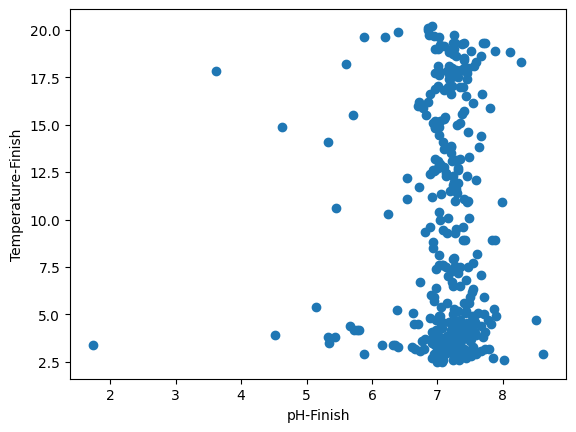

In [263]:
import matplotlib.pyplot as plt

plt.scatter(new_2009[('pH', 'Finish')], new_2009[('Temperature','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Chlorine(Free) & Temperature(Finish) 2009

In [264]:
correlation_coefficient = new_2009[('Chlorine', 'Free')].corr(new_2009[('Temperature','Finish')])

In [265]:
print(correlation_coefficient)

-0.03218317925335264


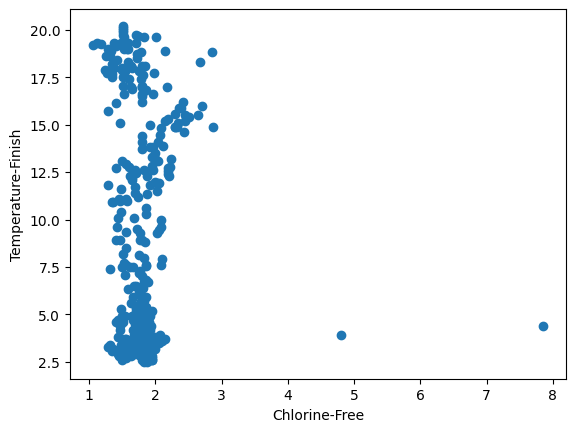

In [266]:
import matplotlib.pyplot as plt

plt.scatter(new_2009[('Chlorine', 'Free')], new_2009[('Temperature','Finish')])
plt.xlabel('Chlorine-Free')
plt.ylabel('Temperature-Finish')
plt.show()

# Turbidity(Finish) & Temperature(Finish) 2009

In [267]:
correlation_coefficient = new_2009[('Turbidity', 'Finish')].corr(new_2009[('Temperature','Finish')])

In [268]:
print(correlation_coefficient)

0.012598918111881964


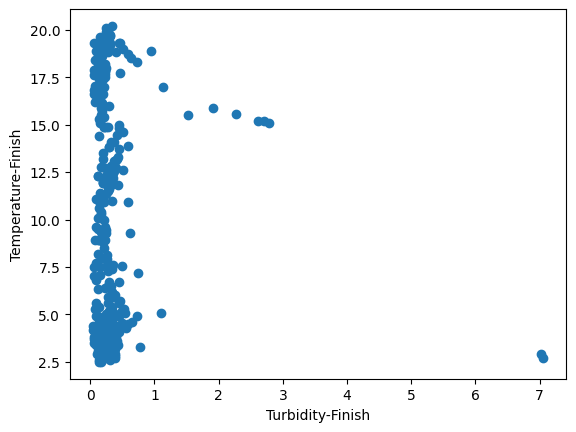

In [269]:
import matplotlib.pyplot as plt

plt.scatter(new_2009[('Turbidity', 'Finish')], new_2009[('Temperature','Finish')])
plt.xlabel('Turbidity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Conductivity(Finish) & Temperature(Finish) 2009

In [270]:
correlation_coefficient = new_2009[('Conductivity', 'Finish')].corr(new_2009[('Temperature','Finish')])

In [271]:
print(correlation_coefficient)

-0.6099556872775597


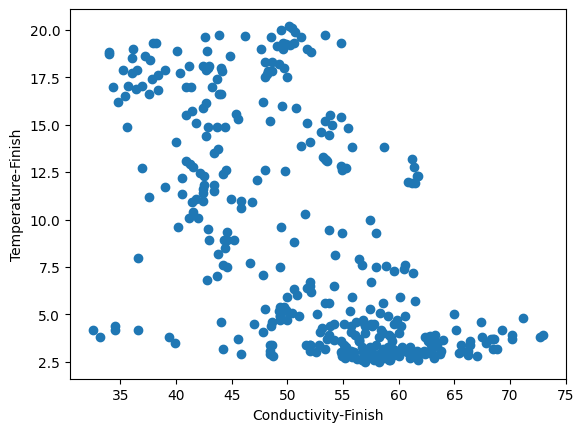

In [272]:
import matplotlib.pyplot as plt

plt.scatter(new_2009[('Conductivity', 'Finish')], new_2009[('Temperature','Finish')])
plt.xlabel('Conductivity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Temperature(Finish) 2010

In [273]:
correlation_coefficient = new_2010[('pH', 'Finish')].corr(new_2010[('Temperature','Finish')])

In [274]:
print(correlation_coefficient)

0.06037717621270172


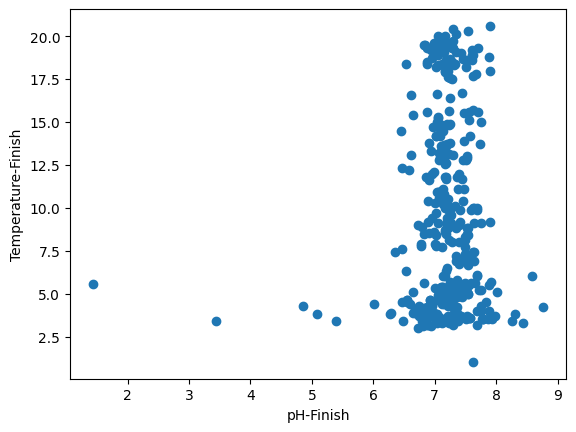

In [275]:
import matplotlib.pyplot as plt

plt.scatter(new_2010[('pH', 'Finish')], new_2010[('Temperature','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Chlorine(Free) & Temperature(Finish) 2010

In [276]:
correlation_coefficient = new_2010[('Chlorine', 'Free')].corr(new_2010[('Temperature','Finish')])

In [277]:
print(correlation_coefficient)

0.35308340906031804


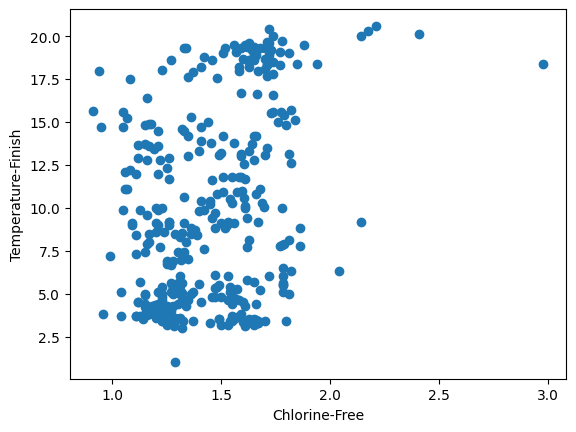

In [278]:
import matplotlib.pyplot as plt

plt.scatter(new_2010[('Chlorine', 'Free')], new_2010[('Temperature','Finish')])
plt.xlabel('Chlorine-Free')
plt.ylabel('Temperature-Finish')
plt.show()

# Turbidity(Finish) & Temperature(Finish) 2010

In [279]:
correlation_coefficient = new_2010[('Turbidity', 'Finish')].corr(new_2010[('Temperature','Finish')])

In [280]:
print(correlation_coefficient)

-0.1350980734743615


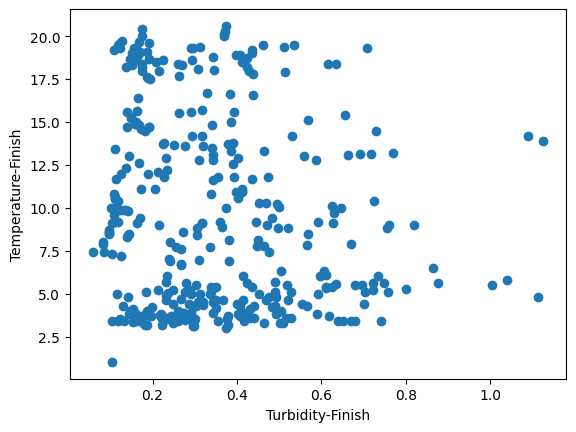

In [281]:
import matplotlib.pyplot as plt

plt.scatter(new_2010[('Turbidity', 'Finish')], new_2010[('Temperature','Finish')])
plt.xlabel('Turbidity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Conductivity(Finish) & Temperature(Finish) 2010

In [282]:
correlation_coefficient = new_2010[('Conductivity', 'Finish')].corr(new_2010[('Temperature','Finish')])

In [283]:
print(correlation_coefficient)

0.004582002158488375


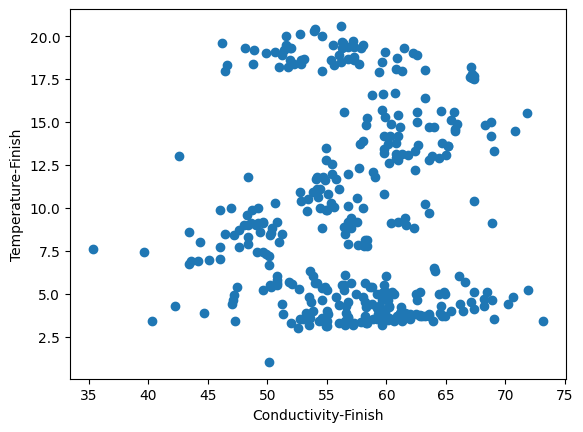

In [284]:
import matplotlib.pyplot as plt

plt.scatter(new_2010[('Conductivity', 'Finish')], new_2010[('Temperature','Finish')])
plt.xlabel('Conductivity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Temperature(Finish) 2011

In [285]:
correlation_coefficient = new_2011[('pH', 'Finish')].corr(new_2011[('Temperature','Finish')])

In [286]:
print(correlation_coefficient)

-0.27407929331591285


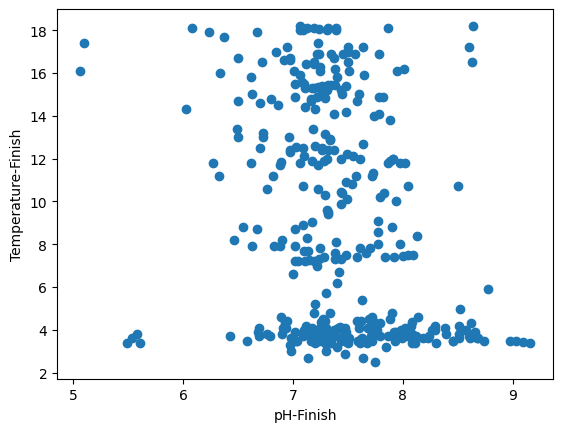

In [287]:
import matplotlib.pyplot as plt

plt.scatter(new_2011[('pH', 'Finish')], new_2011[('Temperature','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Chlorine(Free) & Temperature(Finish) 2011

In [288]:
correlation_coefficient = new_2011[('Chlorine', 'Free')].corr(new_2011[('Temperature','Finish')])

In [289]:
print(correlation_coefficient)

-0.22722270888211918


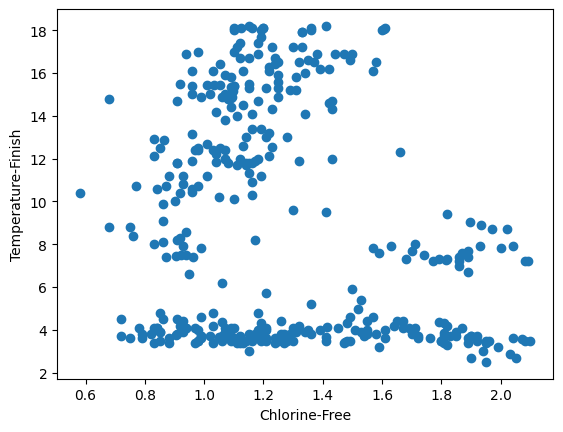

In [290]:
import matplotlib.pyplot as plt

plt.scatter(new_2011[('Chlorine', 'Free')], new_2011[('Temperature','Finish')])
plt.xlabel('Chlorine-Free')
plt.ylabel('Temperature-Finish')
plt.show()

# Turbidity(Finish) & Temperature(Finish) 2011

In [291]:
correlation_coefficient = new_2011[('Turbidity', 'Finish')].corr(new_2011[('Temperature','Finish')])

In [292]:
print(correlation_coefficient)

0.057453079941270704


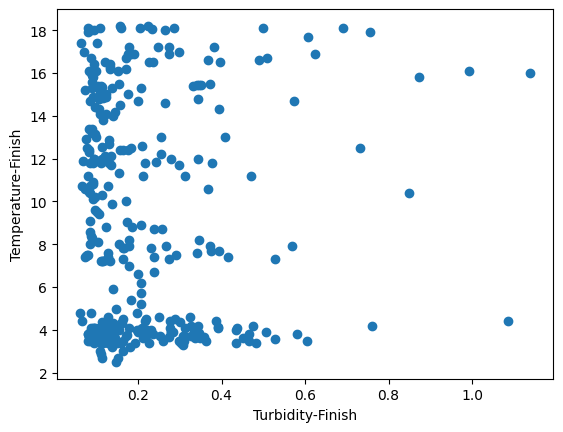

In [293]:
import matplotlib.pyplot as plt

plt.scatter(new_2011[('Turbidity', 'Finish')], new_2011[('Temperature','Finish')])
plt.xlabel('Turbidity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Conductivity(Finish) & Temperature(Finish) 2011

In [294]:
correlation_coefficient = new_2011[('Conductivity', 'Finish')].corr(new_2011[('Temperature','Finish')])

In [295]:
print(correlation_coefficient)

-0.4985021555253185


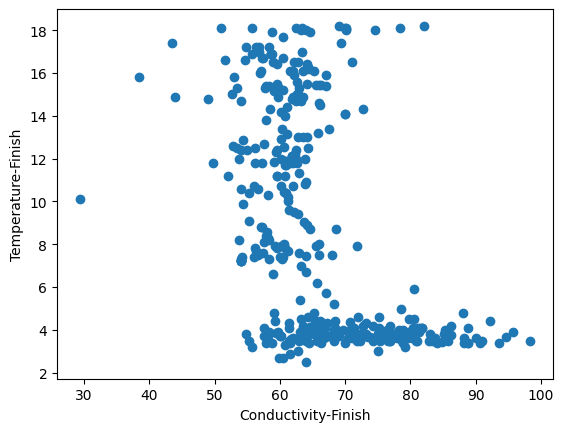

In [296]:
import matplotlib.pyplot as plt

plt.scatter(new_2011[('Conductivity', 'Finish')], new_2011[('Temperature','Finish')])
plt.xlabel('Conductivity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Temperature(Finish) 2012

In [327]:
correlation_coefficient = new_2012[('pH', 'Finish')].corr(new_2012[('Temperature','Finish')])

In [328]:
print(correlation_coefficient)

0.1733009711749478


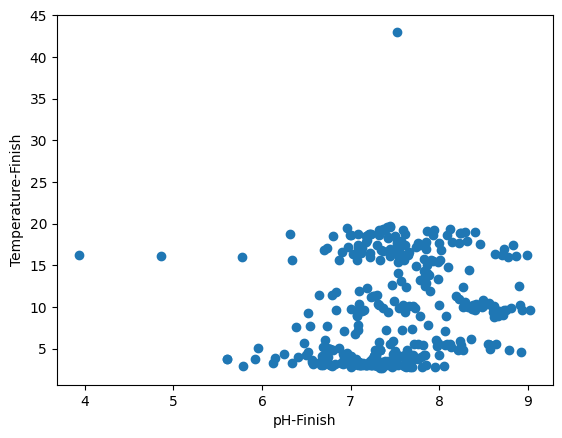

In [329]:
import matplotlib.pyplot as plt

plt.scatter(new_2012[('pH', 'Finish')], new_2012[('Temperature','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Chlorine(Free) & Temperature(Finish) 2012

In [330]:
correlation_coefficient = new_2012[('Chlorine', 'Free')].corr(new_2012[('Temperature','Finish')])

In [331]:
print(correlation_coefficient)

0.4275016062640874


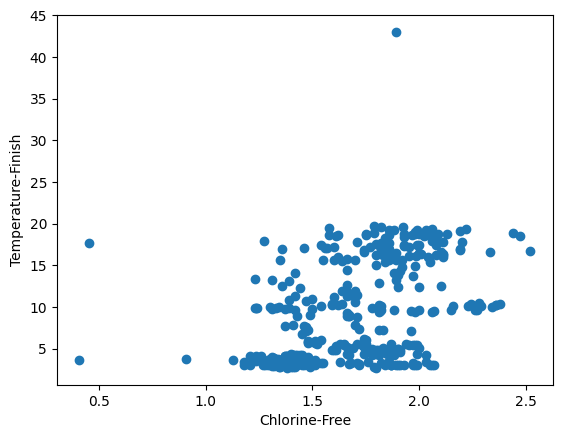

In [332]:
import matplotlib.pyplot as plt

plt.scatter(new_2012[('Chlorine', 'Free')], new_2012[('Temperature','Finish')])
plt.xlabel('Chlorine-Free')
plt.ylabel('Temperature-Finish')
plt.show()

# Turbidity(Finish) & Temperature(Finish) 2012

In [333]:
correlation_coefficient = new_2012[('Turbidity', 'Finish')].corr(new_2012[('Temperature','Finish')])

In [334]:
print(correlation_coefficient)

-0.5237753367912037


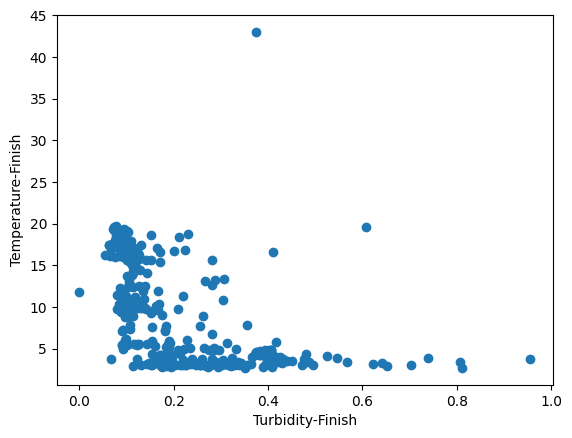

In [335]:
import matplotlib.pyplot as plt

plt.scatter(new_2012[('Turbidity', 'Finish')], new_2012[('Temperature','Finish')])
plt.xlabel('Turbidity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Conductivity(Finish) & Temperature(Finish) 2012

In [339]:
correlation_coefficient = new_2012[('Conductivity', 'Finish')].corr(new_2012[('Temperature','Finish')])

In [340]:
print(correlation_coefficient)

-0.39385267326102463


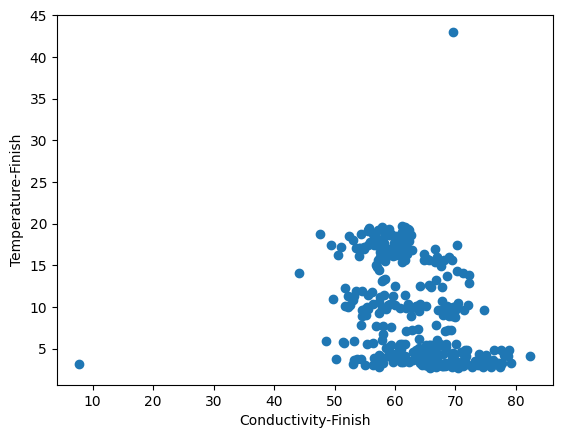

In [341]:
import matplotlib.pyplot as plt

plt.scatter(new_2012[('Conductivity', 'Finish')], new_2012[('Temperature','Finish')])
plt.xlabel('Conductivity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Temperature(Finish) 2013

In [336]:
correlation_coefficient = new_2013[('pH', 'Finish')].corr(new_2013[('Temperature','Finish')])

In [337]:
print(correlation_coefficient)

0.08087641756114909


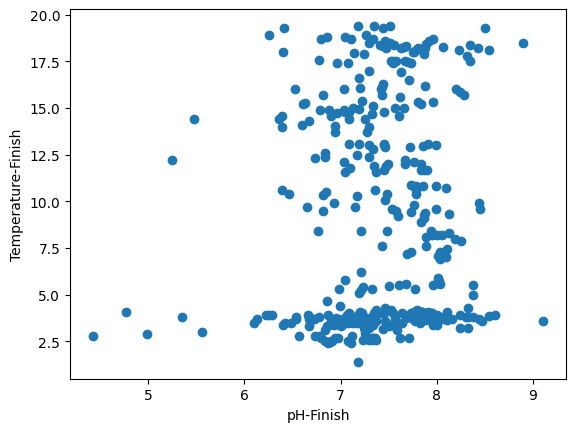

In [338]:
import matplotlib.pyplot as plt

plt.scatter(new_2013[('pH', 'Finish')], new_2013[('Temperature','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Chlorine(Free) & Temperature(Finish) 2013

In [342]:
correlation_coefficient = new_2013[('Chlorine', 'Free')].corr(new_2013[('Temperature','Finish')])

In [343]:
print(correlation_coefficient)

0.2514400990855371


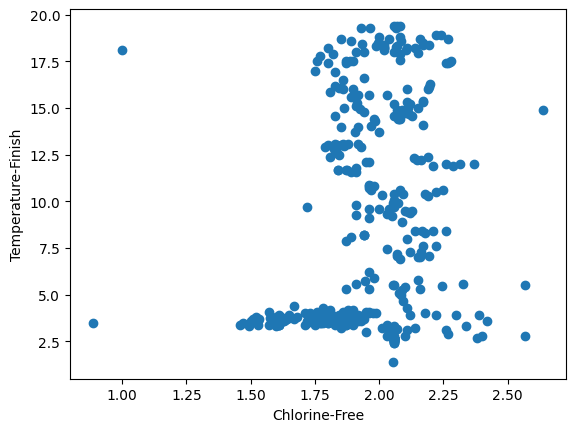

In [344]:
import matplotlib.pyplot as plt

plt.scatter(new_2013[('Chlorine', 'Free')], new_2013[('Temperature','Finish')])
plt.xlabel('Chlorine-Free')
plt.ylabel('Temperature-Finish')
plt.show()

# Turbidity(Finish) & Temperature(Finish) 2013

In [345]:
correlation_coefficient = new_2013[('Turbidity', 'Finish')].corr(new_2013[('Temperature','Finish')])

In [346]:
print(correlation_coefficient)

-0.45611124205992937


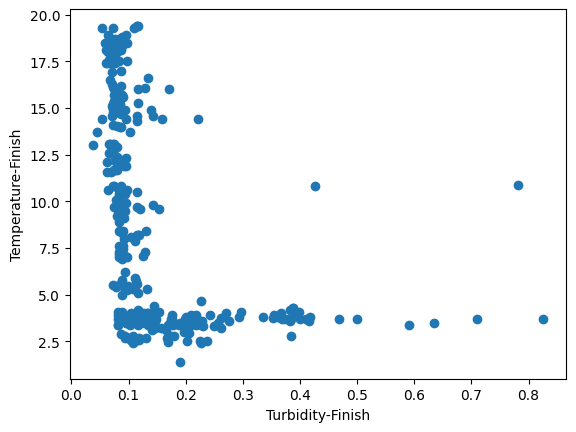

In [347]:
import matplotlib.pyplot as plt

plt.scatter(new_2013[('Turbidity', 'Finish')], new_2013[('Temperature','Finish')])
plt.xlabel('Turbidity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Conductivity(Finish) & Temperature(Finish) 2013

In [351]:
correlation_coefficient = new_2013[('Conductivity', 'Finish')].corr(new_2013[('Temperature','Finish')])

In [352]:
print(correlation_coefficient)

-0.6275597158185146


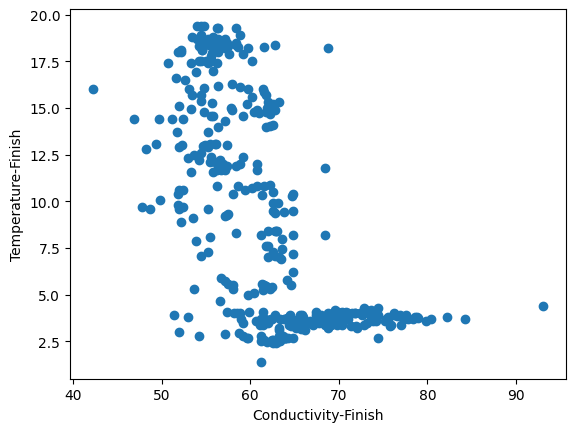

In [353]:
import matplotlib.pyplot as plt

plt.scatter(new_2013[('Conductivity', 'Finish')], new_2013[('Temperature','Finish')])
plt.xlabel('Conductivity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Temperature(Finish) 2014

In [348]:
correlation_coefficient = new_2014[('pH', 'Raw')].corr(new_2014[('Temperature','Finish')])

In [349]:
print(correlation_coefficient)

0.522385179360851


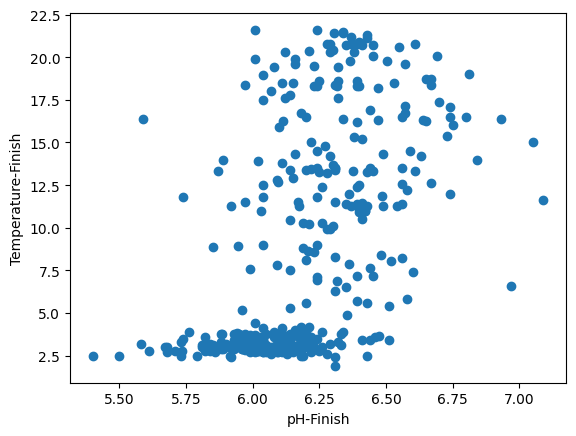

In [350]:
import matplotlib.pyplot as plt

plt.scatter(new_2014[('pH', 'Raw')], new_2014[('Temperature','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Chlorine(Free) & Temperature(Finish) 2014

In [354]:
correlation_coefficient = new_2014[('Chlorine', 'Free')].corr(new_2014[('Temperature','Finish')])

In [355]:
print(correlation_coefficient)

0.26916499663806337


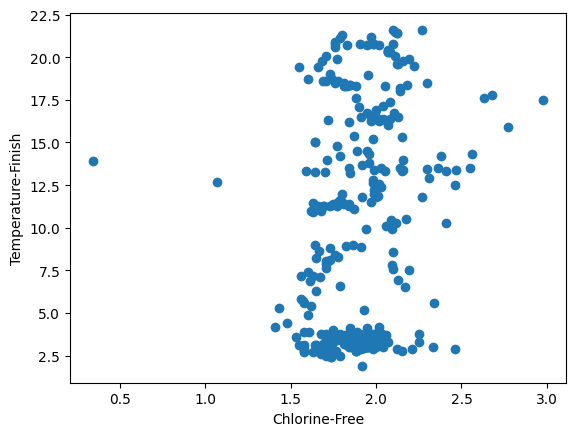

In [356]:
import matplotlib.pyplot as plt

plt.scatter(new_2014[('Chlorine', 'Free')], new_2014[('Temperature','Finish')])
plt.xlabel('Chlorine-Free')
plt.ylabel('Temperature-Finish')
plt.show()

# Turbidity(Finish) & Temperature(Finish) 2014

In [357]:
correlation_coefficient = new_2014[('Turbidity', 'Finish')].corr(new_2014[('Temperature','Finish')])

In [358]:
print(correlation_coefficient)

-0.38507542033033215


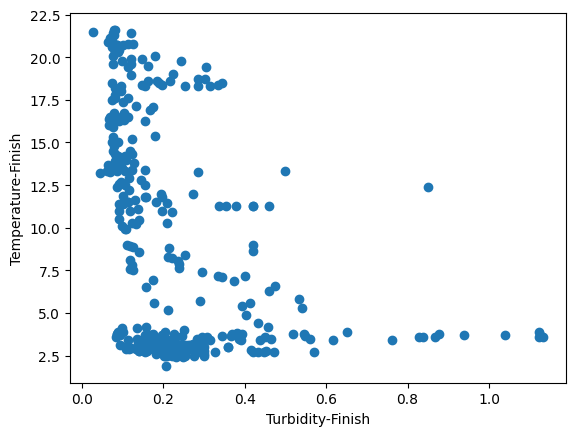

In [359]:
import matplotlib.pyplot as plt

plt.scatter(new_2014[('Turbidity', 'Finish')], new_2014[('Temperature','Finish')])
plt.xlabel('Turbidity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Conductivity(Finish) & Temperature(Finish) 2014

In [360]:
correlation_coefficient = new_2014[('Conductivity', 'Finish')].corr(new_2014[('Temperature','Finish')])

In [361]:
print(correlation_coefficient)

-0.4521873376884409


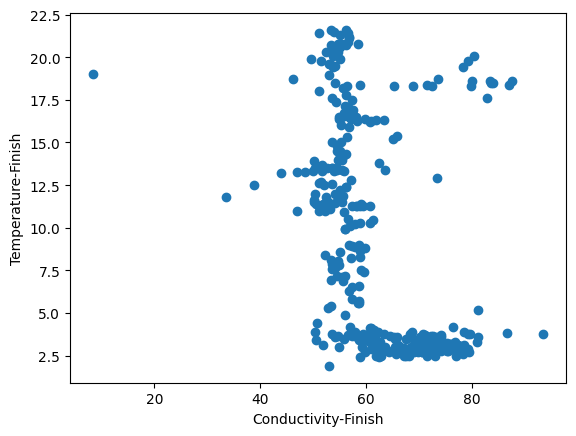

In [362]:
import matplotlib.pyplot as plt

plt.scatter(new_2014[('Conductivity', 'Finish')], new_2014[('Temperature','Finish')])
plt.xlabel('Conductivity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Temperature(Finish) 2015

In [363]:
correlation_coefficient = new_2015[('pH', 'Finish')].corr(new_2015[('Temperature','Finish')])

In [364]:
print(correlation_coefficient)

0.37043660789468447


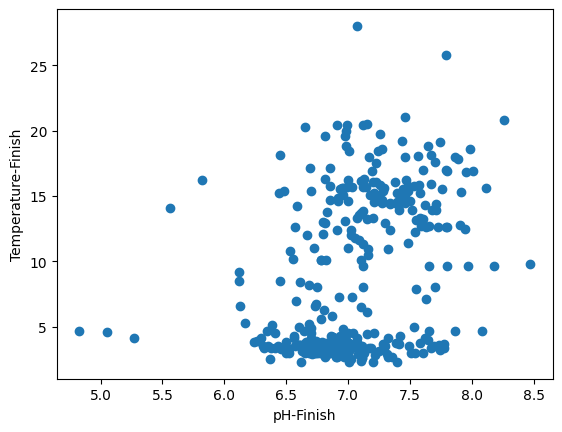

In [365]:
import matplotlib.pyplot as plt

plt.scatter(new_2015[('pH', 'Finish')], new_2015[('Temperature','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Chlorine(Free) & Temperature(Finish) 2015

In [366]:
correlation_coefficient = new_2015[('Chlorine', 'Free')].corr(new_2015[('Temperature','Finish')])

In [367]:
print(correlation_coefficient)

0.11331815362192689


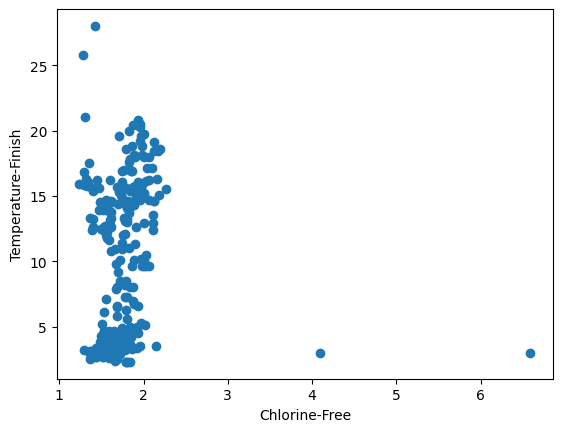

In [368]:
import matplotlib.pyplot as plt

plt.scatter(new_2015[('Chlorine', 'Free')], new_2015[('Temperature','Finish')])
plt.xlabel('Chlorine-Free')
plt.ylabel('Temperature-Finish')
plt.show()

# Turbidity(Finish) & Temperature(Finish) 2015

In [369]:
correlation_coefficient = new_2015[('Turbidity', 'Finish')].corr(new_2015[('Temperature','Finish')])

In [370]:
print(correlation_coefficient)

-0.35496501614569265


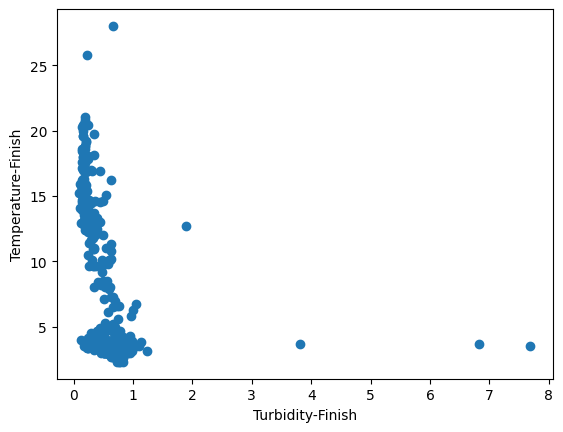

In [371]:
import matplotlib.pyplot as plt

plt.scatter(new_2015[('Turbidity', 'Finish')], new_2015[('Temperature','Finish')])
plt.xlabel('Turbidity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Conductivity(Finish) & Temperature(Finish) 2015

In [372]:
correlation_coefficient = new_2015[('Conductivity', 'Finish')].corr(new_2015[('Temperature','Finish')])

In [373]:
print(correlation_coefficient)

-0.530921998059893


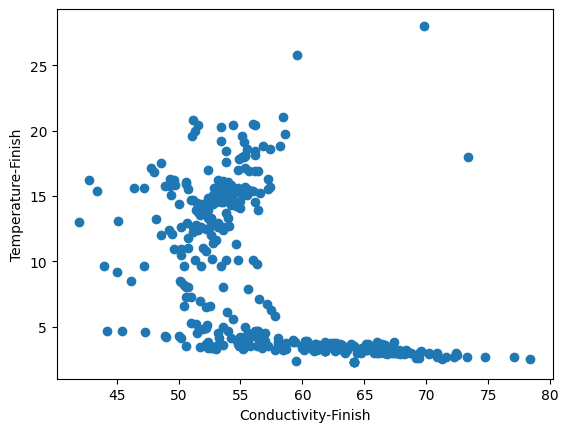

In [374]:
import matplotlib.pyplot as plt

plt.scatter(new_2015[('Conductivity', 'Finish')], new_2015[('Temperature','Finish')])
plt.xlabel('Conductivity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Temperature(Finish) 2019

In [375]:
correlation_coefficient = new_2019[('pH', 'Finish')].corr(new_2019[('Temperature','Finish')])

In [376]:
print(correlation_coefficient)

0.549018153350226


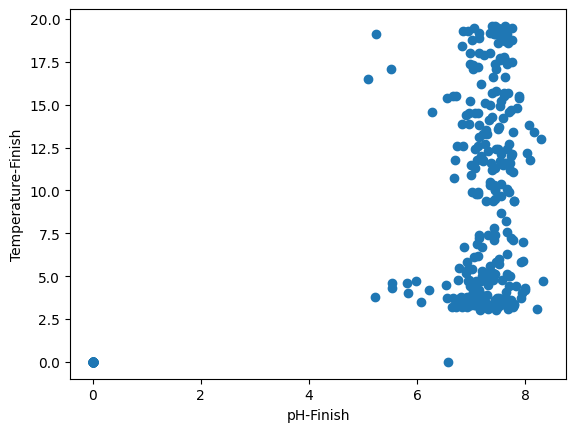

In [377]:
import matplotlib.pyplot as plt

plt.scatter(new_2019[('pH', 'Finish')], new_2019[('Temperature','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Chlorine(Free) & Temperature(Finish) 2019

In [378]:
correlation_coefficient = new_2019[('Chlorine', 'Free')].corr(new_2019[('Temperature','Finish')])

In [379]:
print(correlation_coefficient)

0.4994907407603146


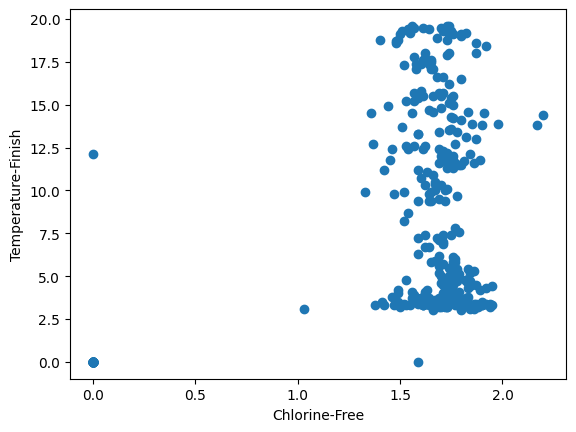

In [380]:
import matplotlib.pyplot as plt

plt.scatter(new_2019[('Chlorine', 'Free')], new_2019[('Temperature','Finish')])
plt.xlabel('Chlorine-Free')
plt.ylabel('Temperature-Finish')
plt.show()

# Turbidity(Finish) & Temperature(Finish) 2019

In [381]:
correlation_coefficient = new_2019[('Turbidity', 'Finish')].corr(new_2019[('Temperature','Finish')])

In [382]:
print(correlation_coefficient)

0.17881468502262993


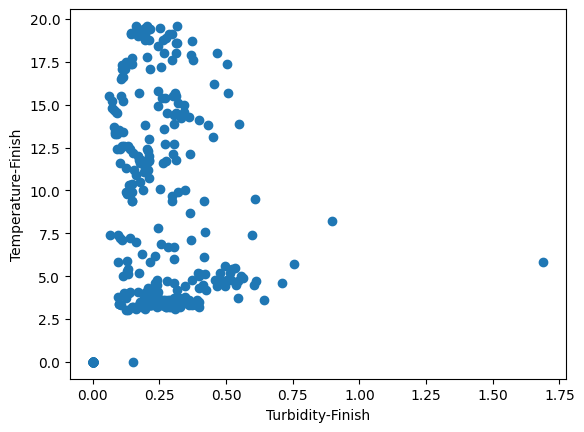

In [383]:
import matplotlib.pyplot as plt

plt.scatter(new_2019[('Turbidity', 'Finish')], new_2019[('Temperature','Finish')])
plt.xlabel('Turbidity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Conductivity(Finish) & Temperature(Finish) 2019

In [384]:
correlation_coefficient = new_2019[('Conductivity', 'Finish')].corr(new_2019[('Temperature','Finish')])

In [385]:
print(correlation_coefficient)

0.6951087527718203


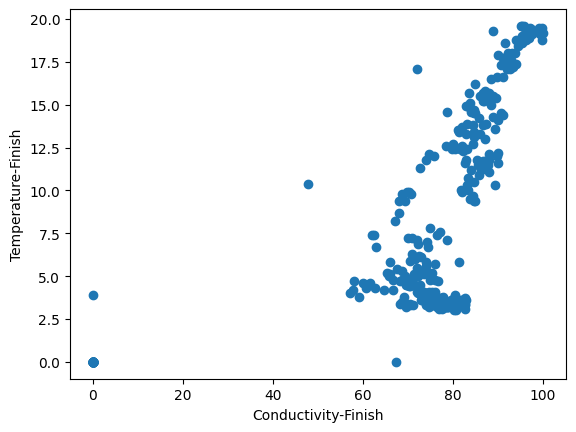

In [386]:
import matplotlib.pyplot as plt

plt.scatter(new_2019[('Conductivity', 'Finish')], new_2019[('Temperature','Finish')])
plt.xlabel('Conductivity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Temperature(Finish) 2020

In [387]:
correlation_coefficient = new_2020[('pH', 'Finish')].corr(new_2020[('Temperature','Finish')])

In [388]:
print(correlation_coefficient)

0.6275184140857457


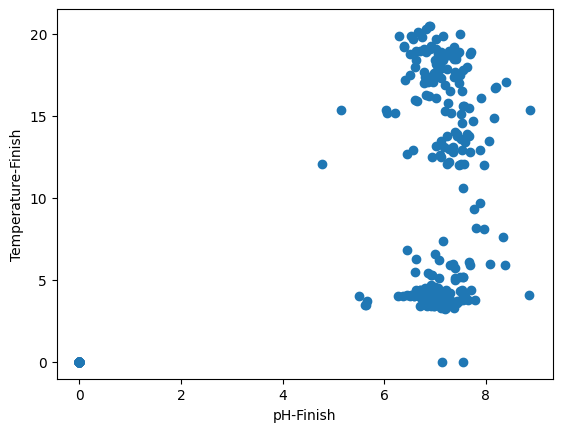

In [389]:
import matplotlib.pyplot as plt

plt.scatter(new_2020[('pH', 'Finish')], new_2020[('Temperature','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Chlorine(Free) & Temperature(Finish) 2020

In [390]:
correlation_coefficient = new_2020[('Chlorine', 'Free')].corr(new_2020[('Temperature','Finish')])

In [391]:
print(correlation_coefficient)

0.622276012098035


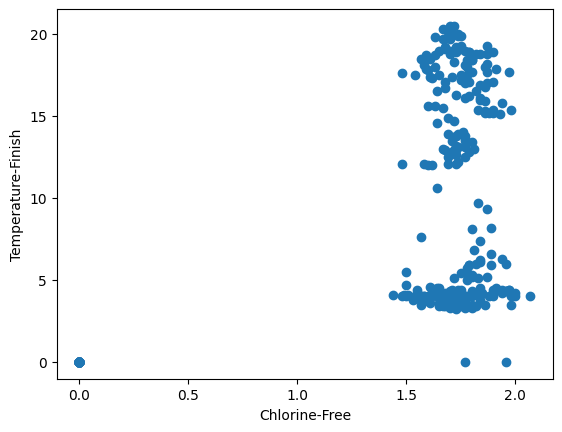

In [392]:
import matplotlib.pyplot as plt

plt.scatter(new_2020[('Chlorine', 'Free')], new_2020[('Temperature','Finish')])
plt.xlabel('Chlorine-Free')
plt.ylabel('Temperature-Finish')
plt.show()

# Turbidity(Finish) & Temperature(Finish) 2020

In [393]:
correlation_coefficient = new_2020[('Turbidity', 'Finish')].corr(new_2020[('Temperature','Finish')])

In [394]:
print(correlation_coefficient)

0.10460898597985656


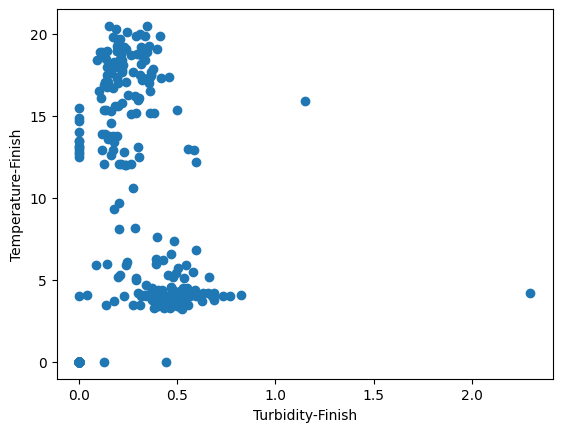

In [395]:
import matplotlib.pyplot as plt

plt.scatter(new_2020[('Turbidity', 'Finish')], new_2020[('Temperature','Finish')])
plt.xlabel('Turbidity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Conductivity(Finish) & Temperature(Finish) 2020

In [396]:
correlation_coefficient = new_2020[('Conductivity', 'Finish')].corr(new_2020[('Temperature','Finish')])

In [397]:
print(correlation_coefficient)

0.742235157021131


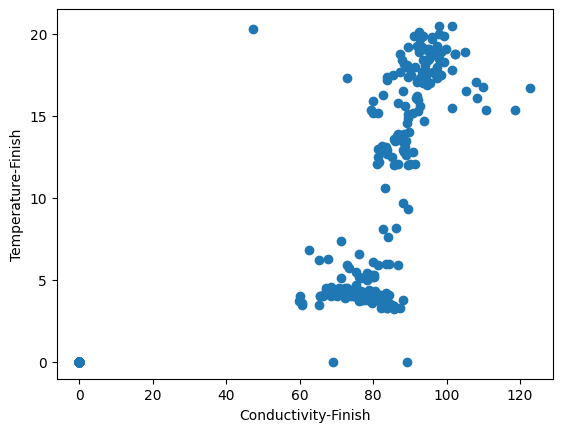

In [398]:
import matplotlib.pyplot as plt

plt.scatter(new_2020[('Conductivity', 'Finish')], new_2020[('Temperature','Finish')])
plt.xlabel('Conductivity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Temperature(Finish) 2021

In [399]:
correlation_coefficient = new_2021[('pH', 'Finish')].corr(new_2021[('Temperature','Finish')])

In [400]:
print(correlation_coefficient)

-0.05357664866392921


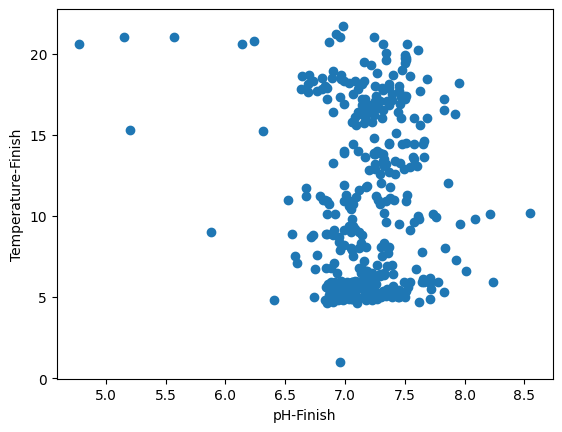

In [401]:
import matplotlib.pyplot as plt

plt.scatter(new_2021[('pH', 'Finish')], new_2021[('Temperature','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Chlorine(Free) & Temperature(Finish) 2021

In [402]:
correlation_coefficient = new_2021[('Chlorine', 'Free')].corr(new_2021[('Temperature','Finish')])

In [403]:
print(correlation_coefficient)

0.37451527721927286


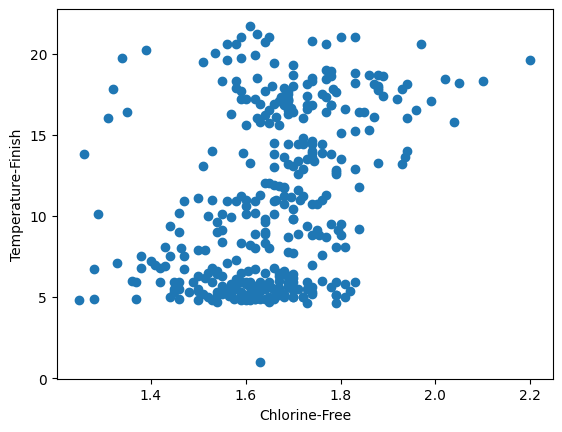

In [404]:
import matplotlib.pyplot as plt

plt.scatter(new_2021[('Chlorine', 'Free')], new_2021[('Temperature','Finish')])
plt.xlabel('Chlorine-Free')
plt.ylabel('Temperature-Finish')
plt.show()

# Turbidity(Finish) & Temperature(Finish) 2021

In [405]:
correlation_coefficient = new_2021[('Turbidity', 'Finish')].corr(new_2021[('Temperature','Finish')])

In [406]:
print(correlation_coefficient)

-0.48112568577047526


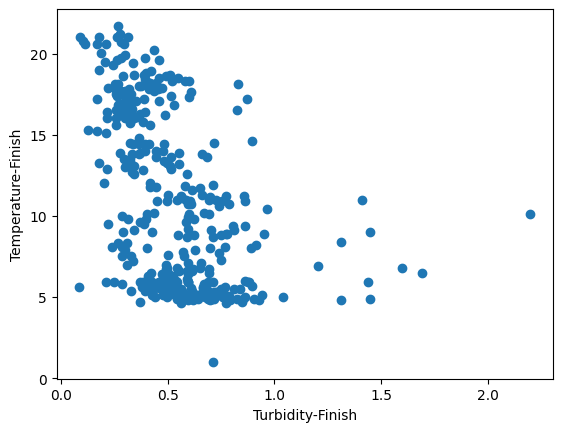

In [407]:
import matplotlib.pyplot as plt

plt.scatter(new_2021[('Turbidity', 'Finish')], new_2021[('Temperature','Finish')])
plt.xlabel('Turbidity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Conductivity(Finish) & Temperature(Finish) 2021

In [408]:
correlation_coefficient = new_2021[('Conductivity', 'Finish')].corr(new_2021[('Temperature','Finish')])

In [409]:
print(correlation_coefficient)

0.4889824260307171


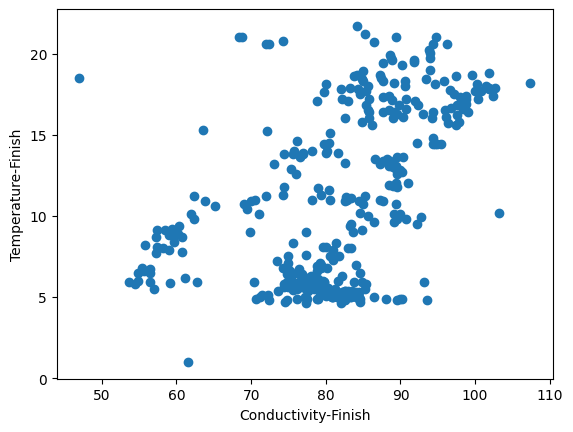

In [410]:
import matplotlib.pyplot as plt

plt.scatter(new_2021[('Conductivity', 'Finish')], new_2021[('Temperature','Finish')])
plt.xlabel('Conductivity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Temperature(Finish) 2022

In [411]:
correlation_coefficient = new_2022[('pH', 'Finish')].corr(new_2022[('Temperature','Finish')])

In [412]:
print(correlation_coefficient)

0.6272001657123398


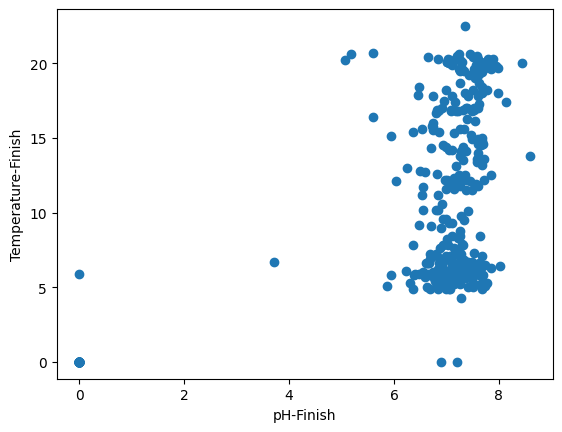

In [413]:
import matplotlib.pyplot as plt

plt.scatter(new_2022[('pH', 'Finish')], new_2022[('Temperature','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Chlorine(Free) & Temperature(Finish) 2022

In [414]:
correlation_coefficient = new_2022[('Chlorine', 'Free')].corr(new_2022[('Temperature','Finish')])

In [415]:
print(correlation_coefficient)

0.6070081918826089


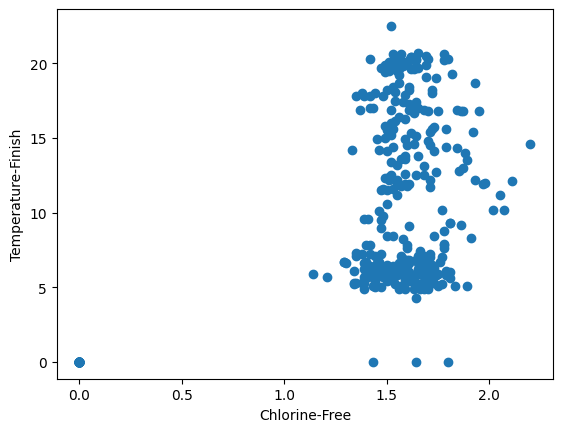

In [416]:
import matplotlib.pyplot as plt

plt.scatter(new_2022[('Chlorine', 'Free')], new_2022[('Temperature','Finish')])
plt.xlabel('Chlorine-Free')
plt.ylabel('Temperature-Finish')
plt.show()

# Turbidity(Finish) & Temperature(Finish) 2022

In [417]:
correlation_coefficient = new_2022[('Turbidity', 'Finish')].corr(new_2022[('Temperature','Finish')])

In [418]:
print(correlation_coefficient)

-0.012282729079382089


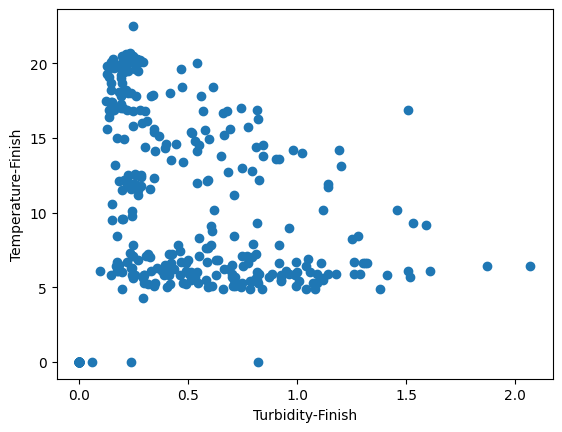

In [419]:
import matplotlib.pyplot as plt

plt.scatter(new_2022[('Turbidity', 'Finish')], new_2022[('Temperature','Finish')])
plt.xlabel('Turbidity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Conductivity(Finish) & Temperature(Finish) 2022

In [420]:
correlation_coefficient = new_2022[('Conductivity', 'Finish')].corr(new_2022[('Temperature','Finish')])

In [421]:
print(correlation_coefficient)

0.18990458012162023


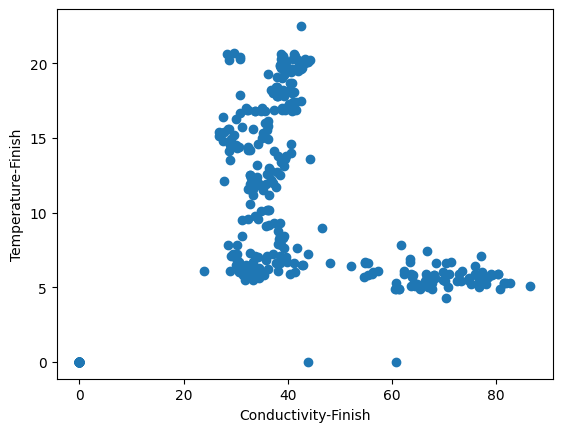

In [422]:
import matplotlib.pyplot as plt

plt.scatter(new_2022[('Conductivity', 'Finish')], new_2022[('Temperature','Finish')])
plt.xlabel('Conductivity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Temperature(Finish) 2023

In [423]:
correlation_coefficient = new_2023[('pH', 'Finish')].corr(new_2023[('Temperature','Finish')])

In [424]:
print(correlation_coefficient)

0.9725261954688912


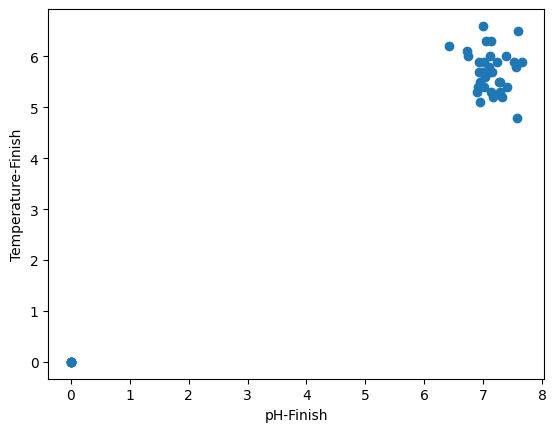

In [425]:
import matplotlib.pyplot as plt

plt.scatter(new_2023[('pH', 'Finish')], new_2023[('Temperature','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Chlorine(Free) & Temperature(Finish) 2023

In [426]:
correlation_coefficient = new_2023[('Chlorine', 'Free')].corr(new_2023[('Temperature','Finish')])

In [427]:
print(correlation_coefficient)

0.9192264543741261


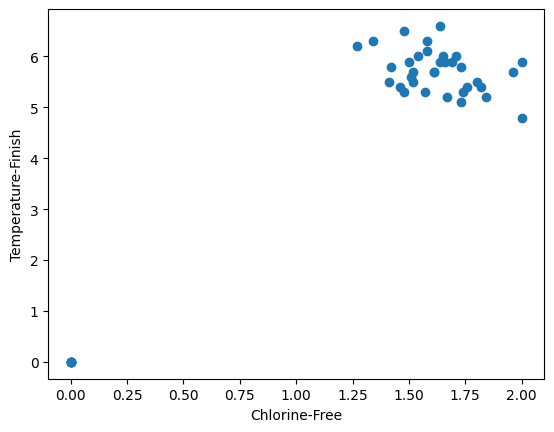

In [428]:
import matplotlib.pyplot as plt

plt.scatter(new_2023[('Chlorine', 'Free')], new_2023[('Temperature','Finish')])
plt.xlabel('Chlorine-Free')
plt.ylabel('Temperature-Finish')
plt.show()

# Turbidity(Finish) & Temperature(Finish) 2022

In [429]:
correlation_coefficient = new_2023[('Turbidity', 'Finish')].corr(new_2023[('Temperature','Finish')])

In [430]:
print(correlation_coefficient)

0.5299527342800116


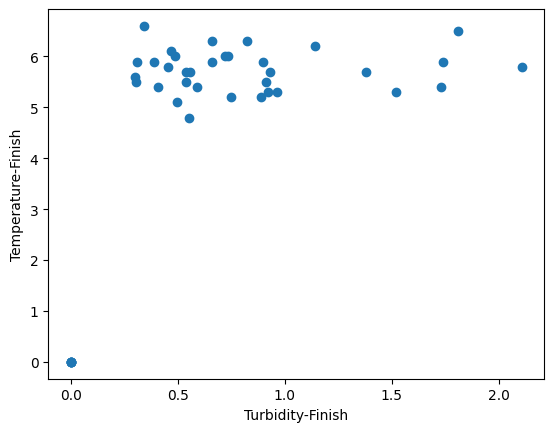

In [431]:
import matplotlib.pyplot as plt

plt.scatter(new_2023[('Turbidity', 'Finish')], new_2023[('Temperature','Finish')])
plt.xlabel('Turbidity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# Conductivity(Finish) & Temperature(Finish) 2023

In [432]:
correlation_coefficient = new_2023[('Conductivity', 'Finish')].corr(new_2023[('Temperature','Finish')])

In [433]:
print(correlation_coefficient)

0.8510412680418994


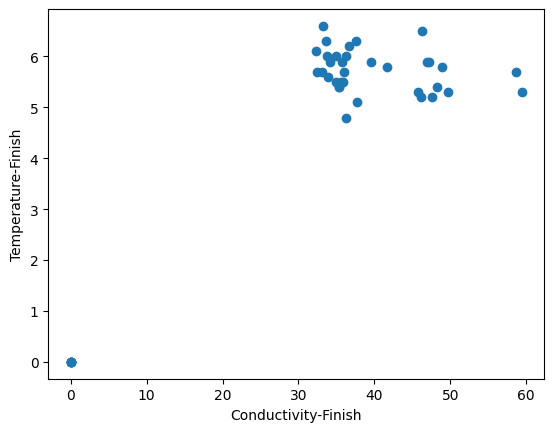

In [434]:
import matplotlib.pyplot as plt

plt.scatter(new_2023[('Conductivity', 'Finish')], new_2023[('Temperature','Finish')])
plt.xlabel('Conductivity-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Conductivity(Finish) 2009

In [435]:
correlation_coefficient = new_2009[('Conductivity', 'Finish')].corr(new_2009[('pH','Finish')])

In [436]:
print(correlation_coefficient)

0.1467398490931442


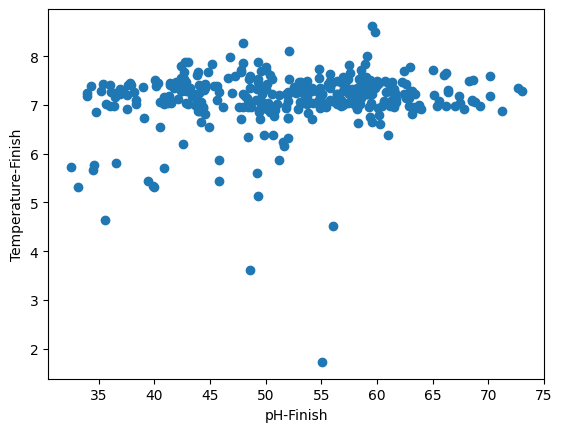

In [437]:
import matplotlib.pyplot as plt

plt.scatter(new_2009[('Conductivity', 'Finish')], new_2009[('pH','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Temperature-Finish')
plt.show()

# pH(Finish) & Conductivity(Finish) 2010

In [438]:
correlation_coefficient = new_2010[('Conductivity', 'Finish')].corr(new_2010[('pH','Finish')])

In [439]:
print(correlation_coefficient)

0.0878184497605234


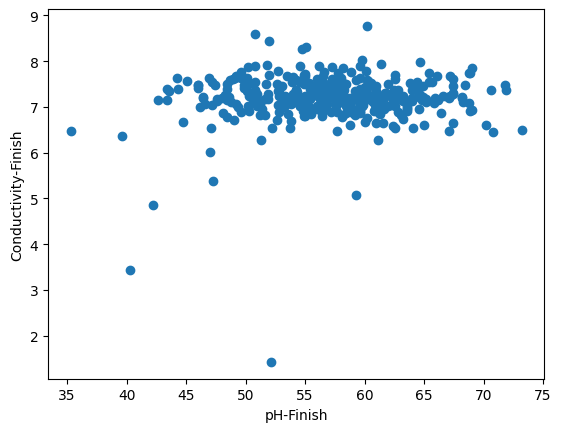

In [440]:
import matplotlib.pyplot as plt

plt.scatter(new_2010[('Conductivity', 'Finish')], new_2010[('pH','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Conductivity-Finish')
plt.show()

# pH(Finish) & Conductivity(Finish) 2011

In [441]:
correlation_coefficient = new_2011[('Conductivity', 'Finish')].corr(new_2011[('pH','Finish')])

In [442]:
print(correlation_coefficient)

0.3792187584892554


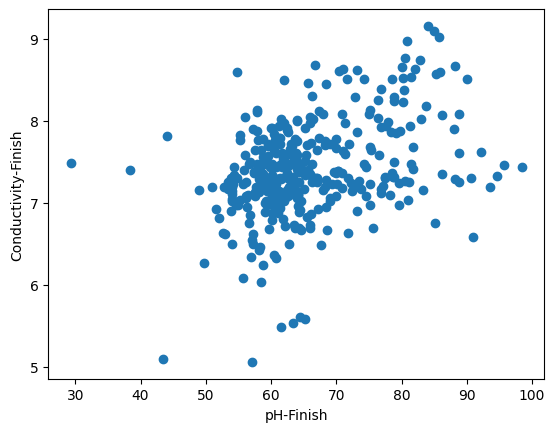

In [443]:
import matplotlib.pyplot as plt

plt.scatter(new_2011[('Conductivity', 'Finish')], new_2011[('pH','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Conductivity-Finish')
plt.show()

# pH(Finish) & Conductivity(Finish) 2012

In [444]:
correlation_coefficient = new_2012[('Conductivity', 'Finish')].corr(new_2012[('pH','Finish')])

In [445]:
print(correlation_coefficient)

0.19326907715455946


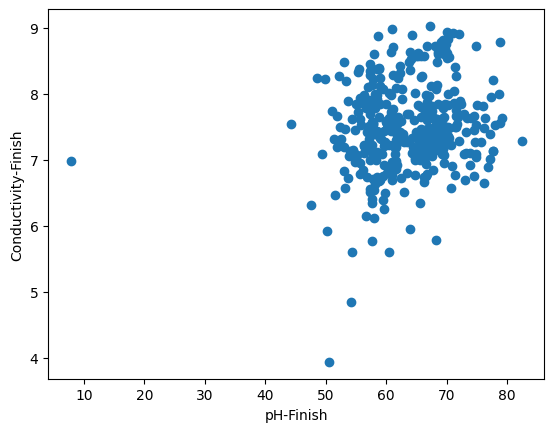

In [446]:
import matplotlib.pyplot as plt

plt.scatter(new_2012[('Conductivity', 'Finish')], new_2012[('pH','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Conductivity-Finish')
plt.show()

# pH(Finish) & Conductivity(Finish) 2013

In [447]:
correlation_coefficient = new_2013[('Conductivity', 'Finish')].corr(new_2013[('pH','Finish')])

In [448]:
print(correlation_coefficient)

0.12736704163970727


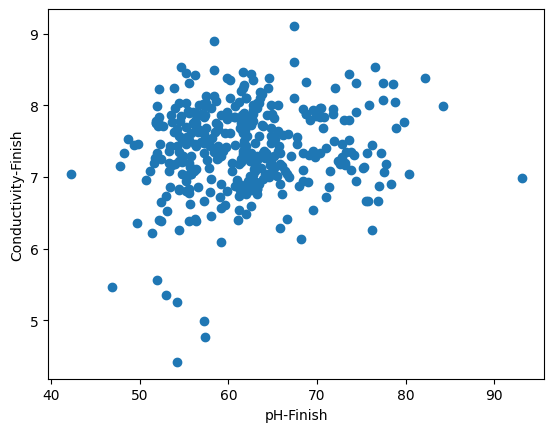

In [449]:
import matplotlib.pyplot as plt

plt.scatter(new_2013[('Conductivity', 'Finish')], new_2013[('pH','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Conductivity-Finish')
plt.show()

# pH(Finish) & Conductivity(Finish) 2014


In [450]:
correlation_coefficient = new_2014[('Conductivity', 'Finish')].corr(new_2014[('pH','Raw')])

In [451]:
print(correlation_coefficient)

-0.3828963203477624


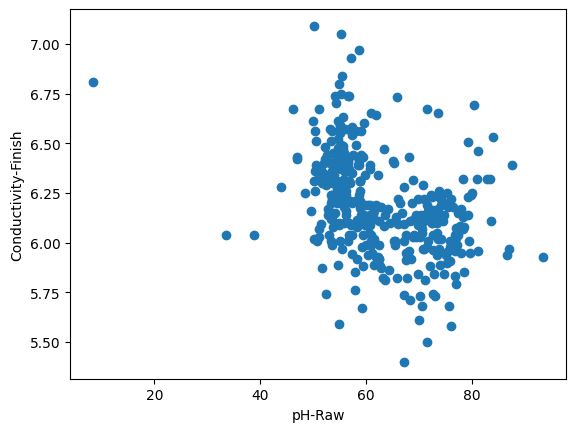

In [452]:
import matplotlib.pyplot as plt

plt.scatter(new_2014[('Conductivity', 'Finish')], new_2014[('pH','Raw')])
plt.xlabel('pH-Raw')
plt.ylabel('Conductivity-Finish')
plt.show()

# pH(Finish) & Conductivity(Finish) 2015

In [453]:
correlation_coefficient = new_2015[('Conductivity', 'Finish')].corr(new_2015[('pH','Finish')])

In [454]:
print(correlation_coefficient)

-0.041644772525191304


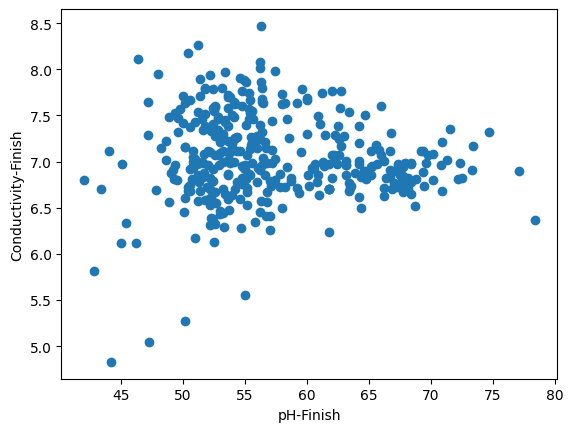

In [455]:
import matplotlib.pyplot as plt

plt.scatter(new_2015[('Conductivity', 'Finish')], new_2015[('pH','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Conductivity-Finish')
plt.show()

# pH(Finish) & Conductivity(Finish) 2019

In [456]:
correlation_coefficient = new_2019[('Conductivity', 'Finish')].corr(new_2019[('pH','Finish')])

In [457]:
print(correlation_coefficient)

0.9502047577778996


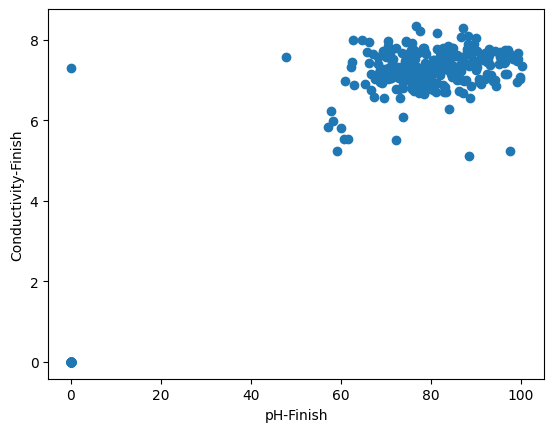

In [458]:
import matplotlib.pyplot as plt

plt.scatter(new_2019[('Conductivity', 'Finish')], new_2019[('pH','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Conductivity-Finish')
plt.show()

# pH(Finish) & Conductivity(Finish) 2020

In [459]:
correlation_coefficient = new_2020[('Conductivity', 'Finish')].corr(new_2020[('pH','Finish')])

In [460]:
print(correlation_coefficient)

0.9736423583499383


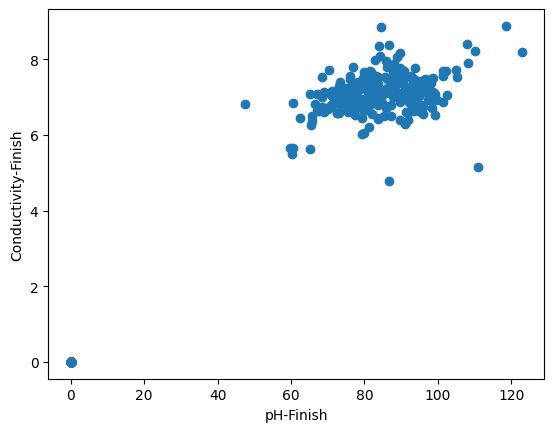

In [461]:
import matplotlib.pyplot as plt

plt.scatter(new_2020[('Conductivity', 'Finish')], new_2020[('pH','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Conductivity-Finish')
plt.show()

# pH(Finish) & Conductivity(Finish) 2021

In [462]:
correlation_coefficient = new_2021[('Conductivity', 'Finish')].corr(new_2021[('pH','Finish')])

In [463]:
print(correlation_coefficient)

0.33388841051019935


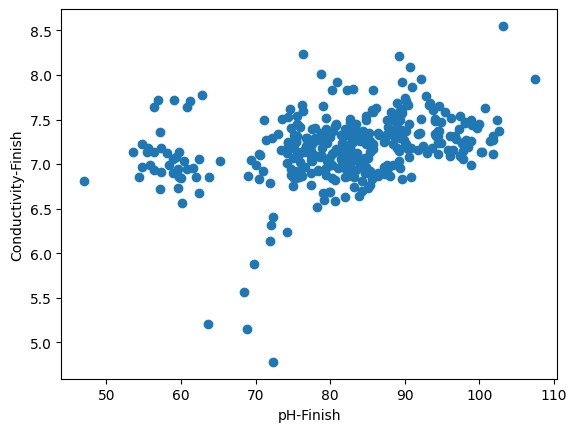

In [464]:
import matplotlib.pyplot as plt

plt.scatter(new_2021[('Conductivity', 'Finish')], new_2021[('pH','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Conductivity-Finish')
plt.show()

# pH(Finish) & Conductivity(Finish) 2022

In [465]:
correlation_coefficient = new_2022[('Conductivity', 'Finish')].corr(new_2022[('pH','Finish')])

In [466]:
print(correlation_coefficient)

0.7172079414826947


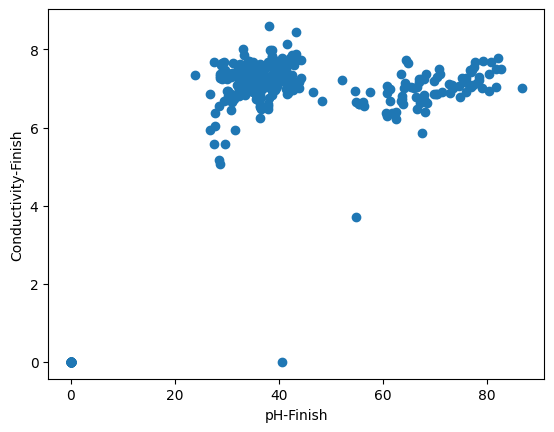

In [467]:
import matplotlib.pyplot as plt

plt.scatter(new_2022[('Conductivity', 'Finish')], new_2022[('pH','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Conductivity-Finish')
plt.show()

# pH(Finish) & Conductivity(Finish) 2023

In [468]:
correlation_coefficient = new_2023[('Conductivity', 'Finish')].corr(new_2023[('pH','Finish')])

In [469]:
print(correlation_coefficient)

0.8964859526366177


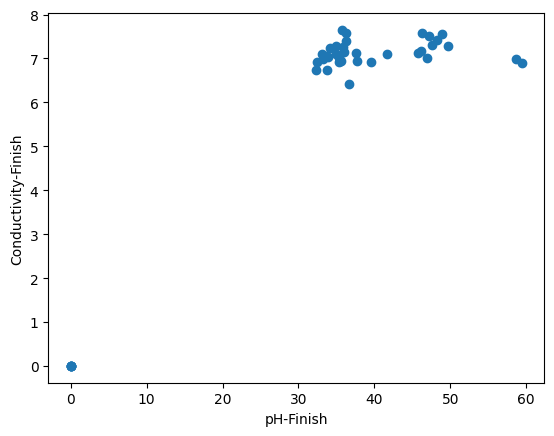

In [470]:
import matplotlib.pyplot as plt

plt.scatter(new_2023[('Conductivity', 'Finish')], new_2023[('pH','Finish')])
plt.xlabel('pH-Finish')
plt.ylabel('Conductivity-Finish')
plt.show()

# pH(Finish) & Colour(Raw T) 2009

In [486]:
correlation_coefficient = new_2009[('pH', 'Finish')].corr(new_2009[('Colour','Raw T')])

In [487]:
print(correlation_coefficient)

-0.06955541507514577


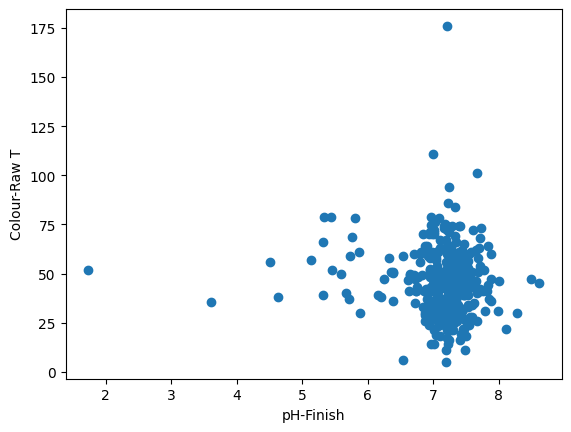

In [488]:
import matplotlib.pyplot as plt

plt.scatter(new_2009[('pH', 'Finish')], new_2009[('Colour','Raw T')])
plt.xlabel('pH-Finish')
plt.ylabel('Colour-Raw T')
plt.show()

# pH(Finish) & Colour(Raw T) 2010

In [483]:
correlation_coefficient = new_2010[('pH', 'Finish')].corr(new_2010[('Colour','Raw T')])

In [484]:
print(correlation_coefficient)

0.02447931005813295


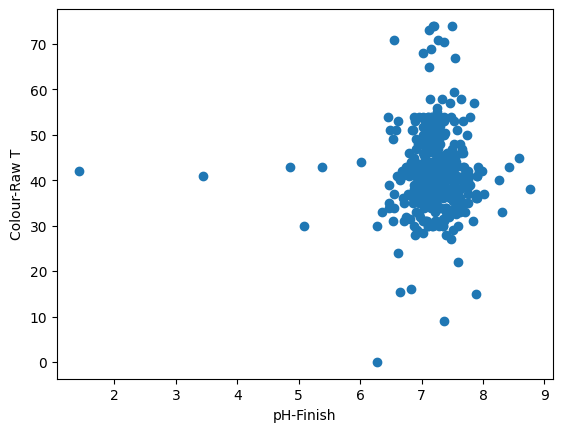

In [485]:
import matplotlib.pyplot as plt

plt.scatter(new_2010[('pH', 'Finish')], new_2010[('Colour','Raw T')])
plt.xlabel('pH-Finish')
plt.ylabel('Colour-Raw T')
plt.show()

# pH(Finish) & Colour(Raw T) 2011

In [480]:
correlation_coefficient = new_2011[('pH', 'Finish')].corr(new_2011[('Colour','Raw T')])

In [481]:
print(correlation_coefficient)

-0.030505916466334167


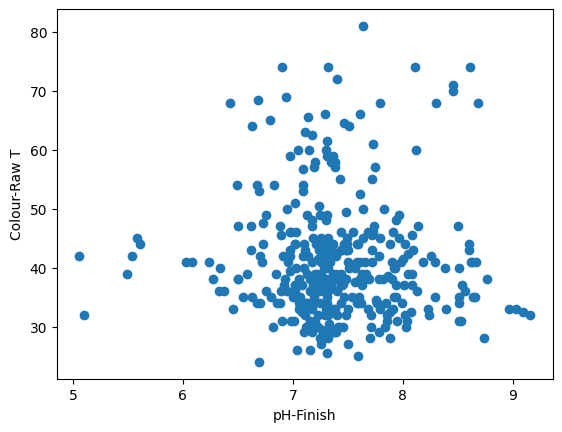

In [482]:
import matplotlib.pyplot as plt

plt.scatter(new_2011[('pH', 'Finish')], new_2011[('Colour','Raw T')])
plt.xlabel('pH-Finish')
plt.ylabel('Colour-Raw T')
plt.show()

# pH(Finish) & Colour(Raw T) 2012

In [477]:
correlation_coefficient = new_2012[('pH', 'Finish')].corr(new_2012[('Colour','Raw T')])

In [478]:
print(correlation_coefficient)

-0.11667736805351975


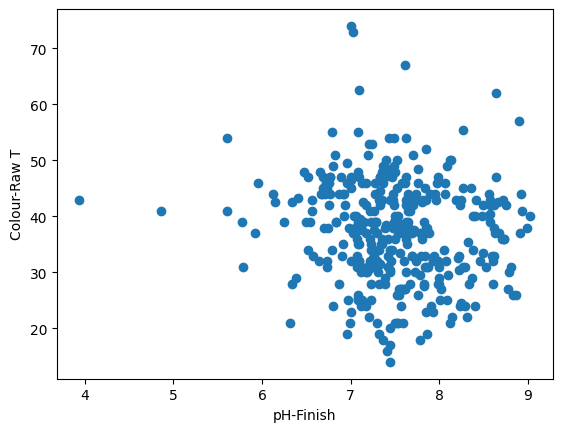

In [479]:
import matplotlib.pyplot as plt

plt.scatter(new_2012[('pH', 'Finish')], new_2012[('Colour','Raw T')])
plt.xlabel('pH-Finish')
plt.ylabel('Colour-Raw T')
plt.show()

# pH(Finish) & Colour(Raw T) 2013

In [474]:
correlation_coefficient = new_2013[('pH', 'Finish')].corr(new_2013[('Colour','Raw T')])

In [475]:
print(correlation_coefficient)

-0.2261758088763854


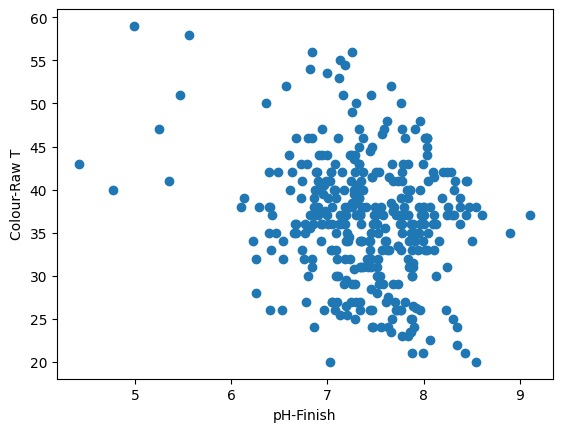

In [476]:
import matplotlib.pyplot as plt

plt.scatter(new_2013[('pH', 'Finish')], new_2013[('Colour','Raw T')])
plt.xlabel('pH-Finish')
plt.ylabel('Colour-Raw T')
plt.show()

# pH(Finish) & Colour(Raw T) 2014

In [471]:
correlation_coefficient = new_2014[('pH', 'Raw')].corr(new_2014[('Colour','Raw T')])

In [472]:
print(correlation_coefficient)

-0.42042522045028474


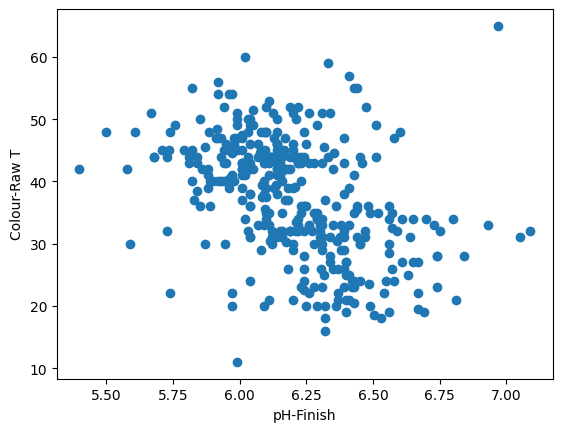

In [473]:
import matplotlib.pyplot as plt

plt.scatter(new_2014[('pH', 'Raw')], new_2014[('Colour','Raw T')])
plt.xlabel('pH-Finish')
plt.ylabel('Colour-Raw T')
plt.show()

# **Concat all dataframs**

In [835]:
concatenated_df = pd.concat([new_2009, new_2010, new_2011, new_2012, new_2013, new_2014, new_2015, new_2019, new_2020, new_2021, new_2023])

In [836]:
concatenated_df = concatenated_df.reset_index(drop=True)

In [837]:
concatenated_df.iloc[1980:2000]

,pH,Chlorine,Turbidity,Conductivity,Alkalinity,Temperature,Colour,Total Dissolved Solids,Hardness,pH
,Finish,Free,Finish,Finish,Finish,Finish,Raw T,Finish,Finish,Raw
1980,NaN,1.867271,0.1100,56.800,5.60,9.000,24.0,28.40,23.700,6.040
1981,NaN,1.780000,0.1820,55.400,5.90,11.500,20.0,27.70,23.600,5.970
1982,NaN,2.000000,0.1540,33.600,6.00,11.800,31.0,16.80,24.400,6.040
1983,NaN,2.000000,0.1540,38.750,3.85,12.500,31.0,19.40,24.050,6.040
1984,NaN,1.850000,0.0440,43.900,1.70,13.200,30.0,22.00,23.700,6.280
1985,NaN,1.590000,0.5000,50.000,5.70,13.300,34.0,25.00,23.600,6.610
1986,NaN,1.645000,0.2845,46.950,3.70,13.250,35.0,23.50,23.650,6.430
1987,NaN,1.700000,0.0690,48.475,4.70,13.275,36.0,24.25,23.625,6.250
1988,NaN,1.840000,0.0910,51.800,6.00,11.400,33.0,25.90,24.900,6.350


In [838]:
concatenated_df[('pH','Raw')].fillna(concatenated_df[('pH','Finish')], inplace=True)

In [839]:
concatenated_df[('pH','Finish')].fillna(concatenated_df[('pH','Raw')], inplace=True)

In [840]:
concatenated_df

,pH,Chlorine,Turbidity,Conductivity,Alkalinity,Temperature,Colour,Total Dissolved Solids,Hardness,pH
,Finish,Free,Finish,Finish,Finish,Finish,Raw T,Finish,Finish,Raw
0,7.35,1.820,0.134,48.6,10.0,3.40,40.0,24.3,20.900000,7.35
1,7.22,1.790,0.138,56.4,10.0,3.70,176.0,28.2,20.200000,7.22
2,7.34,1.820,0.120,53.6,10.0,3.70,54.0,26.8,23.200000,7.34
3,7.29,1.785,0.141,54.2,10.0,3.65,74.0,27.1,23.850000,7.29
4,7.24,1.750,0.162,54.8,10.0,3.60,94.0,27.4,24.500000,7.24
...,...,...,...,...,...,...,...,...,...,...
3689,6.95,1.730,0.497,37.7,5.9,5.10,44.0,26.2,3.250000,6.95
3690,0.00,0.000,0.000,0.0,0.0,0.00,0.0,0.0,3.210588,0.00
3691,7.02,1.820,0.592,35.3,6.1,5.40,53.0,26.4,3.290000,7.02


In [841]:
correlation_coefficient = concatenated_df[('Total Dissolved Solids', 'Finish')].corr(concatenated_df[('Conductivity','Finish')])

In [842]:
print(correlation_coefficient)

0.9849224183876888


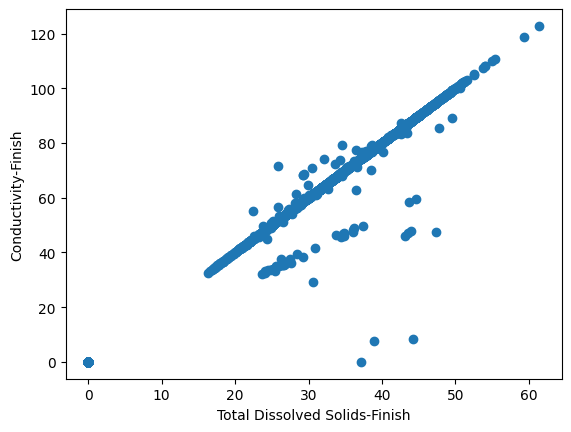

In [843]:
import matplotlib.pyplot as plt

plt.scatter(concatenated_df[('Total Dissolved Solids', 'Finish')], concatenated_df[('Conductivity','Finish')])
plt.xlabel('Total Dissolved Solids-Finish')
plt.ylabel('Conductivity-Finish')
plt.show()

In [881]:
correlation_coefficient = concatenated_df[('Alkalinity', 'Finish')].corr(concatenated_df[('Hardness','Finish')])

In [882]:
print(correlation_coefficient)

0.5204654684563126


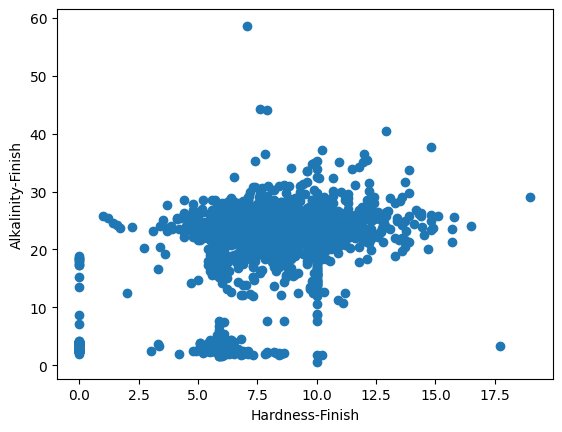

In [883]:
import matplotlib.pyplot as plt

plt.scatter(concatenated_df[('Alkalinity', 'Finish')], concatenated_df[('Hardness','Finish')])
plt.xlabel('Hardness-Finish')
plt.ylabel('Alkalinity-Finish')
plt.show()

In [670]:
concatenated_df.to_csv('Preprocessed_Data.csv', index=False)

# **Decision Tree**

**Conductivity & Total Dissolved Solids**

In [844]:
concatenated_df

,pH,Chlorine,Turbidity,Conductivity,Alkalinity,Temperature,Colour,Total Dissolved Solids,Hardness,pH
,Finish,Free,Finish,Finish,Finish,Finish,Raw T,Finish,Finish,Raw
0,7.35,1.820,0.134,48.6,10.0,3.40,40.0,24.3,20.900000,7.35
1,7.22,1.790,0.138,56.4,10.0,3.70,176.0,28.2,20.200000,7.22
2,7.34,1.820,0.120,53.6,10.0,3.70,54.0,26.8,23.200000,7.34
3,7.29,1.785,0.141,54.2,10.0,3.65,74.0,27.1,23.850000,7.29
4,7.24,1.750,0.162,54.8,10.0,3.60,94.0,27.4,24.500000,7.24
...,...,...,...,...,...,...,...,...,...,...
3689,6.95,1.730,0.497,37.7,5.9,5.10,44.0,26.2,3.250000,6.95
3690,0.00,0.000,0.000,0.0,0.0,0.00,0.0,0.0,3.210588,0.00
3691,7.02,1.820,0.592,35.3,6.1,5.40,53.0,26.4,3.290000,7.02


In [852]:
concatenated_df.isnull().sum()

pH                      Finish    0
Chlorine                Free      0
Turbidity               Finish    0
Conductivity            Finish    0
Alkalinity              Finish    0
Temperature             Finish    0
Colour                  Raw T     0
Total Dissolved Solids  Finish    0
Hardness                Finish    0
pH                      Raw       0
dtype: int64

In [679]:
X = concatenated_df.loc[:,[('Total Dissolved Solids','Finish')]]  # features
y = concatenated_df[('Conductivity','Finish')]    # target variable

In [680]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [681]:
tree = DecisionTreeRegressor(max_depth=5, random_state=3)

In [682]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=3)

In [683]:
y_pred = tree.predict(X_test)

In [684]:
mse = mean_squared_error(y_test, y_pred)

In [685]:
print('Mean squared error:', mse)

Mean squared error: 4.654999300624025


In [686]:
Score_train = tree.score(X_train, y_train)
Score_test =tree.score(X_test, y_test)
print("Score of train: ",Score_train)
print("Score of test: ",Score_test)

Score of train:  0.9624470899513577
Score of test:  0.9866746648319495


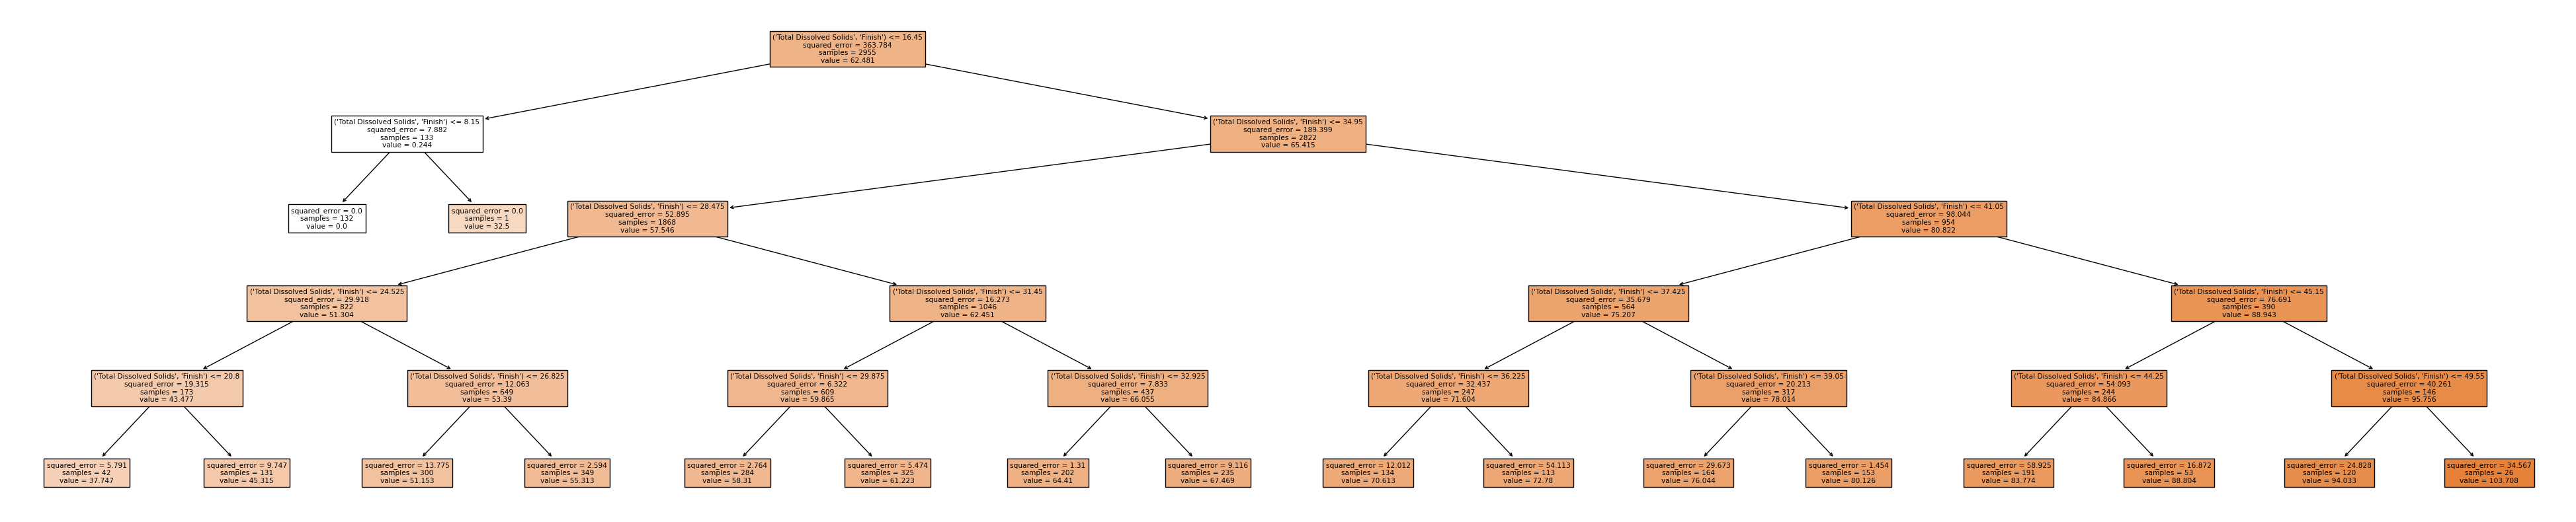

In [864]:
# In this code, we first import the plot_tree function from the sklearn.tree module and the matplotlib.pyplot module for plotting.
# We then create and fit the DecisionTreeRegressor model with the specified parameters.
# Next, we plot the decision tree using the plot_tree function. We pass the trained tree object, 
# the feature names of the X dataframe (obtained by calling X.columns), and set filled=True to fill the tree nodes with colors based on the majority class. 
# We also set the figure size to (50, 10) to make the plot large enough to read. Finally, we call plt.show() to display the plot.
from sklearn.tree import plot_tree
# plot the decision tree
plt.figure(figsize=(50,10))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

**Hardness & Alkalinity**

In [884]:
X1 = concatenated_df.loc[:,[('Hardness','Finish')]]  # features
y1 = concatenated_df[('Alkalinity','Finish')]    # target variable

In [885]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=3)

In [886]:
tree1 = DecisionTreeRegressor(max_depth=5, random_state=3)

In [889]:
tree1.fit(X1_train, y1_train)

DecisionTreeRegressor(max_depth=5, random_state=3)

In [890]:
y1_pred = tree1.predict(X1_test)

In [891]:
mse1 = mean_squared_error(y1_test, y1_pred)

In [892]:
print('Mean squared error:', mse1)

Mean squared error: 3.490019575677469


In [894]:
Score_train1 = tree1.score(X1_train, y1_train)
Score_test1 =tree1.score(X1_test, y1_test)
print("Score of train: ",Score_train1)
print("Score of test: ",Score_test1)

Score of train:  0.44542510780837075
Score of test:  0.37609777192983407
